**Importing the Necessary Python Libraries.**

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import stats
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('classic')
import seaborn as sns
sns.set(color_codes=True)
sns.set_palette("deep")
import plotly.graph_objects as ply
import plotly.figure_factory as ff
import plotly.express as px
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")


**Business Problem Statement -**

To ensure there is no discrimination between employees, it is imperative for the Human Resources department of Delta Ltd. to maintain a salary range for each employee with similar profiles. Apart from the existing salary, there is a considerable number of factors regarding an employees experience and other abilities to which they get evaluated in interviews. Given the data related to individuals who applied in Delta Ltd, models can be built that can automatically determine salary which should be offered if the prospective candidate is selected in the company. This model seeks to minimize human judgment with regard to salary to be offered.

**Goal & Objective -**

The objective of this exercise is to build a model, using historical data that will
determine an employee's salary to be offered, such that manual judgments on selection are minimized. It is intended to have a robust approach and eliminate any discrimination in salary among similar employee profiles.

**Exploratory Data Analysis (EDA) - Data Description , Data Preprocessing Feature Engineering & Data Visualization.**

**Loading the Dataset CSV file of Problem Statement.**

In [2]:
df_1=pd.read_csv("expected_ctc.csv")
pd.options.display.max_columns = None

**Checking the Records of the Dataset.**

In [3]:
df_1.head(10) # Head of the Dataset - First 10 Records of the Dataset.

IDX  Applicant_ID  Total_Experience  Total_Experience_in_field_applied  \
0    1         22753                 0                                  0   
1    2         51087                23                                 14   
2    3         38413                21                                 12   
3    4         11501                15                                  8   
4    5         58941                10                                  5   
5    6         30564                16                                  3   
6    7         27267                 1                                  1   
7    8         36521                19                                 11   
8    9         11616                 8                                  7   
9   10         43886                15                                 15   

       Department                Role   Industry Organization  \
0             NaN                 NaN        NaN          NaN   
1              HR          Consultant  Analytics            H   
2  Top Management          Consultant   Training            J   
3         Banking   Financial Analyst   Aviation            F   
4           Sales     Project Manager  Insurance            E   
5  Top Management  Area Sales Manager     Retail            G   
6     Engineering           Team Lead       FMCG            L   
7          Others             Analyst     Others            E   
8    Analytics/BI              Others    Telecom            L   
9    Analytics/BI                 CEO    Telecom            M   

         Designation  Education Graduation_Specialization University_Grad  \
0                NaN         PG                      Arts         Lucknow   
1                 HR  Doctorate                 Chemistry           Surat   
2                NaN  Doctorate                   Zoology          Jaipur   
3                 HR  Doctorate                    Others       Bangalore   
4    Medical Officer       Grad                   Zoology          Mumbai   
5           Director  Doctorate                    Others       Bangalore   
6  Marketing Manager       Grad                 Chemistry           Delhi   
7            Manager         PG                 Sociology           Delhi   
8  Marketing Manager  Doctorate                Psychology          Mumbai   
9    Product Manager  Doctorate                 Chemistry           Delhi   

   Passing_Year_Of_Graduation PG_Specialization University_PG  \
0                      2020.0               NaN           NaN   
1                      1988.0            Others         Surat   
2                      1990.0           Zoology        Jaipur   
3                      1997.0           Zoology     Bangalore   
4                      2004.0           Zoology        Mumbai   
5                      1998.0           Zoology     Bangalore   
6                      2011.0         Chemistry         Delhi   
7                      2001.0               NaN           NaN   
8                      2003.0        Psychology        Mumbai   
9                      1998.0         Chemistry         Delhi   

   Passing_Year_Of_PG PHD_Specialization University_PHD  Passing_Year_Of_PHD  \
0                 NaN                NaN            NaN                  NaN   
1              1990.0          Chemistry      Mangalore               1997.0   
2              1992.0            Zoology        Lucknow               1999.0   
3              1999.0          Chemistry       Guwahati               2005.0   
4              2006.0            Zoology      Bangalore               2010.0   
5              2000.0             Others    Bhubaneswar               2004.0   
6              2013.0          Chemistry      Mangalore               2019.0   
7                 NaN                NaN            NaN                  NaN   
8              2005.0         Psychology           Pune               2012.0   
9              2000.0          Chemistry         Jaipur               2005.

In [4]:
df_1.tail(10) # Tail of the Dataset - Last 10 Rows of the Dataset.

IDX  Applicant_ID  Total_Experience  \
24990  24991         34589                22   
24991  24992         13280                 1   
24992  24993         35325                25   
24993  24994         31883                15   
24994  24995         32035                 7   
24995  24996         25550                18   
24996  24997         53442                12   
24997  24998         15777                22   
24998  24999         57616                25   
24999  25000         20788                 8   

       Total_Experience_in_field_applied      Department  \
24990                                  1  Top Management   
24991                                  1           Sales   
24992                                 12           Sales   
24993                                 13      Healthcare   
24994                                  3  Top Management   
24995                                 13     Engineering   
24996                                  8              HR   
24997                                  8         Banking   
24998                                  8       Marketing   
24999                                  0         Banking   

                       Role    Industry Organization         Designation  \
24990  Sr. Business Analyst   Analytics            D             Manager   
24991            Consultant          IT            A   Marketing Manager   
24992         Sales Manager  Automobile            D        Data Analyst   
24993            Consultant    Aviation            P             Manager   
24994                Others     Telecom            A        Data Analyst   
24995       Project Manager  Automobile            I   Assistant Manager   
24996                Others   Analytics            B          Sr.Manager   
24997                  Head   Insurance            D  Software Developer   
24998                   CEO        BFSI            D   Marketing Manager   
24999            Consultant  Automobile            P          Sr.Manager   

        Education Graduation_Specialization University_Grad  \
24990  Under Grad                       NaN             NaN   
24991  Under Grad                       NaN             NaN   
24992          PG                Statistics       Bangalore   
24993          PG                Statistics       Mangalore   
24994  Under Grad                       NaN             NaN   
24995          PG                Psychology           Surat   
24996  Under Grad                       NaN             NaN   
24997  Under Grad                       NaN             NaN   
24998          PG                 Economics           Surat   
24999        Grad                 Economics       Bangalore   

       Passing_Year_Of_Graduation PG_Specialization University_PG  \
24990                         NaN               NaN           NaN   
24991                         NaN               NaN           NaN   
24992                      1995.0        Statistics     Bangalore   
24993                      1999.0        Statistics     Mangalore   
24994                         NaN               NaN           NaN   
24995                      1995.0        Psychology         Surat   
24996                         NaN               NaN           NaN   
24997                         NaN               NaN           NaN   
24998                      1995.0         Economics         Surat   
24999                      2004.0         Economics     Bangalore   

       Passing_Year_Of_PG PHD_Specialization University_PHD  \
24990                 NaN                NaN            NaN   
24991                 NaN                NaN            NaN   
24992              2015.0                NaN            NaN   
24993              2001.0         Statistics        Kolkata   
24994                 NaN                NaN            NaN   
24995              1997.0         Psychology         Jaipur   
24996                 NaN                NaN            NaN   
24997                 Na

**Dropping the IDX & Applicant_ID Columns.**

In [5]:
df_1.drop("IDX",axis= 1,inplace=True)
df_1.drop("Applicant_ID",axis=1,inplace=True)

**Conclusion -**

We are going to drop the column IDX and Applicant_Id as these columns didn't contribute for analysis and model building excercise , because IDX and Applicant_ID for each employee is unique hence it is useless for the model.That's why we decided to drop these two columns.

**Checking the Head of the Dataset after dropping the IDX & Applicant_ID columns.**

In [6]:
df_1.head(10)

Total_Experience  Total_Experience_in_field_applied      Department  \
0                 0                                  0             NaN   
1                23                                 14              HR   
2                21                                 12  Top Management   
3                15                                  8         Banking   
4                10                                  5           Sales   
5                16                                  3  Top Management   
6                 1                                  1     Engineering   
7                19                                 11          Others   
8                 8                                  7    Analytics/BI   
9                15                                 15    Analytics/BI   

                 Role   Industry Organization        Designation  Education  \
0                 NaN        NaN          NaN                NaN         PG   
1          Consultant  Analytics            H                 HR  Doctorate   
2          Consultant   Training            J                NaN  Doctorate   
3   Financial Analyst   Aviation            F                 HR  Doctorate   
4     Project Manager  Insurance            E    Medical Officer       Grad   
5  Area Sales Manager     Retail            G           Director  Doctorate   
6           Team Lead       FMCG            L  Marketing Manager       Grad   
7             Analyst     Others            E            Manager         PG   
8              Others    Telecom            L  Marketing Manager  Doctorate   
9                 CEO    Telecom            M    Product Manager  Doctorate   

  Graduation_Specialization University_Grad  Passing_Year_Of_Graduation  \
0                      Arts         Lucknow                      2020.0   
1                 Chemistry           Surat                      1988.0   
2                   Zoology          Jaipur                      1990.0   
3                    Others       Bangalore                      1997.0   
4                   Zoology          Mumbai                      2004.0   
5                    Others       Bangalore                      1998.0   
6                 Chemistry           Delhi                      2011.0   
7                 Sociology           Delhi                      2001.0   
8                Psychology          Mumbai                      2003.0   
9                 Chemistry           Delhi                      1998.0   

  PG_Specialization University_PG  Passing_Year_Of_PG PHD_Specialization  \
0               NaN           NaN                 NaN                NaN   
1            Others         Surat              1990.0          Chemistry   
2           Zoology        Jaipur              1992.0            Zoology   
3           Zoology     Bangalore              1999.0          Chemistry   
4           Zoology        Mumbai              2006.0            Zoology   
5           Zoology     Bangalore              2000.0             Others   
6         Chemistry         Delhi              2013.0          Chemistry   
7               NaN           NaN                 NaN                NaN   
8        Psychology        Mumbai              2005.0         Psychology   
9         Chemistry         Delhi              2000.0          Chemistry   

  University_PHD  Passing_Year_Of_PHD Curent_Location Preferred_location  \
0            NaN                  NaN        Guwahati               Pune   
1      Mangalore               1997.0       Bangalore             Nagpur   
2        Lucknow               1999.0       Ahmedabad             Jaipur   
3       Guwahati               2005.0          Kanpur            Kolkata   
4      Bangalore               2010.0       Ahmedabad          Ahmedabad   
5    Bhubaneswar               2004.0            Pune        Bhubaneswar   
6      Mangalore               2019.0           Delhi               Pune   
7            NaN                  NaN          

**Renaming of Some Columns -**

In [7]:
df_1.rename(columns ={"Education":"Highest_Education"}, inplace = True)
df_1.rename(columns ={"Curent_Location":"Current_location"}, inplace = True)

In [8]:
df_1.head(10)

Total_Experience  Total_Experience_in_field_applied      Department  \
0                 0                                  0             NaN   
1                23                                 14              HR   
2                21                                 12  Top Management   
3                15                                  8         Banking   
4                10                                  5           Sales   
5                16                                  3  Top Management   
6                 1                                  1     Engineering   
7                19                                 11          Others   
8                 8                                  7    Analytics/BI   
9                15                                 15    Analytics/BI   

                 Role   Industry Organization        Designation  \
0                 NaN        NaN          NaN                NaN   
1          Consultant  Analytics            H                 HR   
2          Consultant   Training            J                NaN   
3   Financial Analyst   Aviation            F                 HR   
4     Project Manager  Insurance            E    Medical Officer   
5  Area Sales Manager     Retail            G           Director   
6           Team Lead       FMCG            L  Marketing Manager   
7             Analyst     Others            E            Manager   
8              Others    Telecom            L  Marketing Manager   
9                 CEO    Telecom            M    Product Manager   

  Highest_Education Graduation_Specialization University_Grad  \
0                PG                      Arts         Lucknow   
1         Doctorate                 Chemistry           Surat   
2         Doctorate                   Zoology          Jaipur   
3         Doctorate                    Others       Bangalore   
4              Grad                   Zoology          Mumbai   
5         Doctorate                    Others       Bangalore   
6              Grad                 Chemistry           Delhi   
7                PG                 Sociology           Delhi   
8         Doctorate                Psychology          Mumbai   
9         Doctorate                 Chemistry           Delhi   

   Passing_Year_Of_Graduation PG_Specialization University_PG  \
0                      2020.0               NaN           NaN   
1                      1988.0            Others         Surat   
2                      1990.0           Zoology        Jaipur   
3                      1997.0           Zoology     Bangalore   
4                      2004.0           Zoology        Mumbai   
5                      1998.0           Zoology     Bangalore   
6                      2011.0         Chemistry         Delhi   
7                      2001.0               NaN           NaN   
8                      2003.0        Psychology        Mumbai   
9                      1998.0         Chemistry         Delhi   

   Passing_Year_Of_PG PHD_Specialization University_PHD  Passing_Year_Of_PHD  \
0                 NaN                NaN            NaN                  NaN   
1              1990.0          Chemistry      Mangalore               1997.0   
2              1992.0            Zoology        Lucknow               1999.0   
3              1999.0          Chemistry       Guwahati               2005.0   
4              2006.0            Zoology      Bangalore               2010.0   
5              2000.0             Others    Bhubaneswar               2004.0   
6              2013.0          Chemistry      Mangalore               2019.0   
7                 NaN                NaN            NaN                  NaN   
8              2005.0         Psychology           Pune               2012.0   
9              2000.0          Chemistry         Jaipur               2005.0   

  Current_location Preferred_location  Current_CTC Inhand_Offer  \
0         Guwahati               Pune            0         

**Conclusion -**

* I changed name of Education column to Highest Education because it looks for appropirate in terms of readibility clearly give idea about the educational background of the applicant.

* Second i rename the Curent Location column to Current location because there is spelling error.

**Data Dictionary for Business Problem Statement.**

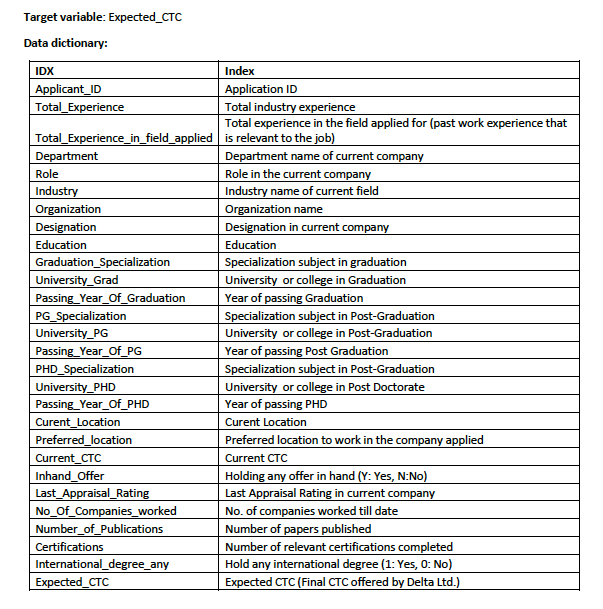

In [9]:
from IPython.display import Image
Image(filename="Data_Dictionary_Business_Problem.png")

**Checking the Summary of the Dataset.**

In [10]:
df_1.describe(include="all").T

count unique          top   freq  \
Total_Experience                   25000.0    NaN          NaN    NaN   
Total_Experience_in_field_applied  25000.0    NaN          NaN    NaN   
Department                           22222     12    Marketing   2379   
Role                                 24037     24       Others   2248   
Industry                             24092     11     Training   2237   
Organization                         24092     16            M   1574   
Designation                          21871     18           HR   1648   
Highest_Education                    25000      4           PG   6326   
Graduation_Specialization            18820     11    Chemistry   1785   
University_Grad                      18820     13  Bhubaneswar   1510   
Passing_Year_Of_Graduation         18820.0    NaN          NaN    NaN   
PG_Specialization                    17308     11  Mathematics   1800   
University_PG                        17308     13  Bhubaneswar   1377   
Passing_Year_Of_PG                 17308.0    NaN          NaN    NaN   
PHD_Specialization                   13119     11       Others   1545   
University_PHD                       13119     13      Kolkata   1069   
Passing_Year_Of_PHD                13119.0    NaN          NaN    NaN   
Current_location                     25000     15    Bangalore   1742   
Preferred_location                   25000     15       Kanpur   1720   
Current_CTC                        25000.0    NaN          NaN    NaN   
Inhand_Offer                         25000      2            N  17418   
Last_Appraisal_Rating                24092      5            B   5501   
No_Of_Companies_worked             25000.0    NaN          NaN    NaN   
Number_of_Publications             25000.0    NaN          NaN    NaN   
Certifications                     25000.0    NaN          NaN    NaN   
International_degree_any           25000.0    NaN          NaN    NaN   
Expected_CTC                       25000.0    NaN          NaN    NaN   

                                            mean             std       min  \
Total_Experience                        12.49308        7.471398       0.0   
Total_Experience_in_field_applied         6.2582        5.819513       0.0   
Department                                   NaN             NaN       NaN   
Role                                         NaN             NaN       NaN   
Industry                                     NaN             NaN       NaN   
Organization                                 NaN             NaN       NaN   
Designation                                  NaN             NaN       NaN   
Highest_Education                            NaN             NaN       NaN   
Graduation_Specialization                    NaN             NaN       NaN   
University_Grad                              NaN             NaN       NaN   
Passing_Year_Of_Graduation           2002.193624         8.31664    1986.0   
PG_Specialization                            NaN             NaN       NaN   
University_PG                                NaN             NaN       NaN   
Passing_Year_Of_PG                   2005.153571        9.022963    1988.0   
PHD_Specialization                           NaN             NaN       NaN   
University_PHD                               NaN             NaN       NaN   
Passing_Year_Of_PHD                  2007.396372        7.493601    1995.0   
Current_location                             NaN             NaN       NaN   
Preferred_location                           NaN             NaN       NaN   
Current_CTC                        1760945.38388   920212.512479       0.0   
Inhand_Offer                                 NaN             NaN       NaN   
Last_Appraisal_Rating                        NaN             NaN       NaN   
No_Of_Companies_worked                   3.48204        1.690335       0.0   
Number_of_Publications                   4.08904        2.606612       0.0   
Certifications                           0

**Observations**

From the above table we can infer the count,mean, std , 25% , 50% ,75% and min & max values of the all numeric variables present in the dataset.

From the above table we get the count,unique,top,freq of all the categorical variables present in the dataset.

**Checking the Shape of the Dataframe.**

In [11]:
df_1.shape

(25000, 27)

In [12]:
shape = [['No. of Rows', 'No. of Columns'],
        [25000 , 27]]
table = ff.create_table(shape)
table
               

**Insights -**

Shape attribute tells us number of observations and variables we have in the data set. It is used to check the dimension of data. The expected_ctc.csv data set has 25000 observations (rows) and 27 variables (columns) in the dataset.

**Checking the Appropriateness of Datatypes & Information of the Dataframe.**

In [13]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Experience                   25000 non-null  int64  
 1   Total_Experience_in_field_applied  25000 non-null  int64  
 2   Department                         22222 non-null  object 
 3   Role                               24037 non-null  object 
 4   Industry                           24092 non-null  object 
 5   Organization                       24092 non-null  object 
 6   Designation                        21871 non-null  object 
 7   Highest_Education                  25000 non-null  object 
 8   Graduation_Specialization          18820 non-null  object 
 9   University_Grad                    18820 non-null  object 
 10  Passing_Year_Of_Graduation         18820 non-null  float64
 11  PG_Specialization                  17308 non-null  obj

**Insights -**

From the above results we can see that there are null values present in most of the columns like(**Department,Role,Industry,Organization,Designation,Graduation_Specialization ,University_Grad Passing_Year_Of_Graduation , PG_Specialization ,University_PG , Passing_Year_Of_PG and PHD_Specialization , University_PHD and Passing_Year_Of_PHD etc**) of the dataset.Their are total 25000 rows & 27 columns given in this dataset,indexed from 0 to 24999. Out of 27 variables 3 are float64 , 16 variables are object and 8 variable are int64 d-type. Memory used by the dataset: 5.1+ MB.

**Checking Skewness of the Dataset -**

In [14]:
df_1.skew()

Total_Experience                     0.004109
Total_Experience_in_field_applied    0.961951
Passing_Year_Of_Graduation           0.061408
Passing_Year_Of_PG                  -0.066166
Passing_Year_Of_PHD                  0.014436
Current_CTC                          0.097643
No_Of_Companies_worked              -0.068026
Number_of_Publications              -0.075217
Certifications                       1.610907
International_degree_any             3.054017
Expected_CTC                         0.331972
dtype: float64

**Insights -**

From the above result, we can check which variable is normally distributed and which is not.

* The variables with skewness > 1 are highly positively skewed.
* The variables with skewness < -1 are highly negatively skewed.
* The variables with 0.5 < skewness < 1 are moderately positively skewed.
* The variables with -0.5 < skewness < -1 such as stroke are moderately negatively skewed.
* And, the variables with -0.5 < skewness < 0.5 are symmetric i.e normally distributed

**Checking for Null Values.**

In [15]:
df_1.isnull().sum()

Total_Experience                         0
Total_Experience_in_field_applied        0
Department                            2778
Role                                   963
Industry                               908
Organization                           908
Designation                           3129
Highest_Education                        0
Graduation_Specialization             6180
University_Grad                       6180
Passing_Year_Of_Graduation            6180
PG_Specialization                     7692
University_PG                         7692
Passing_Year_Of_PG                    7692
PHD_Specialization                   11881
University_PHD                       11881
Passing_Year_Of_PHD                  11881
Current_location                         0
Preferred_location                       0
Current_CTC                              0
Inhand_Offer                             0
Last_Appraisal_Rating                  908
No_Of_Companies_worked                   0
Number_of_P

In [16]:
null_check_table = [['S.No.','Features / Columns','Null Count'],
              [1,'Total_Experience' ,0],
              [2,'Total_Experience_in_field_applied' ,0],
              [3,'Department',2778],
              [4,'Role',963],     
              [5,'Industry' ,908],
              [6,'Organization' ,908],
              [7,'Designation' ,3129],
              [8,'Highest_Education' ,0],
              [9,'Graduation_Specialization' ,6180],
              [10,'University_Grad' ,6180],
              [11,'Passing_Year_Of_Graduation' ,6180],
              [12,'PG_Specialization' ,7692],
              [13,'University_PG' ,7692],
              [14,'Passing_Year_Of_PG' ,7692],
              [15,'PHD_Specialization ' ,11881],
              [16,'University_PHD' ,11881],
              [17,'Passing_Year_Of_PHD' ,11881],
              [18,'Current_location' ,0],
              [19,'Preferred_location' ,0],
              [20,'Current_CTC' ,0],
              [21,'Inhand_Offer' ,0],
              [22,'Last_Appraisal_Rating' ,908],
              [23,'No_Of_Companies_worked' ,0],
              [24,'Number_of_Publications' ,0],
              [25,'Certifications' ,0],
              [26,'International_degree_any' ,0],
              [27,'Expected_CTC',0]]
fig = ff.create_table(null_check_table)
fig.show()

**Insights -**

From the above output we found that most of the columns have null values.Graduation_Specialization , University_Grad , Passing_Year_Of_Graduation , PG_Specialization ,University_PG , Passing_Year_Of_PG and PHD_Specialization , University_PHD and  Passing_Year_Of_PHD have some kind of pattern for null values may be these applicants didn't have  UG , PG or PhD degree or will impute these missing values with suitable imputation method down the line.

**Checking for Anomalies in the Dataset.**

In [17]:
df_1["Total_Experience"].unique()

array([ 0, 23, 21, 15, 10, 16,  1, 19,  8, 13,  7, 12, 20,  4, 14, 17, 22,
        3,  5, 24,  2, 25,  9,  6, 11, 18])

In [18]:
df_1["Total_Experience_in_field_applied"].unique()

array([ 0, 14, 12,  8,  5,  3,  1, 11,  7, 15, 10,  9,  4,  6,  2, 20, 16,
       25, 13, 19, 21, 22, 23, 17, 18, 24])

In [19]:
df_1["Department"].unique()

array([nan, 'HR', 'Top Management', 'Banking', 'Sales', 'Engineering',
       'Others', 'Analytics/BI', 'Education', 'Marketing', 'Healthcare',
       'IT-Software', 'Accounts'], dtype=object)

In [20]:
df_1["Role"].unique()

array([nan, 'Consultant', 'Financial Analyst', 'Project Manager',
       'Area Sales Manager', 'Team Lead', 'Analyst', 'Others', 'CEO',
       'Business Analyst', 'Sales Manager', 'Bio statistician',
       'Scientist', 'Research Scientist', 'Head', 'Associate',
       'Senior Researcher', 'Sales Execituve', 'Sr. Business Analyst',
       'Principal Analyst', 'Data scientist', 'Researcher',
       'Senior Analyst', 'Professor', 'Lab Executuve'], dtype=object)

In [21]:
df_1["Industry"].unique()

array([nan, 'Analytics', 'Training', 'Aviation', 'Insurance', 'Retail',
       'FMCG', 'Others', 'Telecom', 'Automobile', 'IT', 'BFSI'],
      dtype=object)

In [22]:
df_1["Organization"].unique()

array([nan, 'H', 'J', 'F', 'E', 'G', 'L', 'M', 'O', 'D', 'N', 'A', 'B',
       'I', 'K', 'P', 'C'], dtype=object)

In [23]:
df_1["Designation"].unique()

array([nan, 'HR', 'Medical Officer', 'Director', 'Marketing Manager',
       'Manager', 'Product Manager', 'Consultant', 'CA',
       'Research Scientist', 'Sr.Manager', 'Data Analyst',
       'Assistant Manager', 'Others', 'Web Designer', 'Research Analyst',
       'Software Developer', 'Network Engineer', 'Scientist'],
      dtype=object)

In [24]:
df_1["Highest_Education"].unique()

array(['PG', 'Doctorate', 'Grad', 'Under Grad'], dtype=object)

In [25]:
df_1["Graduation_Specialization"].unique()

array(['Arts', 'Chemistry', 'Zoology', 'Others', 'Sociology',
       'Psychology', 'Mathematics', nan, 'Engineering', 'Botony',
       'Statistics', 'Economics'], dtype=object)

In [26]:
df_1["University_Grad"].unique()

array(['Lucknow', 'Surat', 'Jaipur', 'Bangalore', 'Mumbai', 'Delhi',
       'Mangalore', nan, 'Nagpur', 'Kolkata', 'Ahmedabad', 'Guwahati',
       'Pune', 'Bhubaneswar'], dtype=object)

In [27]:
df_1["Passing_Year_Of_Graduation"].unique()

array([2020., 1988., 1990., 1997., 2004., 1998., 2011., 2001., 2003.,
       2000.,   nan, 2012., 2002., 2016., 2013., 1999., 1993., 2009.,
       1989., 1991., 2008., 2005., 2018., 1992., 1996., 2010., 2019.,
       1986., 2007., 2015., 1995., 2006., 2014., 1987., 2017., 1994.])

In [28]:
df_1["PG_Specialization"].unique()

array([nan, 'Others', 'Zoology', 'Chemistry', 'Psychology', 'Mathematics',
       'Engineering', 'Sociology', 'Arts', 'Statistics', 'Economics',
       'Botony'], dtype=object)

In [29]:
df_1["University_PG"].unique()

array([nan, 'Surat', 'Jaipur', 'Bangalore', 'Mumbai', 'Delhi',
       'Mangalore', 'Nagpur', 'Kolkata', 'Lucknow', 'Ahmedabad',
       'Guwahati', 'Pune', 'Bhubaneswar'], dtype=object)

In [30]:
df_1["Passing_Year_Of_PG"].unique()

array([  nan, 1990., 1992., 1999., 2006., 2000., 2013., 2005., 2002.,
       2014., 2004., 2009., 2017., 2001., 1995., 2011., 1991., 1993.,
       2003., 2007., 2010., 1994., 2020., 2016., 1998., 2012., 2022.,
       1988., 2019., 2018., 1997., 2008., 2015., 1989., 2021., 1996.,
       2023.])

In [31]:
df_1["Current_location"].unique()

array(['Guwahati', 'Bangalore', 'Ahmedabad', 'Kanpur', 'Pune', 'Delhi',
       'Surat', 'Nagpur', 'Jaipur', 'Kolkata', 'Bhubaneswar', 'Mangalore',
       'Mumbai', 'Lucknow', 'Chennai'], dtype=object)

In [32]:
df_1["Preferred_location"].unique()

array(['Pune', 'Nagpur', 'Jaipur', 'Kolkata', 'Ahmedabad', 'Bhubaneswar',
       'Bangalore', 'Guwahati', 'Mangalore', 'Kanpur', 'Mumbai',
       'Chennai', 'Surat', 'Delhi', 'Lucknow'], dtype=object)

In [33]:
df_1["Current_CTC"].unique()

array([      0, 2702664, 2236661, ..., 1681796, 3311090,  935897])

In [34]:
df_1["Inhand_Offer"].unique()

array(['N', 'Y'], dtype=object)

In [35]:
df_1["Last_Appraisal_Rating"].unique()

array([nan, 'Key_Performer', 'C', 'B', 'A', 'D'], dtype=object)

In [36]:
df_1["No_Of_Companies_worked"].unique()

array([0, 2, 5, 3, 6, 4, 1])

In [37]:
df_1["Number_of_Publications"].unique()

array([0, 4, 3, 1, 6, 8, 2, 7, 5])

In [38]:
df_1["Certifications"].unique()

array([0, 1, 5, 2, 4, 3])

In [39]:
df_1["International_degree_any"].unique()

array([0, 1])

In [40]:
df_1["Expected_CTC"].unique()

array([ 384551, 3783729, 3131325, ..., 1934065, 4370638, 1216666])

**Insights**

There is no Anomalies present in the dataset , but have nan values in most of columns.

**Checking Duplicate Values**

In [41]:
dups=df_1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


**Insights -**

There is no duplicates rows present in the dataset.

**Checking the Value counts on all the Categorical Column.**

In [42]:
df_1["Department"].value_counts()

Marketing         2379
Analytics/BI      2096
Healthcare        2062
Others            2041
Sales             1991
HR                1988
Banking           1952
Education         1948
Engineering       1937
Top Management    1632
Accounts          1118
IT-Software       1078
Name: Department, dtype: int64

**Insights -**

* Majority of applicants are of Marketing Department (2379)  ,Analytics/BI (2096) , Health-care (2062 ) and others (2041).
* Least applicants belongs to IT-Software Department(1078).
* There is fine distribution of applicants in each department.

In [43]:
df_1["Role"].value_counts()

Others                  2248
Bio statistician        1913
Analyst                 1892
Project Manager         1850
Team Lead               1833
Consultant              1780
Business Analyst        1711
Sales Execituve         1574
Sales Manager           1427
Senior Researcher       1236
Financial Analyst       1182
CEO                     1149
Scientist               1139
Head                    1108
Associate                767
Data scientist           363
Principal Analyst        275
Area Sales Manager       134
Senior Analyst           128
Researcher               123
Sr. Business Analyst     114
Professor                 33
Research Scientist        33
Lab Executuve             25
Name: Role, dtype: int64

**Insights -**

* Majority of applicants worked as others(Role) i.e (2248).
* Minority of the applicants worked as Lab executive (Role) i.e.(25).

In [44]:
df_1["Industry"].value_counts()

Training      2237
IT            2228
Insurance     2219
BFSI          2207
Automobile    2202
Analytics     2201
Retail        2195
Telecom       2190
Aviation      2183
FMCG          2180
Others        2050
Name: Industry, dtype: int64

**Insights -**

* Majority of applicants worked in Training Industry.
* There is not much variation in the Industry column have a fair distribution for all applicants.

In [45]:
df_1["Organization"].value_counts()

M    1574
J    1555
P    1542
H    1532
A    1526
F    1505
G    1504
K    1503
I    1489
E    1488
B    1488
L    1484
C    1482
N    1476
D    1474
O    1470
Name: Organization, dtype: int64

**Insights -**

There is not too much variations in the Organization columns equivalent number of applicants worked in 16 different organization. 

In [46]:
df_1["Designation"].value_counts()

HR                    1648
Others                1647
Manager               1628
Product Manager       1626
Sr.Manager            1617
Consultant            1606
Marketing Manager     1590
Assistant Manager     1590
Data Analyst          1575
Research Analyst      1563
Medical Officer       1047
Software Developer     914
Web Designer           882
Network Engineer       862
Director               772
CA                     715
Research Scientist     537
Scientist               52
Name: Designation, dtype: int64

**Insights -**

* Majority of applicants worked as HR i.e.(1648).
* Only 52 applicants worked as Scientist.

In [47]:
df_1["Highest_Education"].value_counts()

PG            6326
Doctorate     6285
Grad          6209
Under Grad    6180
Name: Highest_Education, dtype: int64

**Insights -**

* 6180 applicants are Under Graduate.
* 6209 applicants are Graduate.
* 6326 applicants are Post Graduate.
* 6285 applicants are Doctorate.

In [48]:
df_1["Graduation_Specialization"].value_counts()

Chemistry      1785
Economics      1774
Mathematics    1770
Zoology        1730
Arts           1721
Psychology     1705
Sociology      1697
Botony         1674
Engineering    1661
Others         1660
Statistics     1643
Name: Graduation_Specialization, dtype: int64

**Insights -**

* Majority of applicants did their graduation specialization in chemistry.
* 1774 applicants did their graduation specialization in economics.
* 1770 applicants did their graduation specialization in mathematics.
* 1730 applicants did their graduation specialization in zoology.
* 1721 applicants did their graduation specialization in arts.
* 1705 applicants did their graduation specialization in psychology.
* 1697 applicants did their graduation specialization in sociology.
* 1674 applicants did their graduation specialization in botony.
* 1661 applicants did their graduation specialization in engineering.
* 1660 applicants did their graduation specialization in others.
* 1643 applicants did their graduation specialization in statistics.

In [49]:
df_1["University_Grad"].value_counts()

Bhubaneswar    1510
Delhi          1492
Mangalore      1490
Mumbai         1488
Jaipur         1478
Lucknow        1457
Guwahati       1449
Pune           1428
Kolkata        1426
Surat          1424
Nagpur         1420
Bangalore      1394
Ahmedabad      1364
Name: University_Grad, dtype: int64

**Insights -**

* Majority of applicants did their graduation from Bhubaneswar University (1510) and Delhi University(1492).
* There is equivalent number of graduates from all universities.

In [50]:
df_1["PG_Specialization"].value_counts()

Mathematics    1800
Chemistry      1796
Economics      1755
Engineering    1674
Statistics     1639
Others         1629
Psychology     1425
Zoology        1424
Arts           1410
Sociology      1385
Botony         1371
Name: PG_Specialization, dtype: int64

**Insights -**

* Majority of applicants did their post-graduation specialization in mathematics (1800) and chemistry (1796).
* 1755 applicants did their post-graduation specialization in economics.
* 1674 applicants did their post-graduation specialization in engineering.
* 1639 applicants did their post-graduation specialization in statistics.
* 1629 applicants did their post-graduation specialization in others.
* 1425 applicants did their post-graduation specialization in psychology.
* 1424 applicants did their post-graduation specialization in zoology.
* 1410 applicants did their post-graduation specialization in arts.
* 1385 applicants did their post-graduation specialization in sociology.
* 1371 applicants did their post-graduation specialization in botony.

In [51]:
df_1["University_PG"].value_counts()

Bhubaneswar    1377
Delhi          1368
Mangalore      1367
Mumbai         1366
Jaipur         1359
Guwahati       1340
Surat          1329
Lucknow        1328
Pune           1314
Nagpur         1313
Kolkata        1306
Bangalore      1287
Ahmedabad      1254
Name: University_PG, dtype: int64

**Insights -**

* Majority of applicants did their post-graduation from Bhubaneswar University (1377) and Delhi University(1368).
* There is equivalent number of post-graduates applicants from all universities.

In [52]:
df_1["PHD_Specialization"].value_counts()

Others         1545
Chemistry      1458
Mathematics    1378
Economics      1343
Engineering    1259
Statistics     1236
Zoology        1011
Sociology       989
Psychology      986
Botony          976
Arts            938
Name: PHD_Specialization, dtype: int64

**Insights -**

* Majority of applicants did their PhD specialization in others (1545) and chemistry (1458).
* 1378 applicants did their PhD specialization in mathematics.
* 1343 applicants did their PhD specialization in economics.
* 1259 applicants did their PhD specialization in engineering.
* 1236 applicants did their PhD specialization statistics in .
* 1011 applicants did their PhD specialization in zoology.
* 989 applicants did their PhD specialization in psychology.
* 976 applicants did their PhD specialization in botony.
* 938 applicants did their PhD specialization in arts.

In [53]:
df_1["University_PHD"].value_counts()

Kolkata        1069
Delhi          1064
Mumbai         1046
Guwahati       1030
Pune           1011
Surat          1009
Jaipur          998
Lucknow         995
Bangalore       994
Bhubaneswar     992
Mangalore       988
Nagpur          964
Ahmedabad       959
Name: University_PHD, dtype: int64

**Insights -**

* Majority of applicants did their PhD from Kolkata University (1069) and Delhi University(1064).
* There is equivalent number of PhD applicants from all universities.

In [54]:
df_1["Current_location"].value_counts()

Bangalore      1742
Jaipur         1706
Bhubaneswar    1704
Mangalore      1697
Delhi          1680
Ahmedabad      1677
Guwahati       1672
Chennai        1669
Kanpur         1664
Nagpur         1663
Mumbai         1658
Lucknow        1637
Pune           1622
Kolkata        1620
Surat          1589
Name: Current_location, dtype: int64

**Insights -**

* Majority of applicant's current location is Bangalore i.e.(1742).
* 1706 applicant's current location is Jaipur.
* 1704 applicant's current location is Bhubaneswar.
* 1697 applicant's current location is Mangalore.
* 1680 applicant's current location is Delhi.
* 1677 applicant's current location is Ahmedabad.
* 1672 applicant's current location is Guwahati.
* 1669 applicant's current location is Chennai.
* 1664 applicant's current location is Kanpur.
* 1663 applicant's current location is Nagpur.
* 1658 applicant's current location is Mumbai.
* 1637 applicant's current location is Lucknow.
* 1622 applicant's current location is Pune.
* 1620 applicant's current location is Kolkata.
* 1589 applicant's current location is Surat.

In [55]:
df_1["Preferred_location"].value_counts()

Kanpur         1720
Ahmedabad      1715
Guwahati       1695
Mangalore      1694
Surat          1693
Delhi          1683
Chennai        1680
Kolkata        1669
Jaipur         1659
Pune           1654
Bhubaneswar    1653
Nagpur         1650
Mumbai         1617
Lucknow        1612
Bangalore      1606
Name: Preferred_location, dtype: int64

**Insights -**

* Majority of applicant's preferred location is Kanpur i.e.(1720).
* 1715 applicant's preferred location is Ahmedabad.
* 1695 applicant's preferred location is Guwahati.
* 1694 applicant's preferred location is Mangalore.
* 1693 applicant's preferred location is Surat.
* 1683 applicant's preferred location is Delhi.
* 1680 applicant's preferred location is Chennai.
* 1669 applicant's preferred location is Kolkata.
* 1659 applicant's preferred location is Jaipur.
* 1654 applicant's preferred location is Pune.
* 1653 applicant's preferred location is Bhubaneswar.
* 1650 applicant's preferred location is Nagpur.
* 1617 applicant's preferred location is Mumbai.
* 1612 applicant's preferred location is Lucknow.
* 1606 applicant's preferred location is Bangalore.

In [56]:
df_1["Inhand_Offer"].value_counts() 

N    17418
Y     7582
Name: Inhand_Offer, dtype: int64

**Insights -**

* 17418 applicants  don't have In-hand job offer while 7582 applicants have In-hand job offer. 


In [57]:
df_1["Last_Appraisal_Rating"].value_counts() 

B                5501
D                4917
C                4812
A                4671
Key_Performer    4191
Name: Last_Appraisal_Rating, dtype: int64

**Insights -**

* 4191 applicants Last_Appraisal_Rating is Key_Performer.
* 4671 applicants Last_Appraisal_Rating is A.
* 5501 applicants Last_Appraisal_Rating is B.
* 4812 applicants Last_Appraisal_Rating is C.
* 4917 applicants Last_Appraisal_Rating is D.

**Univariate Analysis of Numerical Variables -**

A histogram takes as input a numeric variable only. The variable is cut into several bins, and the number of observation per bin is represented by the height of the bar. It is possible to represent the distribution of several variable on the same axis using this technique.

A box-plot gives a nice summary of one or several numeric variables. The line that divides the box into 2 parts represents the median of the data. The end of the box shows the upper and lower quartiles. The extreme lines show the highest and lowest value excluding outliers.

In [58]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Experience                   25000 non-null  int64  
 1   Total_Experience_in_field_applied  25000 non-null  int64  
 2   Department                         22222 non-null  object 
 3   Role                               24037 non-null  object 
 4   Industry                           24092 non-null  object 
 5   Organization                       24092 non-null  object 
 6   Designation                        21871 non-null  object 
 7   Highest_Education                  25000 non-null  object 
 8   Graduation_Specialization          18820 non-null  object 
 9   University_Grad                    18820 non-null  object 
 10  Passing_Year_Of_Graduation         18820 non-null  float64
 11  PG_Specialization                  17308 non-null  obj

<AxesSubplot:xlabel='Total_Experience'>

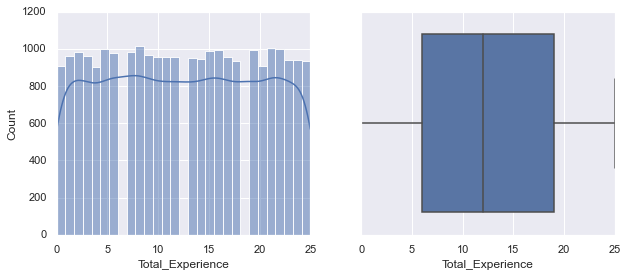

In [59]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,4)
sns.histplot(df_1['Total_Experience'], kde=True, ax=axes[0])
sns.boxplot(x='Total_Experience', data=df_1, ax=axes[1])

In [60]:
df_1["Total_Experience"].describe().T

count    25000.000000
mean        12.493080
std          7.471398
min          0.000000
25%          6.000000
50%         12.000000
75%         19.000000
max         25.000000
Name: Total_Experience, dtype: float64

**Insights -**

* Total_Experience -  Total industry experience ranges from a minimum of 0 to maximum of 25.

* Average Total_Experience is around 12.49.

* The standard deviation of Total_Experience is 7.47.

* 25% , 50% (median) and 75 % of Total_Experience are 6 , 12 and 19.

* Total_Experience don't have outliers.

<AxesSubplot:xlabel='Total_Experience_in_field_applied'>

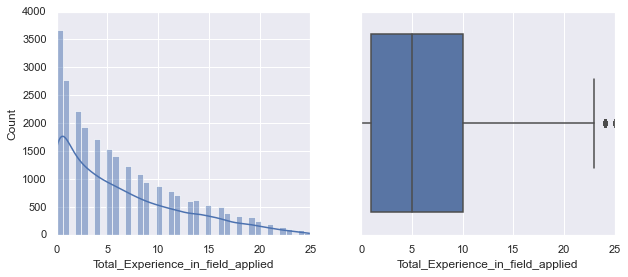

In [61]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,4)
sns.histplot(df_1['Total_Experience_in_field_applied'], kde=True, ax=axes[0])
sns.boxplot(x='Total_Experience_in_field_applied', data=df_1, ax=axes[1])

In [62]:
df_1["Total_Experience_in_field_applied"].describe().T

count    25000.000000
mean         6.258200
std          5.819513
min          0.000000
25%          1.000000
50%          5.000000
75%         10.000000
max         25.000000
Name: Total_Experience_in_field_applied, dtype: float64

**Insights -**

* Total_Experience_in_field_applied -  Total experience in the field applied for (past work experience that is relevant to the job) ranges from a minimum of 0 to maximum of 25.

* Average Total_Experience_in_field_applied is around 6.25.

* The standard deviation of Total_Experience_in_field_applied is 5.81.

* 25% , 50% (median) and 75 % of Total_Experience_in_field_applied  are 1 , 5 and 10.

* Total_Experience_in_field_applied have a few outliers.

<AxesSubplot:xlabel='Passing_Year_Of_Graduation'>

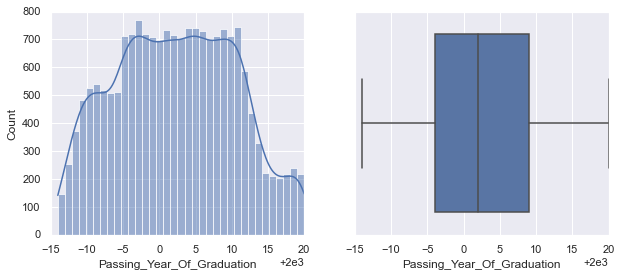

In [63]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,4)
sns.histplot(df_1['Passing_Year_Of_Graduation'], kde=True, ax=axes[0])
sns.boxplot(x='Passing_Year_Of_Graduation', data=df_1, ax=axes[1])

In [64]:
df_1["Passing_Year_Of_Graduation"].describe().T

count    18820.000000
mean      2002.193624
std          8.316640
min       1986.000000
25%       1996.000000
50%       2002.000000
75%       2009.000000
max       2020.000000
Name: Passing_Year_Of_Graduation, dtype: float64

**Insights -**

* Passing_Year_Of_Graduation -  Year of passing Graduation ranges from a minimum of 1986 to maximum of 2020.

* Average Passing_Year_Of_Graduation is around 2002.

* The standard deviation of Passing_Year_Of_Graduation is 8.3.

* 25% , 50% (median) and 75 % of Passing_Year_Of_Graduation are 1996 , 2002 and 2009.

* Passing_Year_Of_Graduation don't have outliers.

<AxesSubplot:xlabel='Passing_Year_Of_PG'>

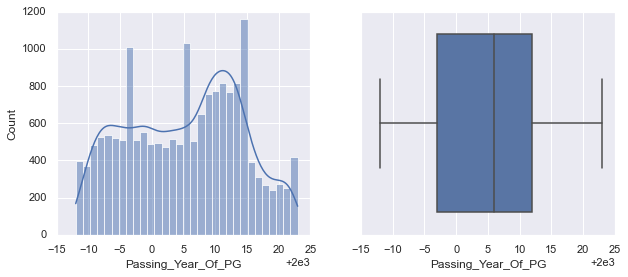

In [65]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,4)
sns.histplot(df_1['Passing_Year_Of_PG'], kde=True, ax=axes[0])
sns.boxplot(x='Passing_Year_Of_PG', data=df_1, ax=axes[1])

In [66]:
df_1["Passing_Year_Of_PG"].describe().T

count    17308.000000
mean      2005.153571
std          9.022963
min       1988.000000
25%       1997.000000
50%       2006.000000
75%       2012.000000
max       2023.000000
Name: Passing_Year_Of_PG, dtype: float64

**Insights -**

* Passing_Year_Of_PG -  Year of passing Post-Graduation ranges from a minimum of 1988 to maximum of 2023.

* Average Passing_Year_Of_PG is around 2005.

* The standard deviation of Passing_Year_Of_PG is 9.0.

* 25% , 50% (median) and 75 % of Passing_Year_Of_PG are 1997 , 2006 and 2012.

* Passing_Year_Of_PG don't have outliers.

<AxesSubplot:xlabel='Passing_Year_Of_PHD'>

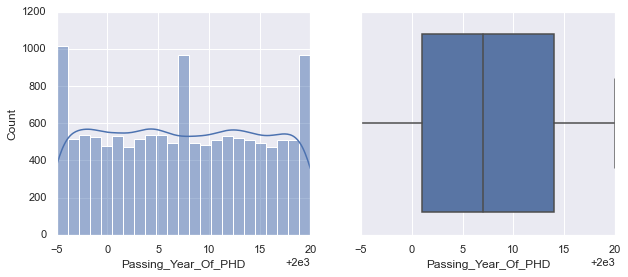

In [67]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,4)
sns.histplot(df_1['Passing_Year_Of_PHD'], kde=True, ax=axes[0])
sns.boxplot(x='Passing_Year_Of_PHD', data=df_1, ax=axes[1])

In [68]:
df_1["Passing_Year_Of_PHD"].describe().T

count    13119.000000
mean      2007.396372
std          7.493601
min       1995.000000
25%       2001.000000
50%       2007.000000
75%       2014.000000
max       2020.000000
Name: Passing_Year_Of_PHD, dtype: float64

**Insights -**

* Passing_Year_Of_PHD -  Year of passing PHD ranges from a minimum of 1995 to maximum of 2020.

* Average Passing_Year_Of_PHD is around 2007.

* The standard deviation of Passing_Year_Of_PHD is 7.

* 25% , 50% (median) and 75 % of Passing_Year_Of_PHD are 2001 , 2007 and 2014.

* Passing_Year_Of_PHD don't have outliers.

<AxesSubplot:xlabel='Current_CTC'>

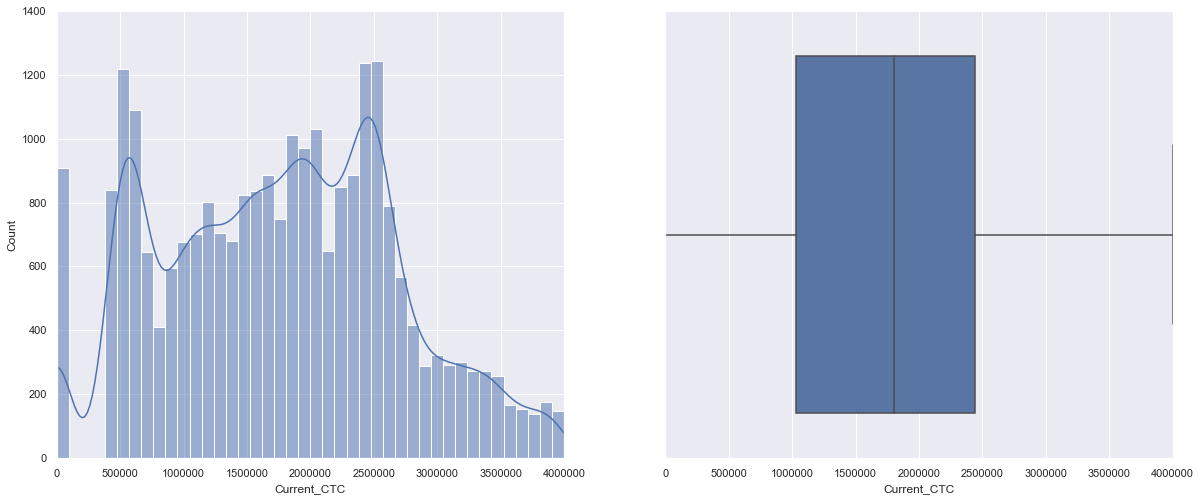

In [69]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,8)
sns.histplot(df_1['Current_CTC'], kde=True, ax=axes[0])
sns.boxplot(x='Current_CTC', data=df_1, ax=axes[1])

In [70]:
df_1["Current_CTC"].describe().T

count    2.500000e+04
mean     1.760945e+06
std      9.202125e+05
min      0.000000e+00
25%      1.027312e+06
50%      1.802568e+06
75%      2.443883e+06
max      3.999693e+06
Name: Current_CTC, dtype: float64

**Insights -**

* Current CTC ranges from a minimum of  0 lac  to maximum of 3999693 lac.

* Average Current CTC is around 1760945 lac.

* The standard deviation of Current CTC is 920212.5 lac.

* 25% , 50% (median) and 75 % of Current CTC are 1027311.5 lac , 1802567.5 lac   and 2443883.25 lac.

*  Current CTC don't have outliers.

<AxesSubplot:xlabel='Expected_CTC'>

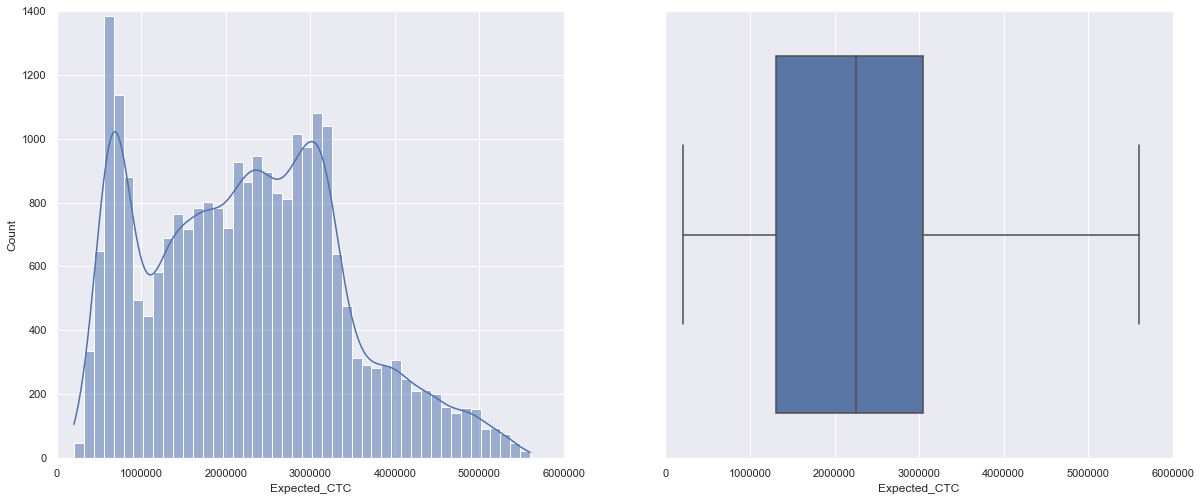

In [71]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,8)
sns.histplot(df_1['Expected_CTC'], kde=True, ax=axes[0])
sns.boxplot(x='Expected_CTC', data=df_1, ax=axes[1])

In [72]:
df_1["Expected_CTC"].describe().T

count    2.500000e+04
mean     2.250155e+06
std      1.160480e+06
min      2.037440e+05
25%      1.306278e+06
50%      2.252136e+06
75%      3.051354e+06
max      5.599570e+06
Name: Expected_CTC, dtype: float64

**Insights -**

* Expected CTC (Final CTC offered by Delta Ltd.) ranges from a minimum of  203744 lac to maximum of 5599570 lac.

* Average Expected CTC (Final CTC offered by Delta Ltd.) is around 2250155 lac.

* The standard deviation of  Expected CTC (Final CTC offered by Delta Ltd.) is 1160480 lac.

* 25% , 50% (median) and 75 % of Expected CTC (Final CTC offered by Delta Ltd.) are 1306277.5 lac  ,2252136.5 lac   and 3051353.75 lac.

*  Expected CTC (Final CTC offered by Delta Ltd.) don't have outliers.

**Univariate Analysis of Categorical Variables**

**Piechart -**

A pie chart is a circle divided into sectors that each represent a proportion of the whole. It is often used to show proportion, where the sum of the sectors equal 100%.

In [73]:
df_1["Department"].value_counts(normalize=True)

Marketing         0.107056
Analytics/BI      0.094321
Healthcare        0.092791
Others            0.091846
Sales             0.089596
HR                0.089461
Banking           0.087841
Education         0.087661
Engineering       0.087166
Top Management    0.073441
Accounts          0.050311
IT-Software       0.048510
Name: Department, dtype: float64

In [74]:
df_1["Department"].nunique()

12

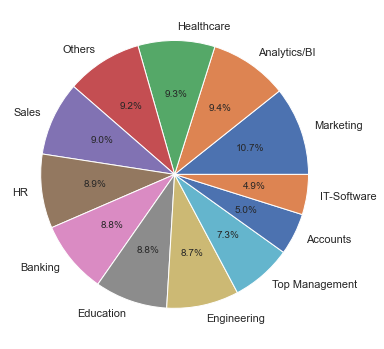

In [75]:
plt.figure(figsize=(10,6))
plt.pie(df_1["Department"].value_counts(),labels=df_1["Department"].value_counts().index,autopct='%1.1f%%')
plt.show()

**Insights -**

* There are 12 types of Department present in the data named as 'Marketing' , 'Analytics/BI' , 'Healthcare' , 'Others' , 'Sales' , 'HR' ,'Banking' , 'Education' ,'Engineering' , 'Top Management' ,'Accounts' and 'IT-Software'.

* Majority of applicants are of Marketing Department ( 10.70% - applicants) ,Analytics/BI ( 9.43% - applicants) , Health-care ( 9.27% - applicants) and others ( 9.18% - applicants).

* Least applicants belongs to IT-Software Department( 4.8% - applicants).

* There is fine distribution of applicants in each department.

In [76]:
df_1["Role"].value_counts(normalize=True)

Others                  0.093522
Bio statistician        0.079586
Analyst                 0.078712
Project Manager         0.076965
Team Lead               0.076257
Consultant              0.074053
Business Analyst        0.071182
Sales Execituve         0.065482
Sales Manager           0.059367
Senior Researcher       0.051421
Financial Analyst       0.049174
CEO                     0.047801
Scientist               0.047385
Head                    0.046096
Associate               0.031909
Data scientist          0.015102
Principal Analyst       0.011441
Area Sales Manager      0.005575
Senior Analyst          0.005325
Researcher              0.005117
Sr. Business Analyst    0.004743
Professor               0.001373
Research Scientist      0.001373
Lab Executuve           0.001040
Name: Role, dtype: float64

In [77]:
df_1["Role"].nunique()

24

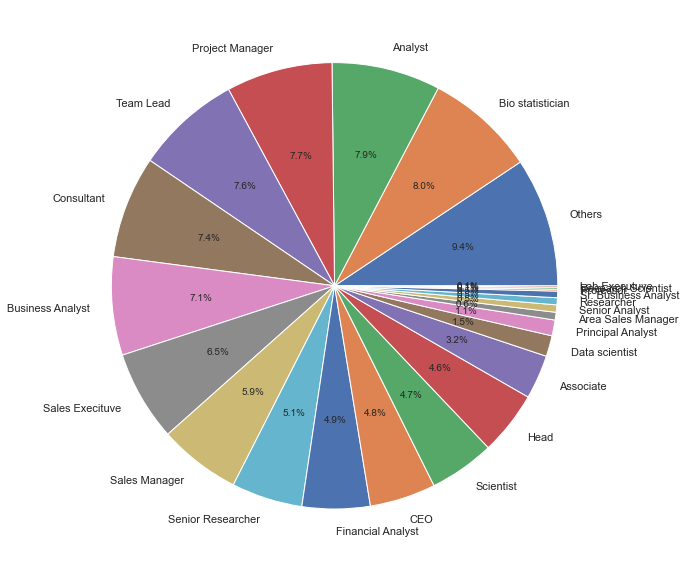

In [78]:
plt.figure(figsize=(20,10))
plt.pie(df_1["Role"].value_counts(),labels=df_1["Role"].value_counts().index,autopct='%1.1f%%')
plt.show()

**Insights -**

* There are 24 types of Roles present in the data named as 'Others' , 'Bio-statistician' ,'Analyst' , 'Project Manager' , 'Team Lead' ,'Consultant' ,'Business Analyst ' ,'Sales Execituve' , 'Sales Manager' , 'Senior Researcher' , 'Financial Analyst' , 'CEO' , 'Scientist' , 'Head' , 'Associate' ,'Data scientist' ,'Principal Analyst' , 'Area Sales Manager' ,'Senior Analyst' ,'Researcher' , 'Sr. Business Analyst' , 'Professor' ,'Research Scientist' and 'Lab Executuve'.   

* Majority of applicants worked as others(Role) i.e (9.4 %).

* Only 0.1% applicants worked as Lab executive.

In [79]:
df_1["Industry"].value_counts(normalize=True)

Training      0.092852
IT            0.092479
Insurance     0.092105
BFSI          0.091607
Automobile    0.091400
Analytics     0.091358
Retail        0.091109
Telecom       0.090902
Aviation      0.090611
FMCG          0.090486
Others        0.085090
Name: Industry, dtype: float64

In [80]:
df_1["Industry"].nunique()

11

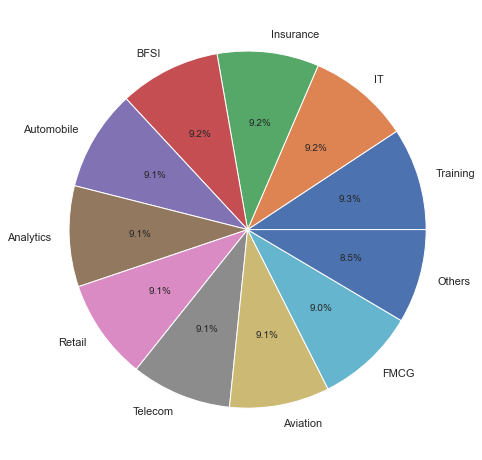

In [81]:
plt.figure(figsize=(20,8))
plt.pie(df_1["Industry"].value_counts(),labels=df_1["Industry"].value_counts().index,autopct='%1.1f%%')
plt.show()

**Insights -**

* There are 11 types of Industries present in the data named as 'Training' , 'IT' ,'Insurance' ,'BFSI' ,'Automobile' , 'Analytics' , 'Retail' ,'Telecom' ,'Aviation' ,'FMCG' and 'Others'.

* Most of applicants worked in Training Industry i.e.(9.3%).

* There is not much variation in the Industry column have a fair distribution for all applicants.

In [82]:
df_1["Organization"].value_counts(normalize=True)

M    0.065333
J    0.064544
P    0.064005
H    0.063590
A    0.063341
F    0.062469
G    0.062427
K    0.062386
I    0.061805
E    0.061763
B    0.061763
L    0.061597
C    0.061514
N    0.061265
D    0.061182
O    0.061016
Name: Organization, dtype: float64

In [83]:
df_1["Organization"].nunique()

16

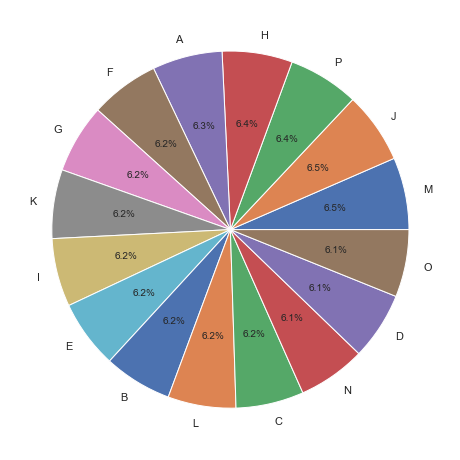

In [84]:
plt.figure(figsize=(20,8))
plt.pie(df_1["Organization"].value_counts(),labels=df_1["Organization"].value_counts().index,autopct='%1.1f%%')
plt.show()

**Insights -**

* There are 16 types of Organization name present in the dataset named as 'M' ,'J' ,'P' ,'H' , 'A ' , 'F ' ,'G' ,'K' ,'I' ,'E' ,'B' ,'L' ,'C' ,'N' , 'D' and 'O'.

* There is not too much variations in the Organization columns equivalent number of applicants worked in 16 different organization.


In [85]:
df_1["Designation"].value_counts(normalize=True)

HR                    0.075351
Others                0.075305
Manager               0.074436
Product Manager       0.074345
Sr.Manager            0.073934
Consultant            0.073431
Marketing Manager     0.072699
Assistant Manager     0.072699
Data Analyst          0.072013
Research Analyst      0.071464
Medical Officer       0.047872
Software Developer    0.041790
Web Designer          0.040327
Network Engineer      0.039413
Director              0.035298
CA                    0.032692
Research Scientist    0.024553
Scientist             0.002378
Name: Designation, dtype: float64

In [86]:
df_1["Designation"].nunique()

18

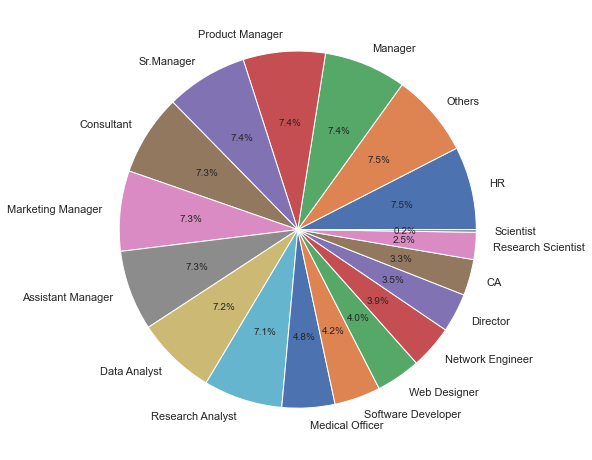

In [87]:
plt.figure(figsize=(20,8))
plt.pie(df_1["Designation"].value_counts(),labels=df_1["Designation"].value_counts().index,autopct='%1.1f%%')
plt.show()

**Insights -**

* There are 18 types of Designation present in the dataset named as 'HR' , 'Others' ,'Manager' , 'Product Manager' ,'Sr.Manager' ,'Consultant' ,'Marketing Manager' ,'Assistant Manager' , 'Data Analyst' ,'Research Analyst','Medical Officer' ,'Software Developer' , 'Web Designer' .'Network Engineer' , 'Director' ,'CA' ,'Research Scientist' and 'Scientist'.

* Most of applicants worked as HR  and others i.e.(7.5%).

* Only 0.2% applicants worked as Scientist.

* There is fine distribution of applicants across various Designation.

In [88]:
df_1["Highest_Education"].value_counts(normalize=True)

PG            0.25304
Doctorate     0.25140
Grad          0.24836
Under Grad    0.24720
Name: Highest_Education, dtype: float64

In [89]:
df_1["Highest_Education"].nunique()

4

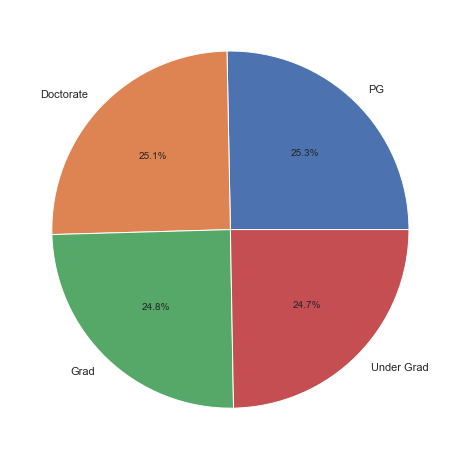

In [90]:
plt.figure(figsize=(20,8))
plt.pie(df_1["Highest_Education"].value_counts(),labels=df_1["Highest_Education"].value_counts().index,autopct='%1.1f%%')
plt.show()

**Insights -**

* There are 4 types of Education labels present in the dataset named as 'Under Grad' ,'Grad' ,'PG' and Doctorate.

* 24.72% applicants are Under Graduate.

* 24.83% applicants are Graduate.

* 25.30% applicants are Post Graduate.

* 25.14% applicants are Doctorate.

* There is fine distribution of applicants in each education label.

In [91]:
df_1["Graduation_Specialization"].value_counts(normalize=True)

Chemistry      0.094846
Economics      0.094261
Mathematics    0.094049
Zoology        0.091923
Arts           0.091445
Psychology     0.090595
Sociology      0.090170
Botony         0.088948
Engineering    0.088257
Others         0.088204
Statistics     0.087301
Name: Graduation_Specialization, dtype: float64

In [92]:
df_1["Graduation_Specialization"].nunique()

11

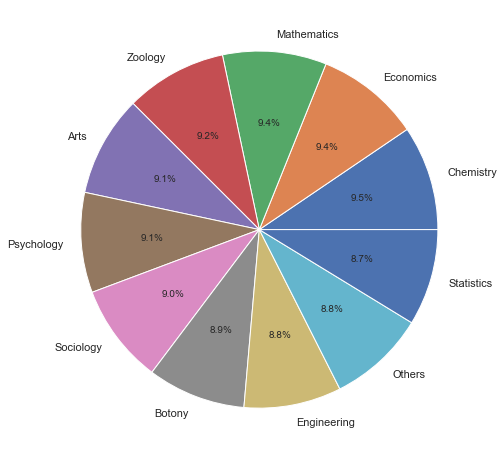

In [93]:
plt.figure(figsize=(20,8))
plt.pie(df_1["Graduation_Specialization"].value_counts(),labels=df_1["Graduation_Specialization"].value_counts().index,autopct='%1.1f%%')
plt.show()

**Insights -**

* There are 11 types of Graduation_Specialization labels present in the dataset named as 'Chemistry' , 'Economics ' , 'Mathematics' ,'Zoology' ,'Arts' ,'Psychology' , 'Sociology' , 'Botony' ,'Engineering' , 'Others' and 'Statistics'.

* Most of applicants did their graduation specialization in chemistry ,i.e.(9.5%)

* There is fine distribution of applicants in each Graduation_Specialization label.

In [94]:
df_1["University_Grad"].value_counts(normalize=True)

Bhubaneswar    0.080234
Delhi          0.079277
Mangalore      0.079171
Mumbai         0.079065
Jaipur         0.078533
Lucknow        0.077418
Guwahati       0.076993
Pune           0.075877
Kolkata        0.075770
Surat          0.075664
Nagpur         0.075452
Bangalore      0.074070
Ahmedabad      0.072476
Name: University_Grad, dtype: float64

In [95]:
df_1["University_Grad"].nunique()

13

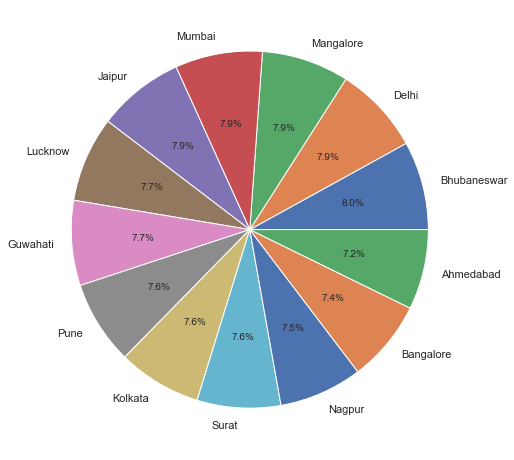

In [96]:
plt.figure(figsize=(20,8))
plt.pie(df_1["University_Grad"].value_counts(),labels=df_1["University_Grad"].value_counts().index,autopct='%1.1f%%')
plt.show()

**Insights -**

* There are 13 types of University_Grad labels present in the dataset named as  'Bhubaneswar' ,'Delhi' ,'Mangalore' ,'Mumbai' ,'Jaipur' ,'Lucknow' ,'Guwahati' ,'Pune' ,'Kolkata' ,'Surat' ,'Nagpur' ,'Bangalore' and 'Ahmedabad'.

* Most of applicants did their graduation from Bhubaneswar University (8%) and Delhi University(7.9%).

* There is equivalent number of graduates from all universities.

In [97]:
df_1["PG_Specialization"].value_counts(normalize=True)

Mathematics    0.103998
Chemistry      0.103767
Economics      0.101398
Engineering    0.096718
Statistics     0.094696
Others         0.094118
Psychology     0.082332
Zoology        0.082274
Arts           0.081465
Sociology      0.080021
Botony         0.079212
Name: PG_Specialization, dtype: float64

In [98]:
df_1["PG_Specialization"].nunique()

11

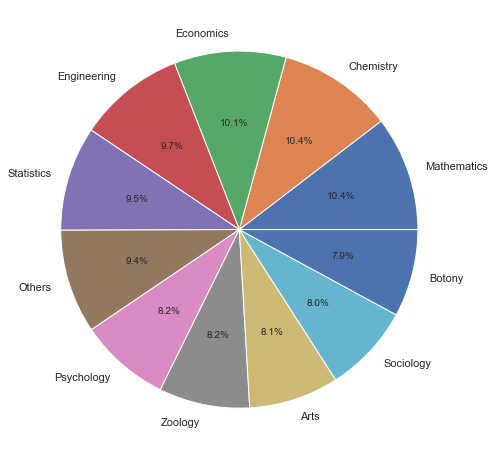

In [99]:
plt.figure(figsize=(20,8))
plt.pie(df_1["PG_Specialization"].value_counts(),labels=df_1["PG_Specialization"].value_counts().index,autopct='%1.1f%%')
plt.show()

**Insights -**

* There are 11 types of PG_Specialization labels present in the dataset named as 'Mathematics' , 'Chemistry' ,'Economics' ,'Engineering' ,'Statistics' , 'Others' , 'Psychology' , 'Zoology' , 'Arts' , 'Sociology' and 'Botony'.

* Most of applicants did their post-graduation specialization in mathematics (10.4%) and chemistry (10.4%).

* There is fine distribution of applicants in each PG_Specialization label.

In [100]:
df_1["University_PG"].value_counts(normalize=True)

Bhubaneswar    0.079559
Delhi          0.079039
Mangalore      0.078981
Mumbai         0.078923
Jaipur         0.078519
Guwahati       0.077421
Surat          0.076785
Lucknow        0.076728
Pune           0.075919
Nagpur         0.075861
Kolkata        0.075456
Bangalore      0.074359
Ahmedabad      0.072452
Name: University_PG, dtype: float64

In [101]:
df_1["University_PG"].nunique()

13

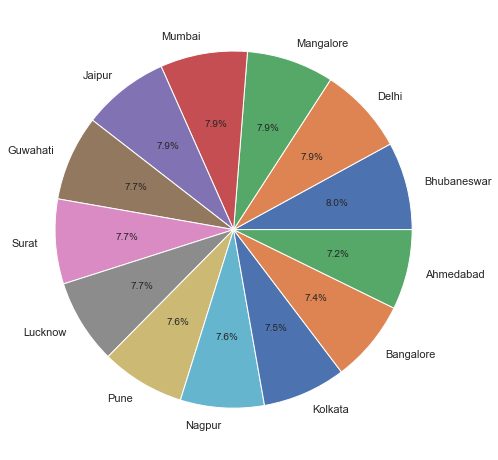

In [102]:
plt.figure(figsize=(20,8))
plt.pie(df_1["University_PG"].value_counts(),labels=df_1["University_PG"].value_counts().index,autopct='%1.1f%%')
plt.show()

**Insights -**

* There are 13 types of University_PG labels present in the dataset named as  'Bhubaneswar' ,'Delhi' ,'Mangalore' ,'Mumbai' ,'Jaipur' ,'Lucknow' ,'Guwahati' ,'Pune' ,'Kolkata' ,'Surat' ,'Nagpur' ,'Bangalore' and 'Ahmedabad'.

* Most of applicants did their graduation from Bhubaneswar University (8%) and Delhi University(7.9%).

* There is equivalent number of post-graduates from all universities.

In [103]:
df_1["PHD_Specialization"].value_counts(normalize=True)

Others         0.117768
Chemistry      0.111137
Mathematics    0.105038
Economics      0.102371
Engineering    0.095968
Statistics     0.094214
Zoology        0.077064
Sociology      0.075387
Psychology     0.075158
Botony         0.074396
Arts           0.071499
Name: PHD_Specialization, dtype: float64

In [104]:
df_1["PHD_Specialization"].nunique()

11

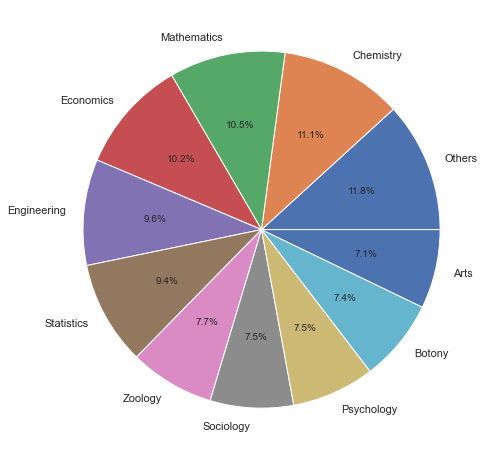

In [105]:
plt.figure(figsize=(20,8))
plt.pie(df_1["PHD_Specialization"].value_counts(),labels=df_1["PHD_Specialization"].value_counts().index,autopct='%1.1f%%')
plt.show()

**Insights -**

* There are 11 types of PHD_Specialization labels present in the dataset named as 'Others' ,'Chemistry','Mathematics','Economics' ,'Engineering' ,'Statistics' ,'Zoology','Sociology' ,'Psychology ' ,'Botony' and 'Arts'.

* Most of applicants did their PhD specialization in others (11.8%) and chemistry (11.1%).

* Rest there is well distribution of applicants in PHD_Specialization labels.

In [106]:
df_1["University_PHD"].value_counts(normalize=True)

Kolkata        0.081485
Delhi          0.081104
Mumbai         0.079732
Guwahati       0.078512
Pune           0.077064
Surat          0.076911
Jaipur         0.076073
Lucknow        0.075844
Bangalore      0.075768
Bhubaneswar    0.075616
Mangalore      0.075311
Nagpur         0.073481
Ahmedabad      0.073100
Name: University_PHD, dtype: float64

In [107]:
df_1["University_PHD"].nunique()

13

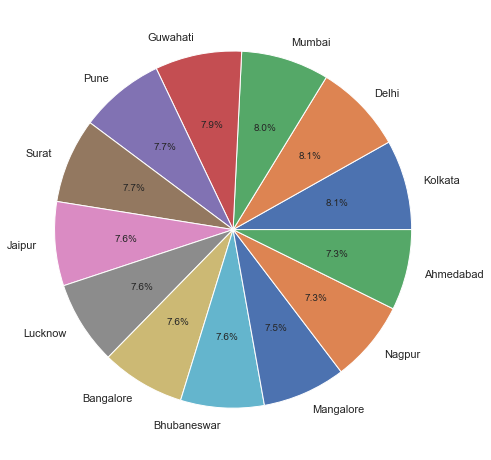

In [108]:
plt.figure(figsize=(20,8))
plt.pie(df_1["University_PHD"].value_counts(),labels=df_1["University_PHD"].value_counts().index,autopct='%1.1f%%')
plt.show()

**Insights -**

* There are 13 types of University_PHD labels present in the dataset named as 'Bhubaneswar' ,'Delhi' ,'Mangalore' ,'Mumbai' ,'Jaipur' ,'Lucknow' ,'Guwahati' ,'Pune' ,'Kolkata' ,'Surat' ,'Nagpur' ,'Bangalore' and 'Ahmedabad' .

* Most of applicants did their PhD from Kolkata University (8.1%) and Delhi University(8.1%).

* There is almost equivalent number of PhD applicants from all universities.

In [109]:
df_1["Current_location"].value_counts(normalize=True)

Bangalore      0.06968
Jaipur         0.06824
Bhubaneswar    0.06816
Mangalore      0.06788
Delhi          0.06720
Ahmedabad      0.06708
Guwahati       0.06688
Chennai        0.06676
Kanpur         0.06656
Nagpur         0.06652
Mumbai         0.06632
Lucknow        0.06548
Pune           0.06488
Kolkata        0.06480
Surat          0.06356
Name: Current_location, dtype: float64

In [110]:
df_1["Current_location"].nunique()

15

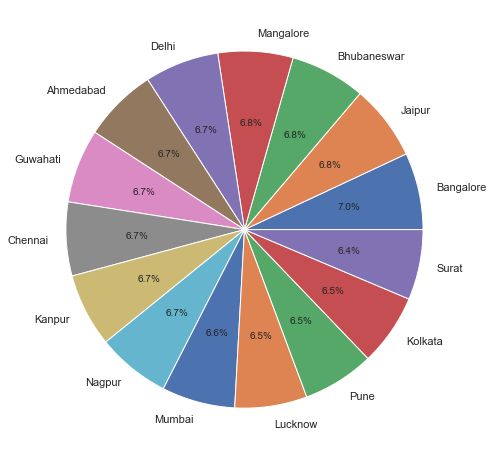

In [111]:
plt.figure(figsize=(20,8))
plt.pie(df_1["Current_location"].value_counts(),labels=df_1["Current_location"].value_counts().index,autopct='%1.1f%%')
plt.show()

**Insights -**

* There are 15 types of Curent_Location labels present in the dataset named as 'Bangalore' , 'Jaipur' ,'Bhubaneswar' , 'Mangalore' ,'Delhi' ,'Ahmedabad' ,'Guwahati' ,'Chennai' ,'Kanpur' ,'Nagpur' ,'Mumbai' ,'Lucknow' ,'Pune' ,'Kolkata' and 'Surat'.

* Most of applicants Curent_Location is Bangalore (7.0%) , Jaipur , Bhubaneswar and Mangalore (6.8%).

* Rest there is fair distribution of frequency for applicant's current location.

In [112]:
df_1["Preferred_location"].value_counts(normalize=True)

Kanpur         0.06880
Ahmedabad      0.06860
Guwahati       0.06780
Mangalore      0.06776
Surat          0.06772
Delhi          0.06732
Chennai        0.06720
Kolkata        0.06676
Jaipur         0.06636
Pune           0.06616
Bhubaneswar    0.06612
Nagpur         0.06600
Mumbai         0.06468
Lucknow        0.06448
Bangalore      0.06424
Name: Preferred_location, dtype: float64

In [113]:
df_1["Preferred_location"].nunique()

15

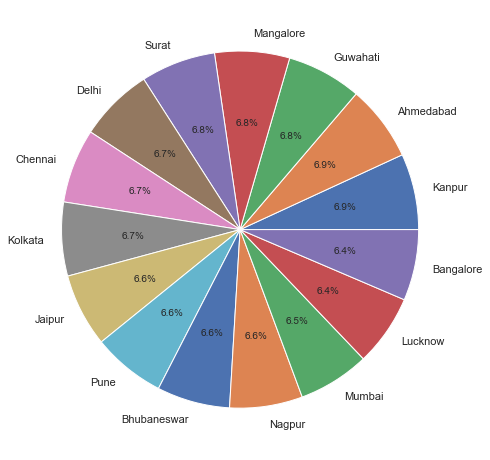

In [114]:
plt.figure(figsize=(20,8))
plt.pie(df_1["Preferred_location"].value_counts(),labels=df_1["Preferred_location"].value_counts().index,autopct='%1.1f%%')
plt.show()

**Insights -**

* There are 15 types of Preferred_location labels present in the dataset named as 'Bangalore' , 'Jaipur' ,'Bhubaneswar' , 'Mangalore' ,'Delhi' ,'Ahmedabad' ,'Guwahati' ,'Chennai' ,'Kanpur' ,'Nagpur' ,'Mumbai' ,'Lucknow' ,'Pune' ,'Kolkata' and 'Surat'.

* Most of applicant's preferred location is Kanpur , Ahmedabad i.e (6.9%).

* Rest there is fair distribution of frequency for applicant's preferred location.

In [115]:
df_1["Inhand_Offer"].value_counts(normalize=True) 

N    0.69672
Y    0.30328
Name: Inhand_Offer, dtype: float64

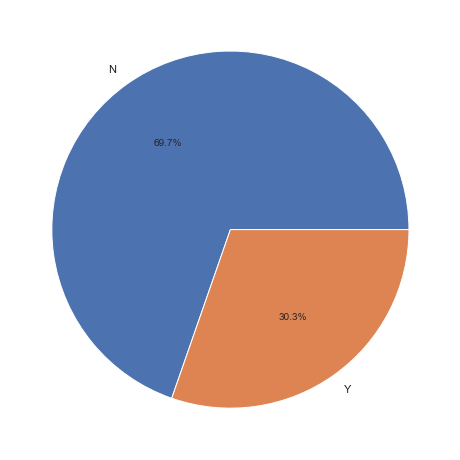

In [116]:
plt.figure(figsize=(20,8))
plt.pie(df_1["Inhand_Offer"].value_counts(),labels=df_1["Inhand_Offer"].value_counts().index,autopct='%1.1f%%')
plt.show()

**Insights -**

* There are 2 types of Inhand_Offer labels present in the dataset named as 'Y'(Yes) and 'N' (No).

* Around 69.7% applicants don't holds any offer in their hand.

* Only 30.3% applicants holds any offer in their hand.

In [117]:
df_1["Last_Appraisal_Rating"].value_counts(normalize=True) 

B                0.228333
D                0.204093
C                0.199734
A                0.193882
Key_Performer    0.173958
Name: Last_Appraisal_Rating, dtype: float64

In [118]:
df_1["Last_Appraisal_Rating"].nunique()

5

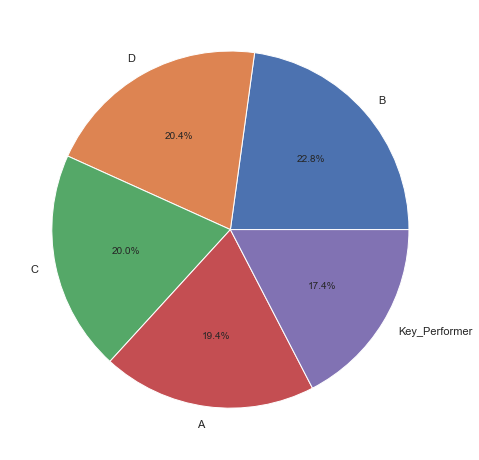

In [119]:
plt.figure(figsize=(20,8))
plt.pie(df_1["Last_Appraisal_Rating"].value_counts(),labels=df_1["Last_Appraisal_Rating"].value_counts().index,autopct='%1.1f%%')
plt.show()

**Insights -**

* There are 5 types of Last_Appraisal_Rating labels present in the dataset named as 'Key_Performer' , 'A' ,'B' ,'C' and 'D'.

* Around 17.4% applicants Last_Appraisal_Rating is Key_Performer.

* 19.4% applicants Last_Appraisal_Rating is A.

* 22.8% applicants Last_Appraisal_Rating is B.

* 20% applicants Last_Appraisal_Rating is C.

* 20.4% applicants Last_Appraisal_Rating is D.

**Bivariate Analysis -**

**Scatter Plot -**

A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

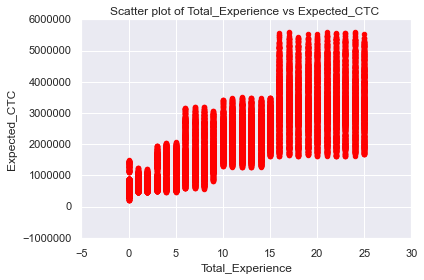

In [120]:
plt.scatter(df_1['Total_Experience'],df_1['Expected_CTC'],color="RED")
plt.title("Scatter plot of Total_Experience vs Expected_CTC ")
plt.xlabel("Total_Experience")
plt.ylabel("Expected_CTC")
plt.tight_layout()
plt.show()

**Insights -**

* From the above plot we see that the Total_Experience and the Expected_CTC  is showing a strong relationship,with increase in Total_Experience(Independent Variable),Expected_CTC (Target Variable)is also increases.

* Applicants with higher  Total_Experience have higher Expected_CTC.

* This will be a good feature for predicting the target variable ("Expected_CTC).

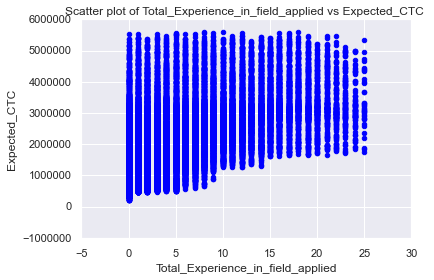

In [121]:
plt.scatter(df_1["Total_Experience_in_field_applied"],df_1['Expected_CTC'],color="Blue")
plt.title("Scatter plot of Total_Experience_in_field_applied vs Expected_CTC ")
plt.xlabel("Total_Experience_in_field_applied")
plt.ylabel("Expected_CTC")
plt.tight_layout()
plt.show()

**Insights -**

* From the above plot we see that the Total_Experience_in_field_applied and the Expected_CTC  is showing a positive relationship,with increase in Total_Experience_in_field_applied(Independent Variable),Expected_CTC (Target Variable)is slightly increases.

* Applicants with higher  Total_Experience_in_field_applied have high Expected_CTC.

* This may be a good feature for predicting the target variable ("Expected_CTC).

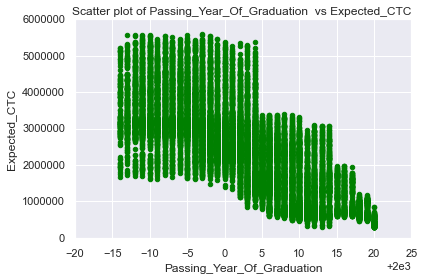

In [122]:
plt.scatter(df_1["Passing_Year_Of_Graduation"],df_1['Expected_CTC'],color="Green")
plt.title("Scatter plot of Passing_Year_Of_Graduation  vs Expected_CTC ")
plt.xlabel("Passing_Year_Of_Graduation")
plt.ylabel("Expected_CTC")
plt.tight_layout()
plt.show()

**Insights -**

* From the above plot we see that the Passing_Year_Of_Graduation and the Expected_CTC is showing a negative relationship, as the Passing_Year_Of_Graduation increases the Expected_CTC goes on decreases.

* Recent graduate applicants have lower expected ctc as compared to other applicants.

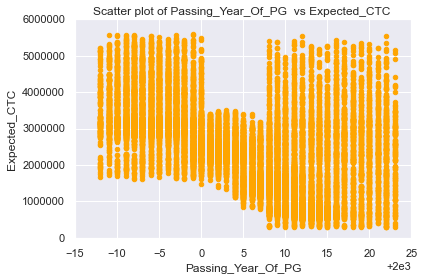

In [123]:
plt.scatter(df_1["Passing_Year_Of_PG"],df_1['Expected_CTC'],color="Orange")
plt.title("Scatter plot of Passing_Year_Of_PG  vs Expected_CTC ")
plt.xlabel("Passing_Year_Of_PG")
plt.ylabel("Expected_CTC")
plt.tight_layout()
plt.show()

**Insights -**

* There is no specific relation between Passing_Year_Of_PG and Expected_CTC.

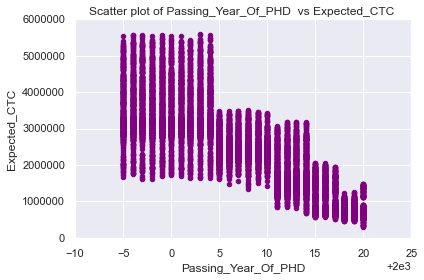

In [124]:
plt.scatter(df_1["Passing_Year_Of_PHD"],df_1['Expected_CTC'],color="Purple")
plt.title("Scatter plot of Passing_Year_Of_PHD  vs Expected_CTC ")
plt.xlabel("Passing_Year_Of_PHD")
plt.ylabel("Expected_CTC")
plt.tight_layout()
plt.show()

**Insights -**

*  From the above plot we see that the Passing_Year_Of_PHD and the Expected_CTC is showing a negative relationship, as the Passing_Year_Of_PHD increases the Expected_CTC goes on decreases.

* Recently passed PhD applicants have lower expected ctc as compared to other applicants.

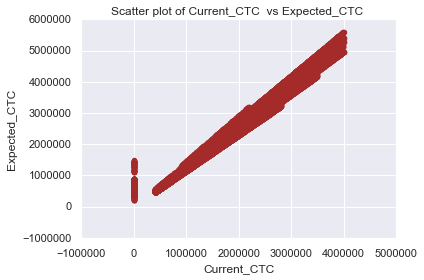

In [125]:
plt.scatter(df_1["Current_CTC"],df_1['Expected_CTC'],color="Brown")
plt.title("Scatter plot of Current_CTC  vs Expected_CTC ")
plt.xlabel("Current_CTC")
plt.ylabel("Expected_CTC")
plt.tight_layout()
plt.show()

**Insights -**

* From the above plot we see that the Current_CTC and the Expected_CTC is showing a positive relationship, as the Current_CTC increases the Expected_CTC goes on increases.

* Applicants with Current ctc zero have lower expected ctc.

*  Current_CTC will be a good predictor to predict the Expected_CTC.

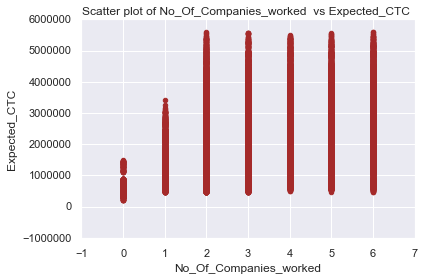

In [126]:
plt.scatter(df_1["No_Of_Companies_worked"],df_1['Expected_CTC'],color="Brown")
plt.title("Scatter plot of No_Of_Companies_worked  vs Expected_CTC ")
plt.xlabel("No_Of_Companies_worked")
plt.ylabel("Expected_CTC")
plt.tight_layout()
plt.show()

**Insights -**

* From the above plot we infer that there is some sort of relation between No_Of_Companies_worked and Expected_CTC.As No_Of_Companies_worked increase there is also some increase in Expected_CTC.

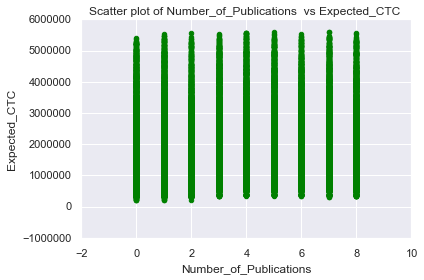

In [127]:
plt.scatter(df_1["Number_of_Publications"],df_1['Expected_CTC'],color="green")
plt.title("Scatter plot of Number_of_Publications  vs Expected_CTC ")
plt.xlabel("Number_of_Publications")
plt.ylabel("Expected_CTC")
plt.tight_layout()
plt.show()

**Insights -**

* There is no such relationship between Number_of_Publications and Expected_CTC.From the above visual we infer there is not any kind of impact of Number_of_Publications on Expected_CTC.Expected_CTC is somehow equivalent for all who have less or more Number_of_Publications.

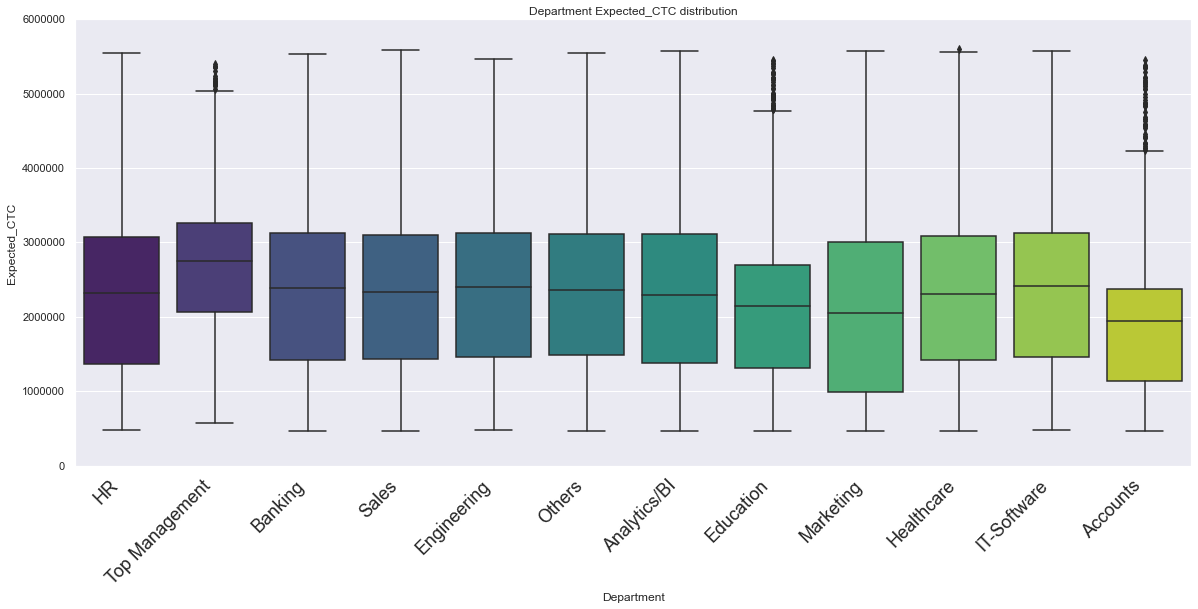

In [128]:
plt.figure(figsize=(20,8))

chart=sns.boxplot(x="Department", y="Expected_CTC", data=df_1, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Department Expected_CTC distribution')
chart;

**Insights -**

* Expected_CTC does vary based on the Department as expected. This conclusion can only be drawn through the graphical plots.

* Applicants for Top Management have higher median value than others for Expected_CTC

* Distribution for Expected_CTC  is bigger for Marketing Department applicants.

* Banking , Sales , Engineering and Others have median almost equivalent to each other and have almost similar kind of distribution too.

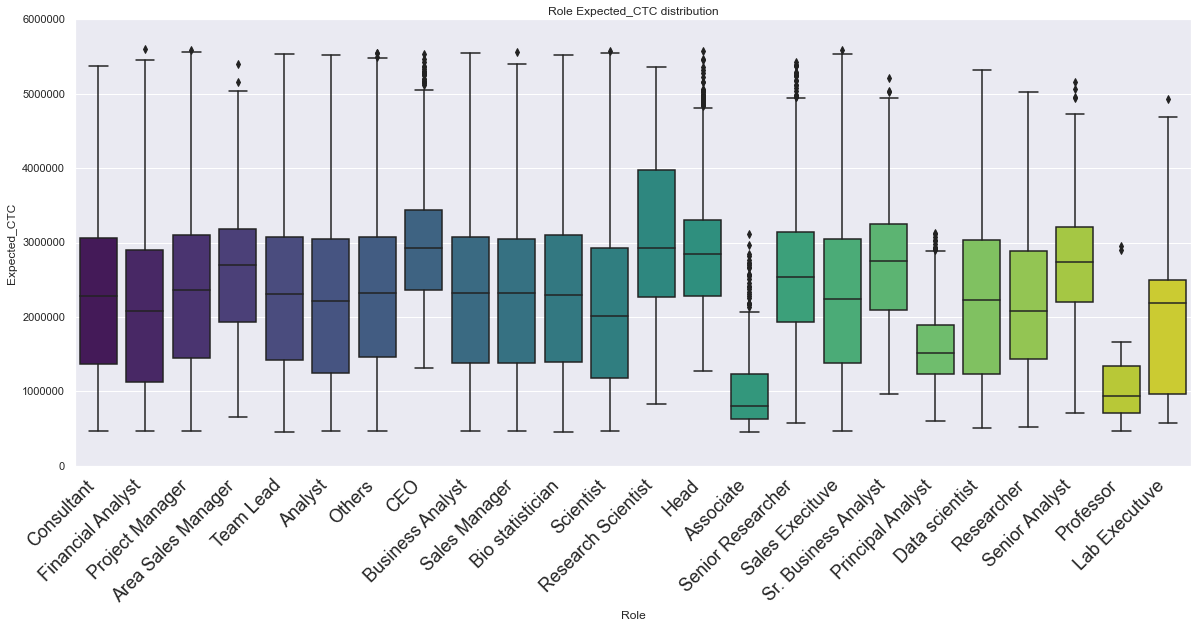

In [129]:
plt.figure(figsize=(20,8))

chart=sns.boxplot(x="Role", y="Expected_CTC", data=df_1, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Role Expected_CTC distribution')
chart;

**Insights -**

* Median values of CEO and Research Scientists for Expected_CTC are quite high as compared to others but distribution is wider for Research Scientists.

* Median values for Expected_CTC of Business Analyst , Sales Manager and Bio-Statistician are almost equivalent to each other.

* Professors also have low Expected_CTC than others.

* Associate have least Expected_CTC compared to others roles.

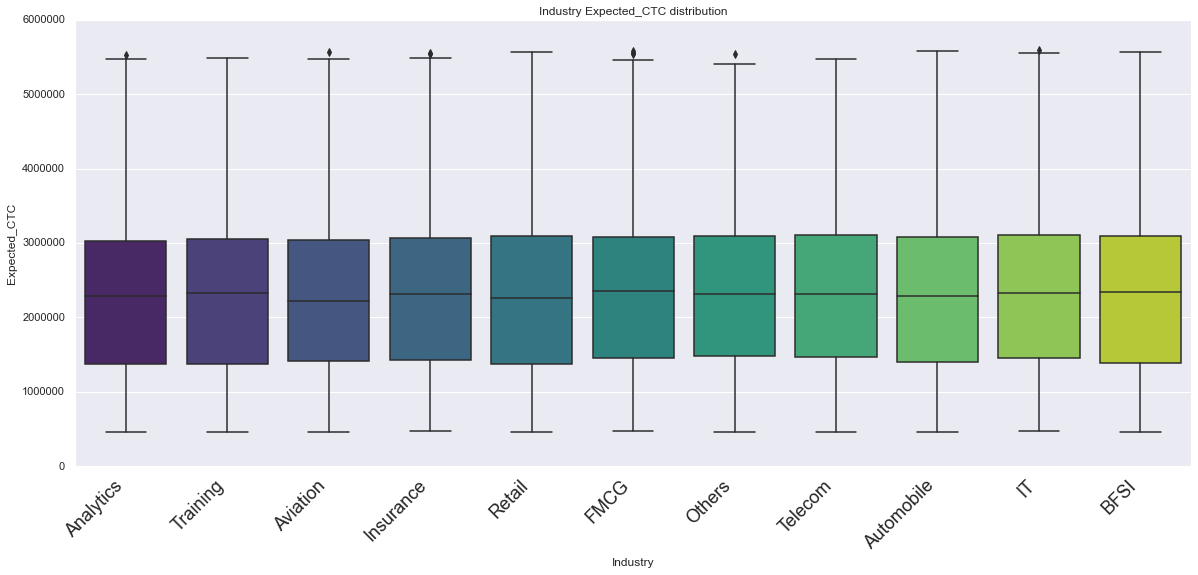

In [130]:
plt.figure(figsize=(20,8))

chart=sns.boxplot(x="Industry", y="Expected_CTC", data=df_1, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Industry Expected_CTC distribution')
chart;

**Insights -**

* There is not any variation in the distribution of Expected_CTC w.r.t. Industry , looks almost similar plus median values are also almost equivalent for all distribution not varies too much.

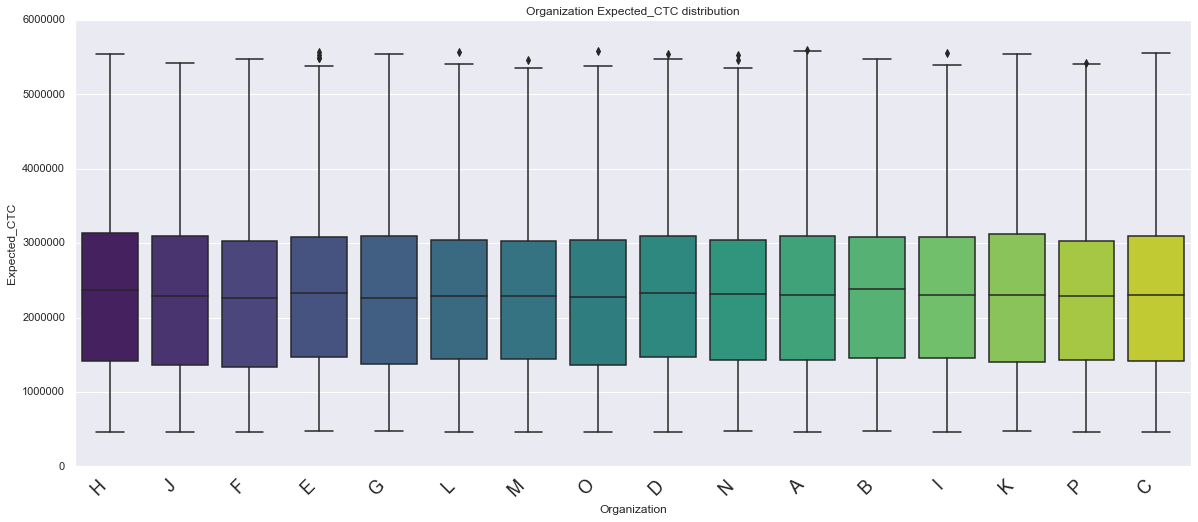

In [131]:
plt.figure(figsize=(20,8))
chart=sns.boxplot(x="Organization", y="Expected_CTC", data=df_1, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Organization Expected_CTC distribution')
chart;

**Insights -**

* There is not any variation in the distribution of Expected_CTC w.r.t. Organization , looks almost similar plus median values are also almost equivalent for all distribution not varies too much.

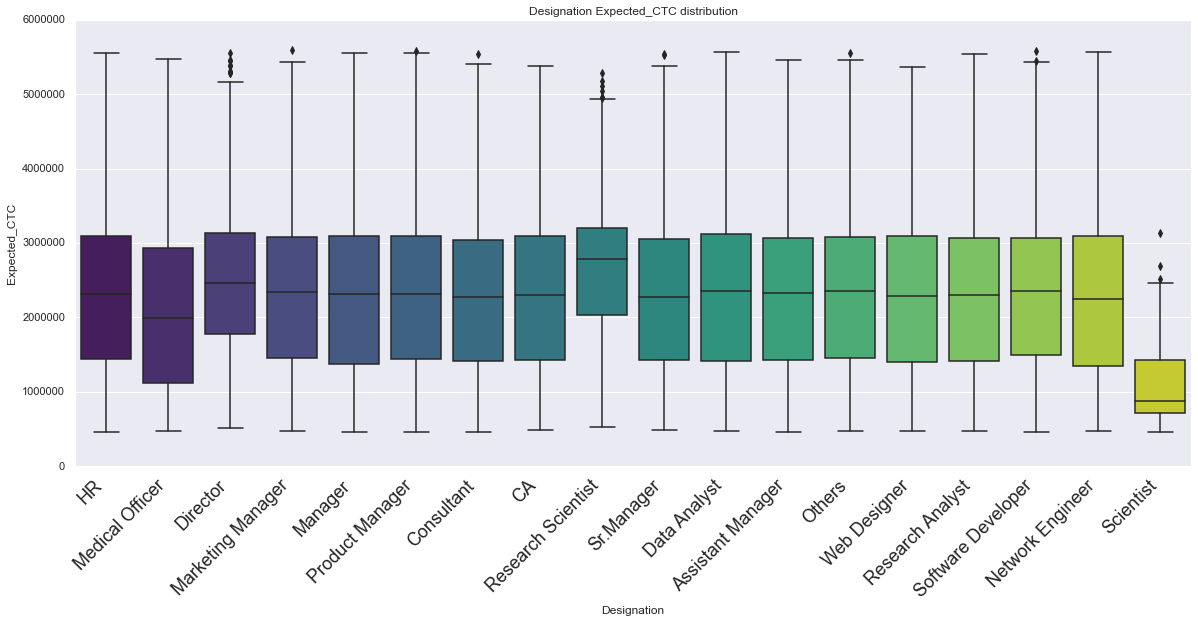

In [132]:
plt.figure(figsize=(20,8))
chart=sns.boxplot(x="Designation", y="Expected_CTC", data=df_1, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Designation Expected_CTC distribution')
chart;

**Insights -**

* Median values of Research Scientists for Expected_CTC are quite high as compared to others.

* Marketing Manger , Manager ,Product Manager and HR almost have equivalent median values for Expected_CTC.

* Similarly Data Analyst , Assistant Manger , Others , Web Designers and Research Analyst  have equivalent median values for Expected_CTC.

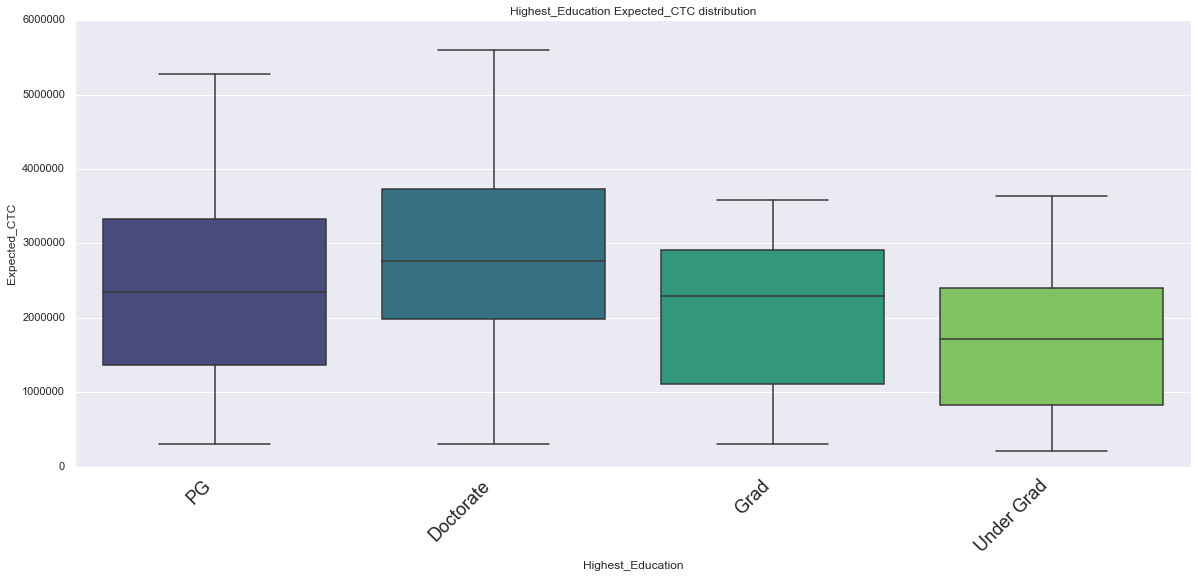

In [133]:
plt.figure(figsize=(20,8))
chart=sns.boxplot(x="Highest_Education", y="Expected_CTC", data=df_1, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Highest_Education Expected_CTC distribution')
chart;

**Insights -**

* Box-plot of Doctorate have higher median values for Expected_CTC as compared to others.

* Under Grad Box-plot have lowest median values for Expected_CTC.

* PG Box-plot is almost normal distributed.

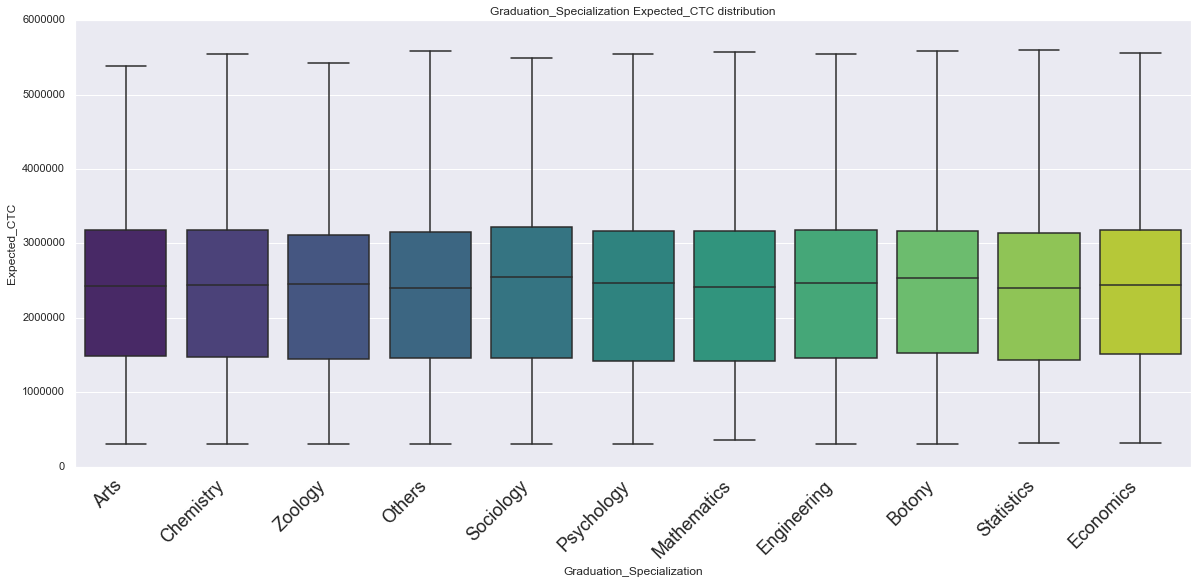

In [134]:
plt.figure(figsize=(20,8))
chart=sns.boxplot(x="Graduation_Specialization", y="Expected_CTC", data=df_1, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Graduation_Specialization Expected_CTC distribution')
chart;

**Insights -**

* There is not any variation in the distribution of Expected_CTC w.r.t. Graduation_Specialization  , looks almost similar plus median values are also almost equivalent for all not varies too much.

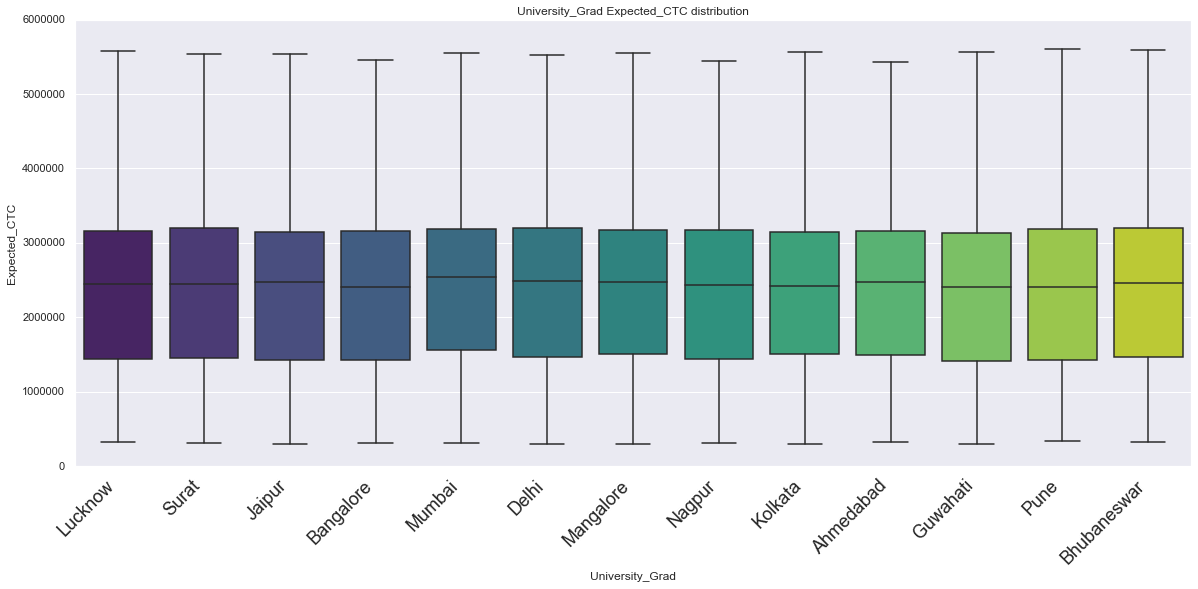

In [135]:
plt.figure(figsize=(20,8))
chart=sns.boxplot(x="University_Grad", y="Expected_CTC", data=df_1, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('University_Grad Expected_CTC distribution')
chart;

**Insights -**

* There is not any variation in the distribution of Expected_CTC w.r.t. University_Grad , looks almost similar plus median values are also almost equivalent for all not varies too much.

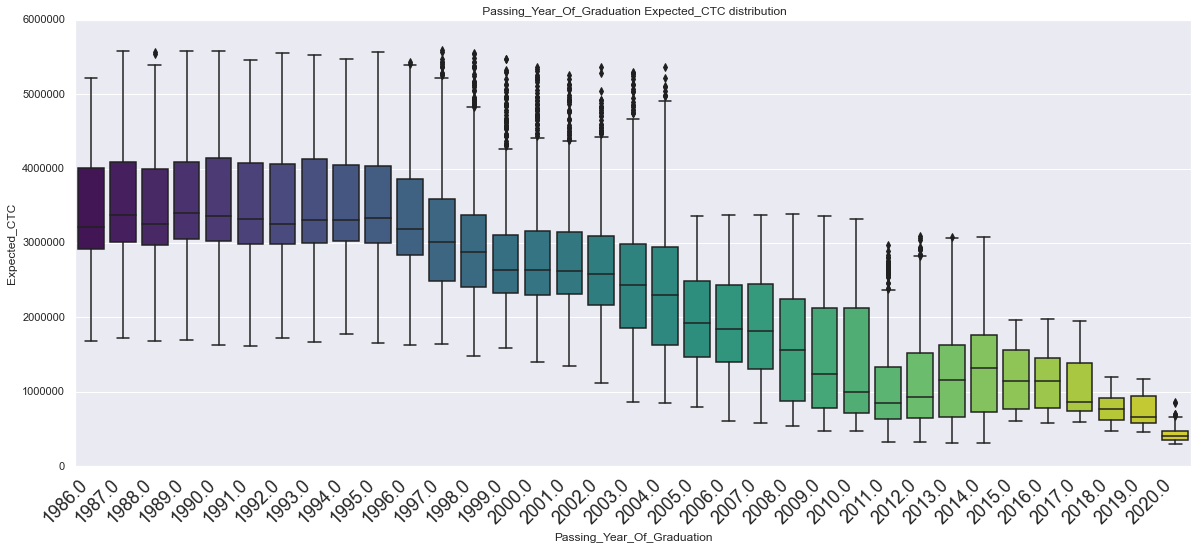

In [136]:
plt.figure(figsize=(20,8))
chart=sns.boxplot(x="Passing_Year_Of_Graduation", y="Expected_CTC", data=df_1, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title(' Passing_Year_Of_Graduation Expected_CTC distribution')
chart;

**Insights -**

* Expected_CTC does vary based on the Passing_Year_Of_Graduation as expected. This conclusion can only be drawn through the above plot.

* We infer that Expected_CTC  for recently graduated applicants is least as compared to others.

* There is variation in distribution of Expected_CTC w.r.t Passing_Year_Of_Graduation former graduate applicants have high median values for Expected_CTC than recently graduates.

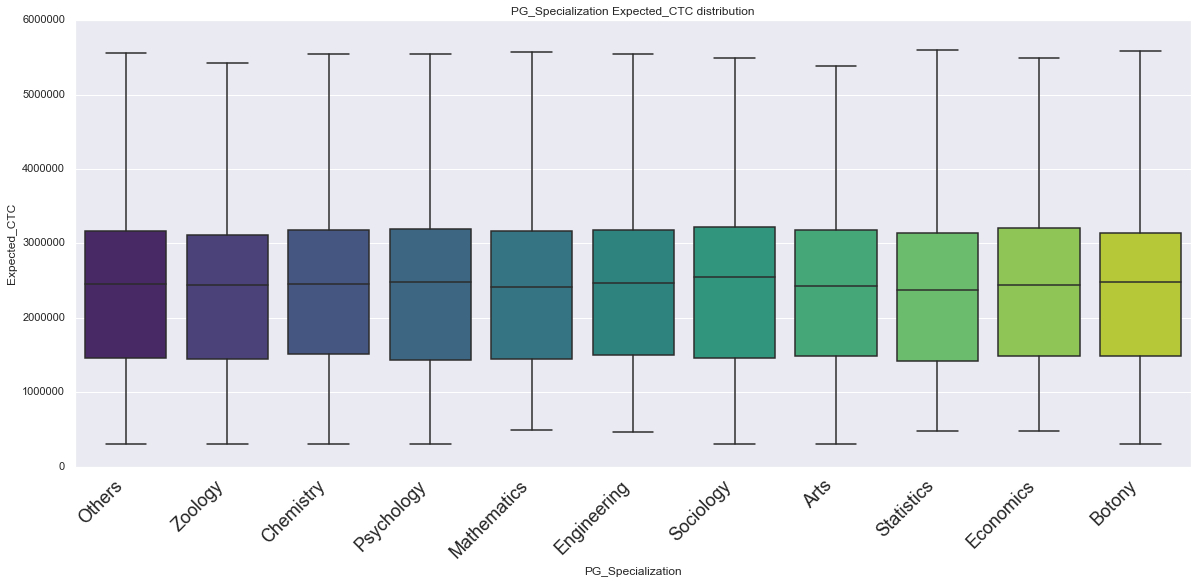

In [137]:
plt.figure(figsize=(20,8))
chart=sns.boxplot(x="PG_Specialization", y="Expected_CTC", data=df_1, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('PG_Specialization Expected_CTC distribution')
chart;

**Insights -**

* There is not any variation in the distribution of Expected_CTC w.r.t. PG_Specialization , looks almost similar plus median values are also almost equivalent for all not varies too much.

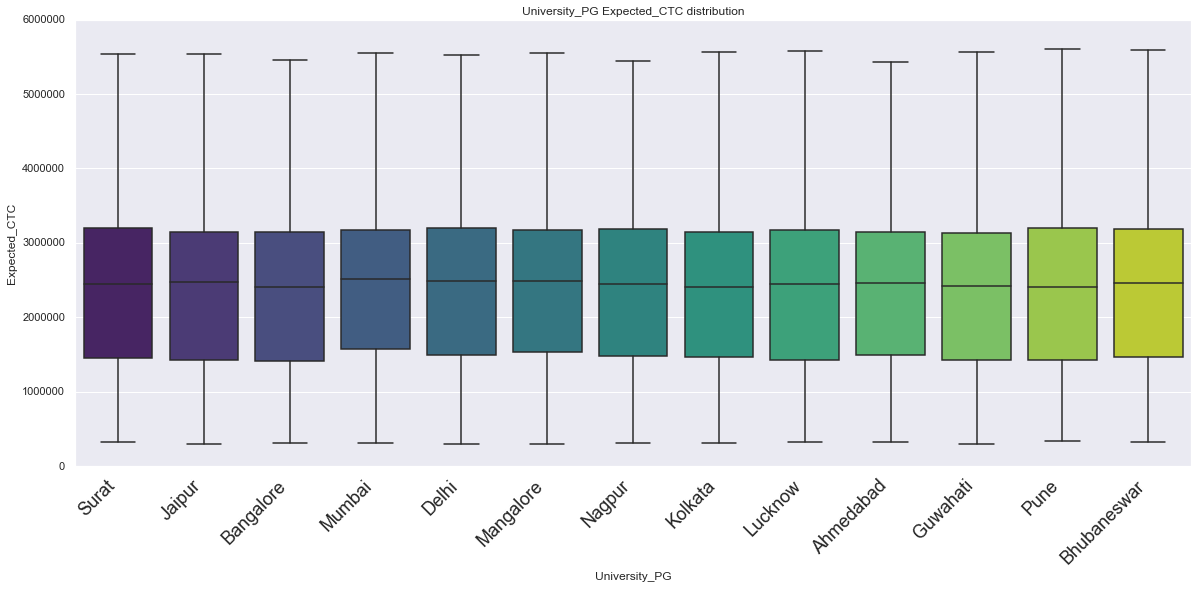

In [138]:
plt.figure(figsize=(20,8))
chart=sns.boxplot(x="University_PG", y="Expected_CTC", data=df_1, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('University_PG Expected_CTC distribution')
chart;

**Insights -**

* There is not any variation in the distribution of Expected_CTC w.r.t. PG_Specialization , looks almost similar plus median values are also almost equivalent for all not varies too much.

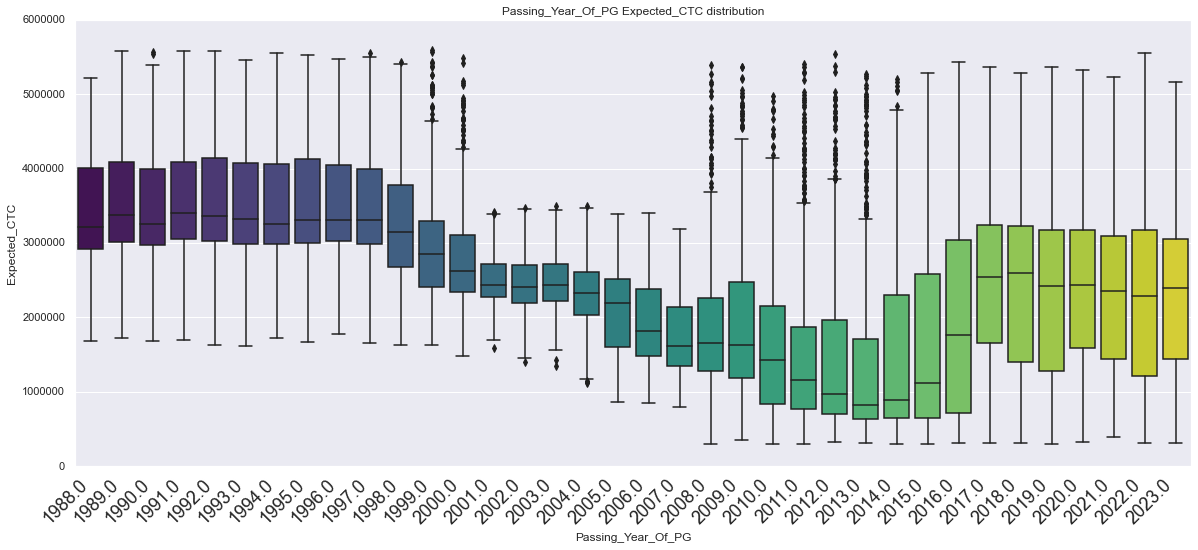

In [139]:
plt.figure(figsize=(20,8))
chart=sns.boxplot(x="Passing_Year_Of_PG", y="Expected_CTC", data=df_1, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Passing_Year_Of_PG Expected_CTC distribution')
chart;

**Insights -**

* Expected_CTC does vary based on the Passing_Year_Of_PG as expected. This conclusion can only be drawn through the above plot.

* We infer that Expected_CTC  for recently post-graduated applicants is more than applicants who completed post-graduation in early 20s. 

* There is variation in distribution of Expected_CTC w.r.t Passing_Year_Of_PG , early 1990s applicants have high median for Expected_CTC , then in 20s there is some fall which keeps on increasing by each year passed , this variation may be  caused as some of them unable to complete their PG in specific 2 year span or unable to complete their PG by any reasons.

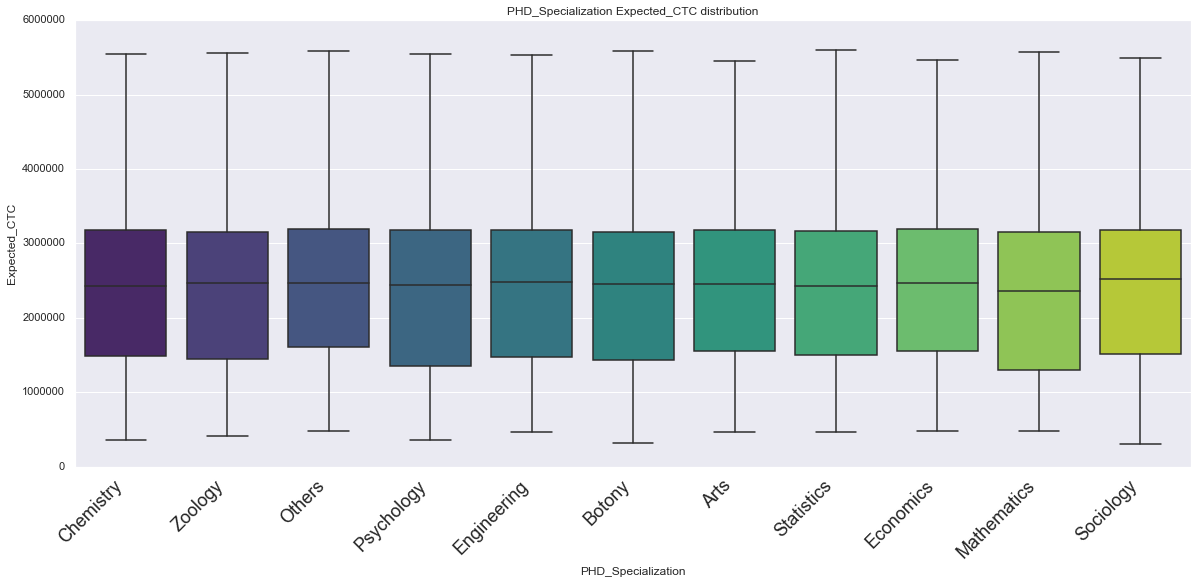

In [140]:
plt.figure(figsize=(20,8))
chart=sns.boxplot(x="PHD_Specialization", y="Expected_CTC", data=df_1, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('PHD_Specialization Expected_CTC distribution')
chart;

**Insights -**

* Expected_CTC doesn't vary based on the PHD_Specialization as expected. This conclusion can only be drawn through the above plot.

* Psychology and Mathematics have wider distribution of box-plot.

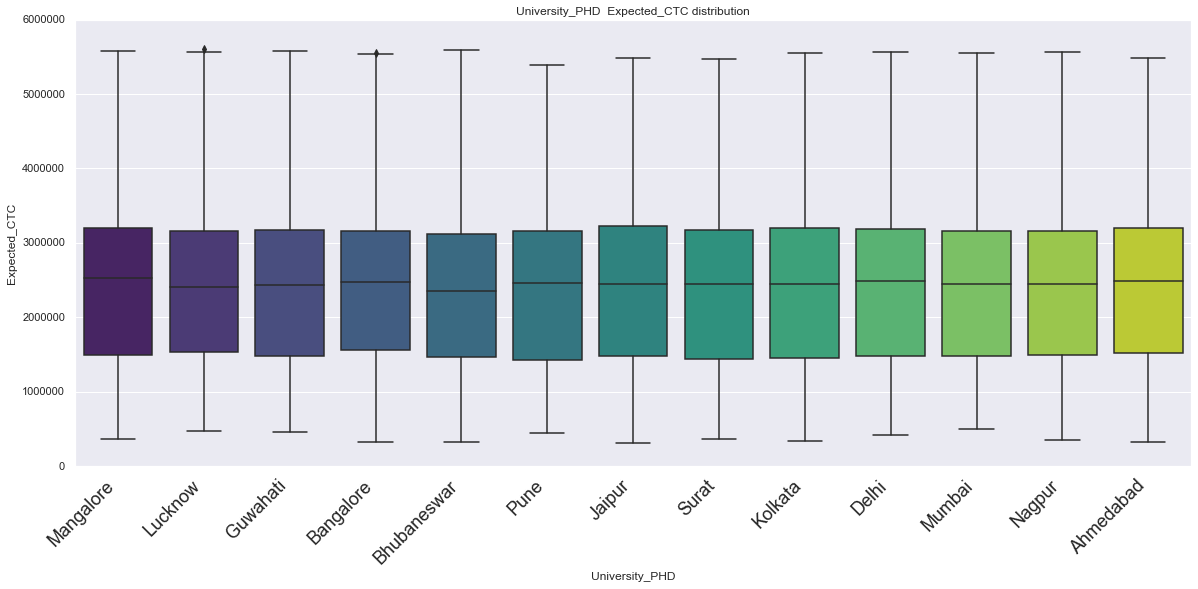

In [141]:
plt.figure(figsize=(20,8))
chart=sns.boxplot(x="University_PHD", y="Expected_CTC", data=df_1, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('University_PHD  Expected_CTC distribution')
chart;

**Insight -**

* There is not any variation in the distribution of Expected_CTC w.r.t. University_PHD  , looks almost similar plus median values are also almost equivalent for all not varies too much.

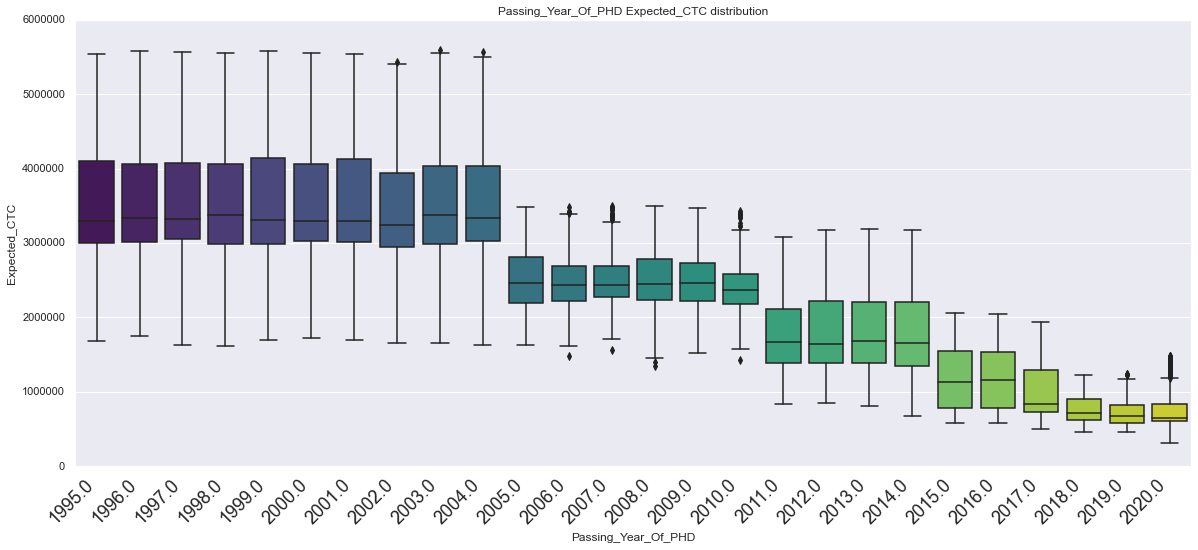

In [142]:
plt.figure(figsize=(20,8))
chart=sns.boxplot(x="Passing_Year_Of_PHD", y="Expected_CTC", data=df_1, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Passing_Year_Of_PHD Expected_CTC distribution')
chart;

**Insights -**

* Expected_CTC does vary based on the Passing_Year_Of_PHD as expected. This conclusion can only be drawn through the above plot.

* We infer that Expected_CTC for recently PhD passed applicants is less than applicants who completed PhD in early 1990s and 2000s.

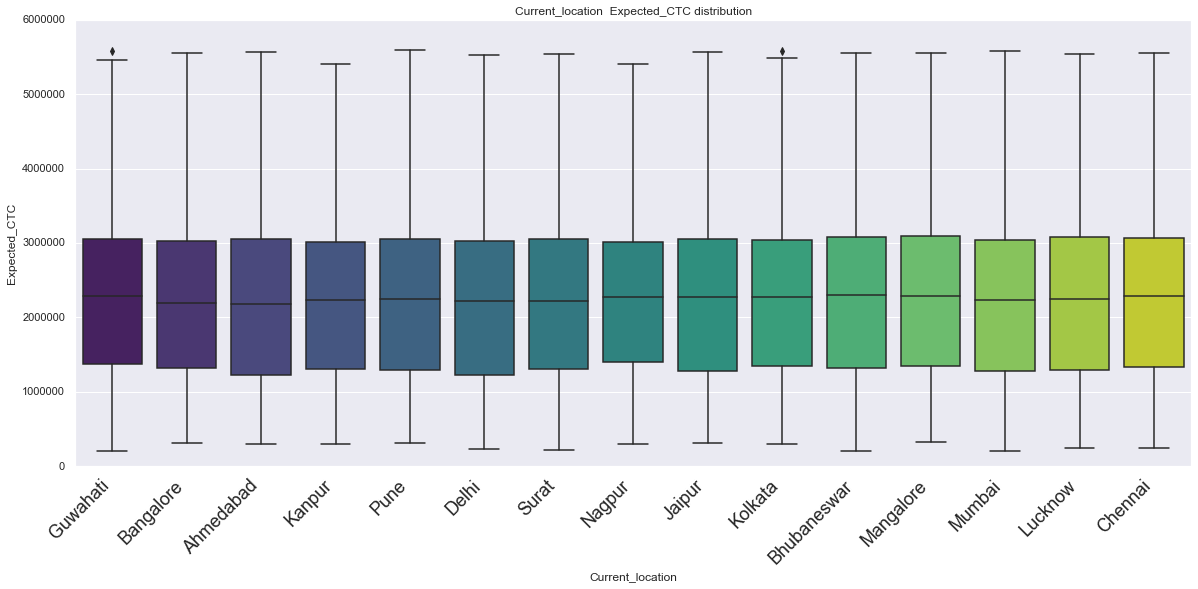

In [143]:
plt.figure(figsize=(20,8))
chart=sns.boxplot(x="Current_location", y="Expected_CTC", data=df_1, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Current_location  Expected_CTC distribution')
chart;

**Insights -**

* There is not any variation in the distribution of Expected_CTC w.r.t.Current_Location  , looks almost similar plus median values are also almost equivalent for all not varies too much.

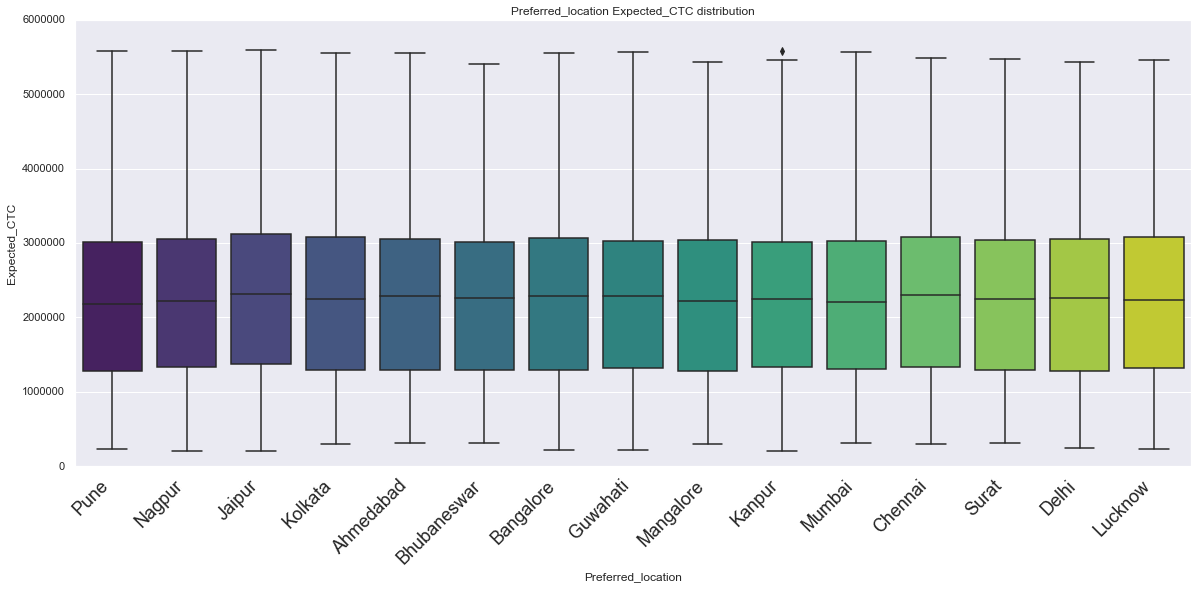

In [144]:
plt.figure(figsize=(20,8))
chart=sns.boxplot(x="Preferred_location", y="Expected_CTC", data=df_1, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Preferred_location Expected_CTC distribution')
chart;

**Insights -**

* There is not any variation in the distribution of Expected_CTC w.r.t. Preferred_location , looks almost similar plus median values are also almost equivalent for all not varies too much.

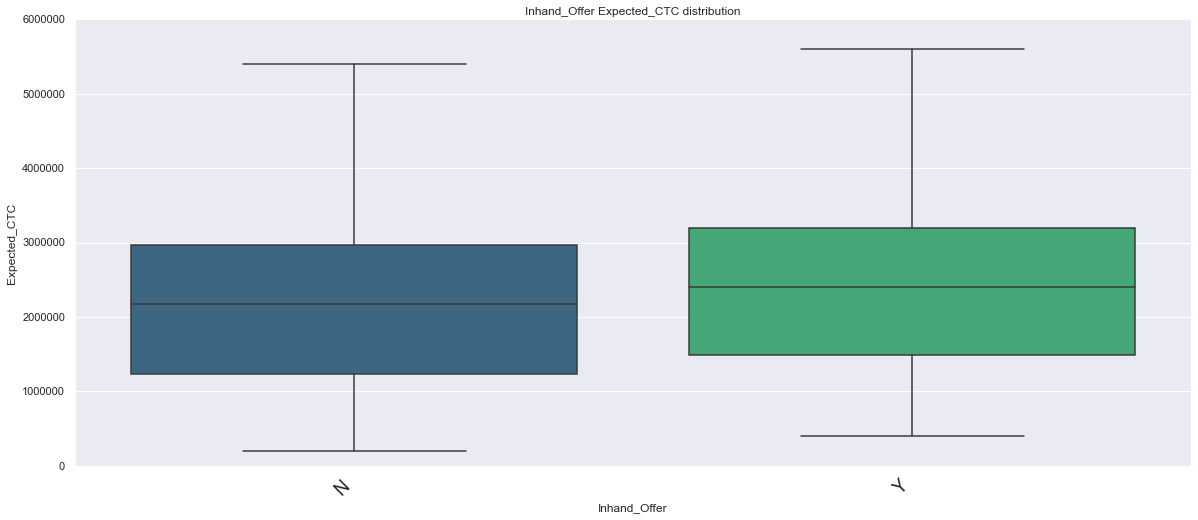

In [145]:
plt.figure(figsize=(20,8))
chart=sns.boxplot(x="Inhand_Offer", y="Expected_CTC", data=df_1, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Inhand_Offer Expected_CTC distribution')
chart;

**Insights -**

* Distribution of Expected_CTC for applicants  who have offer in hand or who don't have offer in hand is almost similar , but median value for applicants who have in hand offer is slightly high.

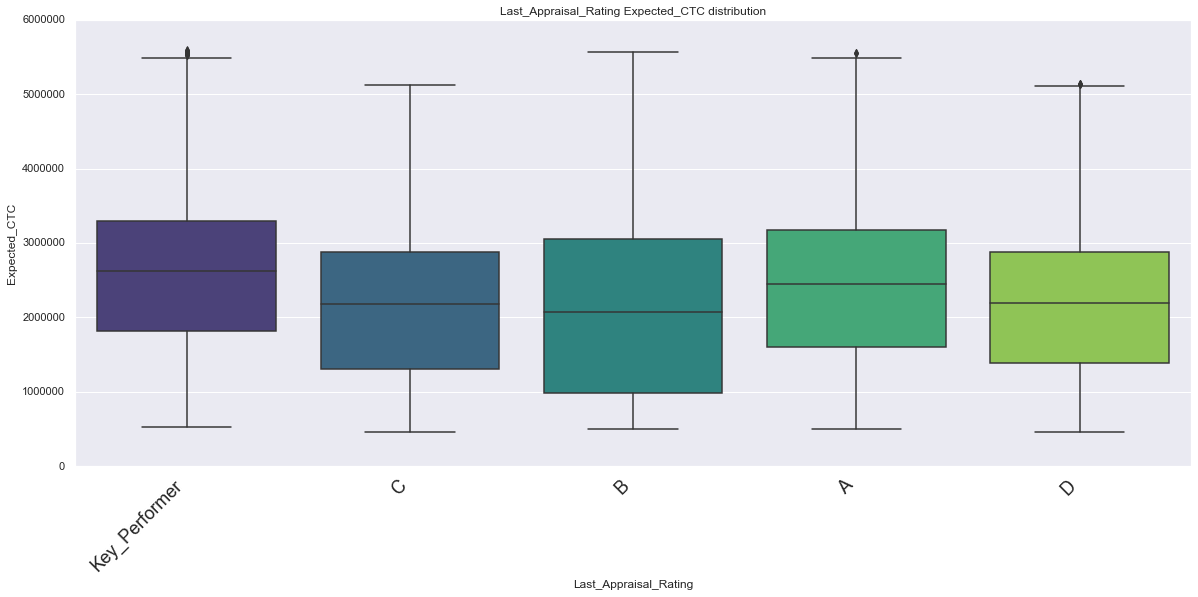

In [146]:
plt.figure(figsize=(20,8))
chart=sns.boxplot(x="Last_Appraisal_Rating", y="Expected_CTC", data=df_1, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Last_Appraisal_Rating Expected_CTC distribution')
chart;

**Insights -**

* Median values for Key_Performers are higher than others.

* There is larger distribution for applicants who have B as Last_Appraisal_Rating.

* Median values for  applicants who have B and D as Last_Appraisal_Rating are almost equivalent.

In [147]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Experience                   25000 non-null  int64  
 1   Total_Experience_in_field_applied  25000 non-null  int64  
 2   Department                         22222 non-null  object 
 3   Role                               24037 non-null  object 
 4   Industry                           24092 non-null  object 
 5   Organization                       24092 non-null  object 
 6   Designation                        21871 non-null  object 
 7   Highest_Education                  25000 non-null  object 
 8   Graduation_Specialization          18820 non-null  object 
 9   University_Grad                    18820 non-null  object 
 10  Passing_Year_Of_Graduation         18820 non-null  float64
 11  PG_Specialization                  17308 non-null  obj

**Multivariate Analysis -**

**Heat-map -**

A correlation heatmap uses colored cells, typically in a monochromatic scale, to show a 2D correlation matrix (table) between two discrete dimensions or event types.Correlation heatmaps are ideal for comparing the measurement for each pair of dimension values.Darker Shades have higher Correlation , while lighter shades have smaller values of Correlation as compared to darker shades values.Correlation values near to 1 or -1 are highly positively correlated and highly negatively correlated respectively. Correlation values near to 0 are not correlated to each other.


In [148]:
df_1.corr().T

Total_Experience  \
Total_Experience                           1.000000   
Total_Experience_in_field_applied          0.645135   
Passing_Year_Of_Graduation                -0.902931   
Passing_Year_Of_PG                        -0.634718   
Passing_Year_Of_PHD                       -1.000000   
Current_CTC                                0.846476   
No_Of_Companies_worked                     0.398135   
Number_of_Publications                    -0.000494   
Certifications                            -0.001130   
International_degree_any                   0.084072   
Expected_CTC                               0.816593   

                                   Total_Experience_in_field_applied  \
Total_Experience                                            0.645135   
Total_Experience_in_field_applied                           1.000000   
Passing_Year_Of_Graduation                                 -0.581495   
Passing_Year_Of_PG                                         -0.410642   
Passing_Year_Of_PHD                                        -0.648457   
Current_CTC                                                 0.548017   
No_Of_Companies_worked                                      0.249045   
Number_of_Publications                                     -0.010663   
Certifications                                             -0.002814   
International_degree_any                                    0.043070   
Expected_CTC                                                0.529115   

                                   Passing_Year_Of_Graduation  \
Total_Experience                                    -0.902931   
Total_Experience_in_field_applied                   -0.581495   
Passing_Year_Of_Graduation                           1.000000   
Passing_Year_Of_PG                                   0.841074   
Passing_Year_Of_PHD                                  0.989101   
Current_CTC                                         -0.778366   
No_Of_Companies_worked                              -0.362545   
Number_of_Publications                              -0.336380   
Certifications                                      -0.030236   
International_degree_any                            -0.085648   
Expected_CTC                                        -0.758694   

                                   Passing_Year_Of_PG  Passing_Year_Of_PHD  \
Total_Experience                            -0.634718            -1.000000   
Total_Experience_in_field_applied           -0.410642            -0.648457   
Passing_Year_Of_Graduation                   0.841074             0.989101   
Passing_Year_Of_PG                           1.000000             0.989101   
Passing_Year_Of_PHD                          0.989101             1.000000   
Current_CTC                                 -0.544691            -0.863459   
No_Of_Companies_worked                      -0.255205            -0.402878   
Number_of_Publications                      -0.491231             0.015752   
Certifications                              -0.026095            -0.015784   
International_degree_any                    -0.066140            -0.083883   
Expected_CTC                                -0.530964            -0.834222   

                                   Current_CTC  No_Of_Companies_worked  \
Total_Experience                      0.846476                0.398135   
Total_Experience_in_field_applied     0.548017                0.249045   
Passing_Year_Of_Graduation           -0.778366               -0.362545   
Passing_Year_Of_PG                   -0.544691               -0.255205   
Passing_Year_Of_PHD                  -0.863459               -0.402878   
Current_CTC                           1.000000                0.379740   
No_Of_Companies_worked                0.379740                1.000000   
Number_of_Publications               -0.006399                0.000608   
Certifications                       -0.143402                0.012990   
International_degree_any              0.078774     

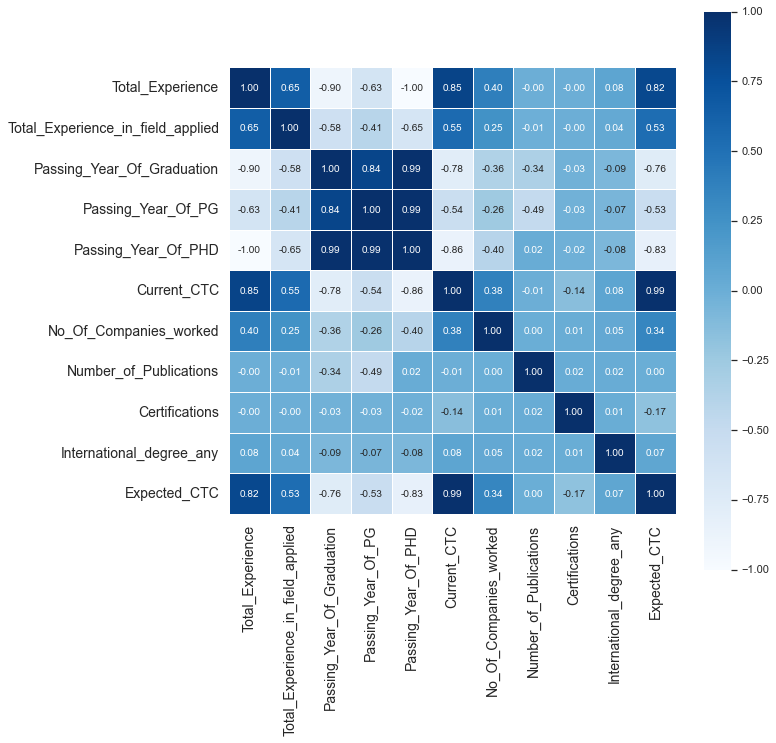

In [149]:
corr=df_1.corr()
plt.figure(figsize=(10,10)) 
sns.heatmap(corr,annot=True,cmap="Blues",linewidth=0.85,square=True,annot_kws={"size":10.10},fmt='.2f')
plt.xticks(fontsize=14)
plt.yticks(size=14)
plt.show()

**Insights -**

* Total_Experience with Current_CTC , Expected_CTC have strong correlation i.e. (0.85 and 0.82).

* Total_Experience with Total_Experience_in_field_applied have correlation i.e. (0.65).

* Total_Experience with Passing_Year_Of_Graduation shows negative correlation i.e.(-0.90).

* Total_Experience with Passing_Year_Of_PG shows negative correlation i.e.(-0.63).

* Total_Experience with No_Of_Companies_worked shows weak correlation i.e.(0.40).

* Total_Experience_in_field_applied	with Expected_CTC shows some correlation i.e. (0.53).

* Passing_Year_Of_Graduation with Expected_CTC  shows negative correlation i.e.(-0.76).

* Passing_Year_Of_PG with Expected_CTC shows negative correlation i.e.(-0.53).

* Passing_Year_Of_PHD with Expected_CTC shows negative correlation i.e.(-0.83).

* Current_CTC with Expected_CTC shows very strong correlation i.e (0.99).

* No_Of_Companies_worked with Expected_CTC shows correlation i.e. (0.34).

* Number_of_Publications with Expected_CTC shows no correlation i.e.(0).

* Certifications with Expected_CTC shows negative correlation i.e. (- 0.17).

* International_degree_any with Expected_CTC shows very weak correlation i.e. (0.07).

* Percentage_Relevant_Exp_in_Field with Expected_CTC shows very weak correlation i.e. - (0.01).

* Total_Experience_in_field_applied with Current_CTC shows correlation i.e.(0.55).

* Passing_Year_Of_Graduation with Passing_Year_Of_PHD shows strong correlation i.e.(0.99).

* Passing_Year_Of_Graduation with Passing_Year_Of_PG shows strong correlation i.e. (0.84).

* Passing_Year_Of_Graduation with Current_CTC and Expected_CTC shows negative correlation i.e. (-0.78 and -0.76).

* Rest as there is no issues of strong multi-collinearity only few features have strong correlation other  independent feature we can select out them which suits best as per domain.

**Pair-plot -**

Pair-plot shows the relationship between the variables in the form of scatter-plot and the distribution of the variable in the form of histogram.

<Figure size 1440x1440 with 0 Axes>

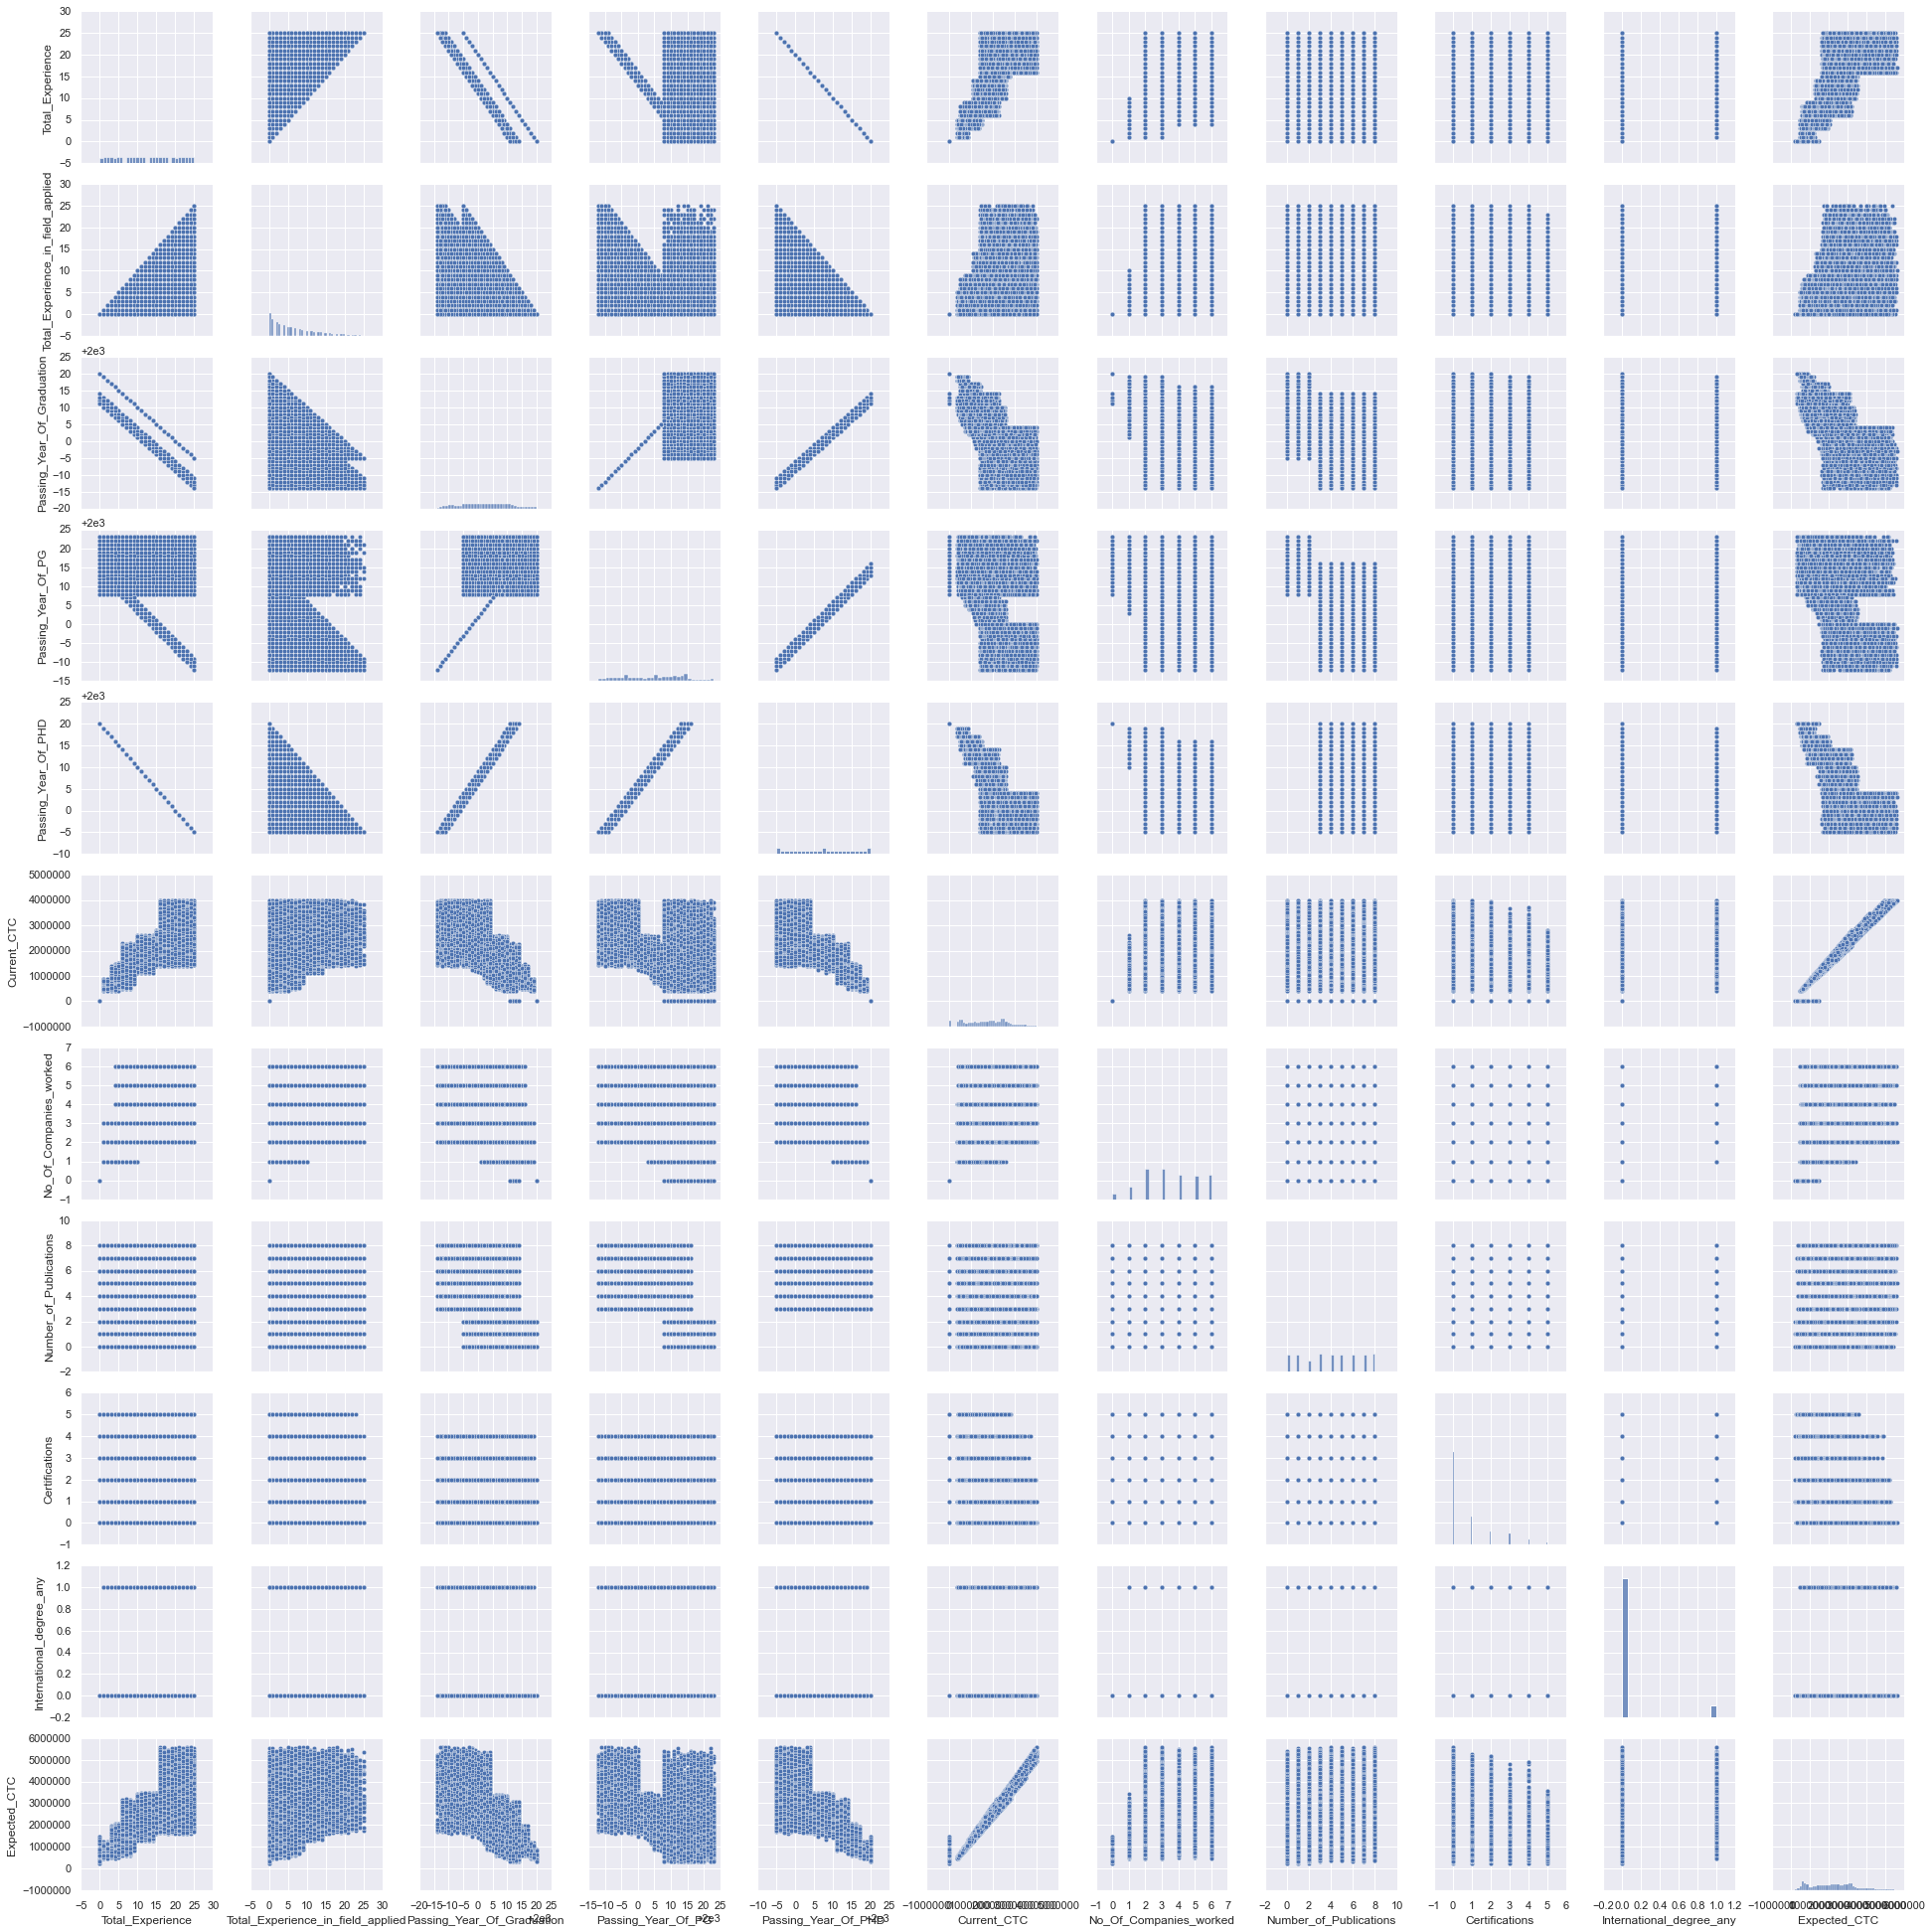

In [150]:
plt.figure(figsize=(20,20)) 
sns.pairplot(df_1)
plt.show()

**Insights -**

* From the above plot we see that the Total_Experience and the Expected_CTC is showing a strong relationship,with increase in Total_Experience(Independent Variable),Expected_CTC (Target Variable)is also increases.

* From the above plot we see that the Total_Experience_in_field_applied and the Expected_CTC is showing a some relationship,with increase in Total_Experience_in_field_applied(Independent Variable),Expected_CTC (Target Variable)is slightly increases.

* From the above plot we see that the Passing_Year_Of_Graduation and the Expected_CTC is showing a some relationship, as the Passing_Year_Of_Graduation increases the Expected_CTC goes on decreases.

* There is no specific relation between Passing_Year_Of_PG and Expected_CTC.

* From the above plot we see that the Passing_Year_Of_PHD and the Expected_CTC is showing a negative relationship, as the Passing_Year_Of_PHD increases the Expected_CTC goes on decreases.

* From the above plot we see that the Current_CTC and the Expected_CTC is showing a strong relationship, as the Current_CTC increases the Expected_CTC goes on increases.

* From the above plot we infer that there is some sort of relation between No_Of_Companies_worked and Expected_CTC.As No_Of_Companies_worked increase there is also some increase in Expected_CTC.

* There is no such relationship between Number_of_Publications and Expected_CTC.From the above visual we infer there is not any kind of impact of Number_of_Publications on Expected_CTC.Expected_CTC is somehow equivalent for all who have less or more Number_of_Publications.

* From the above plot we see that the Percentage_Relevant_Exp_in_Field and the Expected_CTC is showing a no relationship as all the data-points are scatter over plane.


**Checking for Outliers in the dataset -**

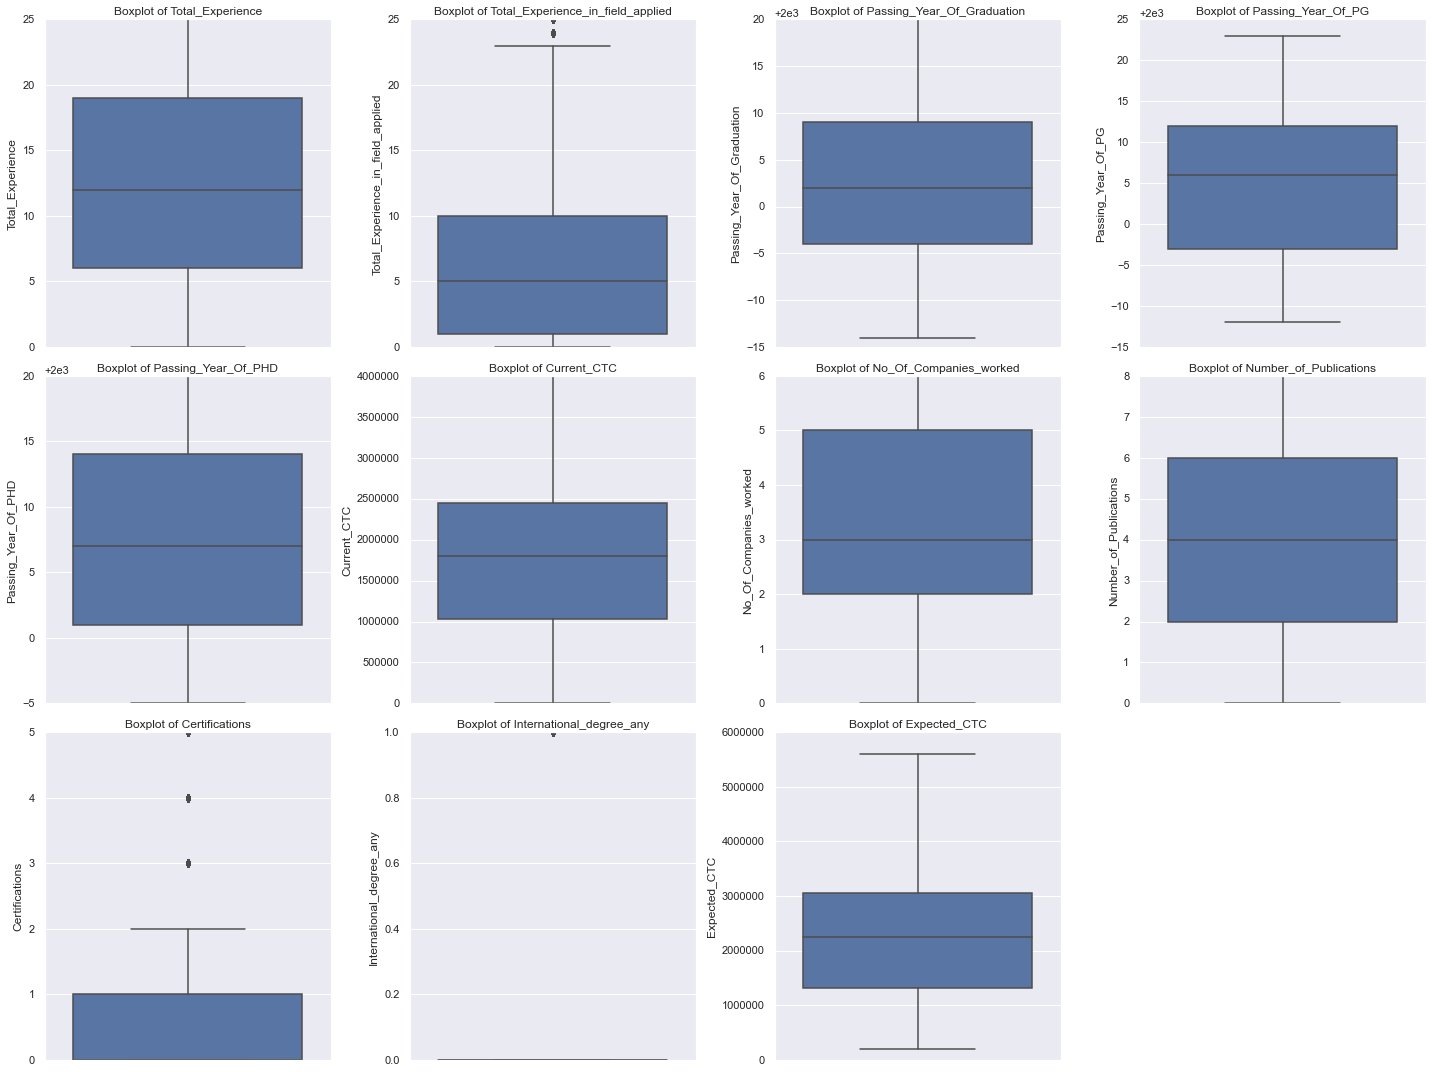

In [151]:
plt.figure(figsize= (20,15))
feature_list = df_1.dtypes[(df_1.dtypes!='object')].index
for i in range (len(feature_list)):
    plt.subplot(3,4 ,i+1)
    sns.boxplot(y= df_1[feature_list[i]],data=df_1)
    plt.title("Boxplot of {}".format(feature_list[i]))
    plt.tight_layout()

**Insights -**

* Looking at the box plot, it seems that the only Total_Experience_in_field_applied , Certifications and International_degree_any variables have afew outliers , others don't have outliers.

**Conclusion -**

An observation is considered to be an outlier if that particular has been mistakenly captured in the data set. Treating outliers sometimes results in the models having better performance but the models lose out on the generalization. So, a good way to approach this would be to build models with and without treating outliers and then report the results. So we are only check the outliers but not treat them as per context of the problem given.

**Missing Values Treatment -**

In [152]:
df_1.isnull().sum()

Total_Experience                         0
Total_Experience_in_field_applied        0
Department                            2778
Role                                   963
Industry                               908
Organization                           908
Designation                           3129
Highest_Education                        0
Graduation_Specialization             6180
University_Grad                       6180
Passing_Year_Of_Graduation            6180
PG_Specialization                     7692
University_PG                         7692
Passing_Year_Of_PG                    7692
PHD_Specialization                   11881
University_PHD                       11881
Passing_Year_Of_PHD                  11881
Current_location                         0
Preferred_location                       0
Current_CTC                              0
Inhand_Offer                             0
Last_Appraisal_Rating                  908
No_Of_Companies_worked                   0
Number_of_P

**Null Values % Present in Dataset -**

In [153]:
null_percent=df_1.isnull().sum()/df_1.shape[0]
null_percent*100
print(null_percent)

Total_Experience                     0.00000
Total_Experience_in_field_applied    0.00000
Department                           0.11112
Role                                 0.03852
Industry                             0.03632
Organization                         0.03632
Designation                          0.12516
Highest_Education                    0.00000
Graduation_Specialization            0.24720
University_Grad                      0.24720
Passing_Year_Of_Graduation           0.24720
PG_Specialization                    0.30768
University_PG                        0.30768
Passing_Year_Of_PG                   0.30768
PHD_Specialization                   0.47524
University_PHD                       0.47524
Passing_Year_Of_PHD                  0.47524
Current_location                     0.00000
Preferred_location                   0.00000
Current_CTC                          0.00000
Inhand_Offer                         0.00000
Last_Appraisal_Rating                0.03632
No_Of_Comp

**Observation  -** 

* By looking at the above results we found that Graduation_Specialization , University_Grad and Passing_Year_Of_Graduation have same number of missing values (6180) which indicates that there is data is missed.

* By looking at the above results we found that PG_Specialization , University_PG and Passing_Year_Of_PG have same number of missing values (7692) which indicates that there is data is missed or these applicants didn't have PG education.

* By looking at the above results we found that PHD_Specialization , University_PHD and Passing_Year_Of_PHD have same number of missing values (11881) which indicates that there is data is missed or these applicants didn't have PG education.

* By looking at the above results we found that Industry and Organization have same number of missing values (908) which indicates that the for these applicants in terms of Industry and Organization is data is unknown.

* Role & Department also have null values which indicates that for these applicants data is also unknown.

**Practice -** 

For numerical features we will going impute Passing_Year_Of_Graduation with meadian and for Passing_Year_Of_PG and Passing_Year_Of_PHD we impute the missing values with 0 by using fillna( ) function as these applicants might not have PG / PHD education.

For categorical features we are going to use fillna ( ) function  and impute unknown label in place of null values as data is given , so it be good practice.Beacuse in note 2/milestone when we encode them  for model builindg it will be easy to club them or encode them by using target encoding or mean encoding method.

**Missing Value Treatment of Categorical Features -**


In [154]:
df_1["Department"].fillna("unknown",inplace=True)

In [155]:
df_1["Department"].isna().sum()

0

In [156]:
df_1["Department"].value_counts()

unknown           2778
Marketing         2379
Analytics/BI      2096
Healthcare        2062
Others            2041
Sales             1991
HR                1988
Banking           1952
Education         1948
Engineering       1937
Top Management    1632
Accounts          1118
IT-Software       1078
Name: Department, dtype: int64

In [157]:
df_1["Role"].fillna("unknown",inplace=True)

In [158]:
df_1["Role"].isna().sum()

0

In [159]:
df_1["Role"].value_counts()

Others                  2248
Bio statistician        1913
Analyst                 1892
Project Manager         1850
Team Lead               1833
Consultant              1780
Business Analyst        1711
Sales Execituve         1574
Sales Manager           1427
Senior Researcher       1236
Financial Analyst       1182
CEO                     1149
Scientist               1139
Head                    1108
unknown                  963
Associate                767
Data scientist           363
Principal Analyst        275
Area Sales Manager       134
Senior Analyst           128
Researcher               123
Sr. Business Analyst     114
Research Scientist        33
Professor                 33
Lab Executuve             25
Name: Role, dtype: int64

In [160]:
df_1["Industry"].fillna("unknown",inplace=True)

In [161]:
df_1["Industry"].isna().sum()

0

In [162]:
df_1["Industry"].value_counts()

Training      2237
IT            2228
Insurance     2219
BFSI          2207
Automobile    2202
Analytics     2201
Retail        2195
Telecom       2190
Aviation      2183
FMCG          2180
Others        2050
unknown        908
Name: Industry, dtype: int64

In [163]:
df_1["Organization"].fillna("unknown",inplace=True)

In [164]:
df_1["Organization"].isna().sum()

0

In [165]:
df_1["Organization"].value_counts()

M          1574
J          1555
P          1542
H          1532
A          1526
F          1505
G          1504
K          1503
I          1489
E          1488
B          1488
L          1484
C          1482
N          1476
D          1474
O          1470
unknown     908
Name: Organization, dtype: int64

In [166]:
df_1["Designation"].fillna("unknown",inplace=True)

In [167]:
df_1["Designation"].isna().sum()

0

In [168]:
df_1["Designation"].value_counts()

unknown               3129
HR                    1648
Others                1647
Manager               1628
Product Manager       1626
Sr.Manager            1617
Consultant            1606
Assistant Manager     1590
Marketing Manager     1590
Data Analyst          1575
Research Analyst      1563
Medical Officer       1047
Software Developer     914
Web Designer           882
Network Engineer       862
Director               772
CA                     715
Research Scientist     537
Scientist               52
Name: Designation, dtype: int64

In [169]:
df_1["Graduation_Specialization"].fillna("unknown",inplace=True)

In [170]:
df_1["Graduation_Specialization"].isna().sum()

0

In [171]:
df_1["Graduation_Specialization"].value_counts()

unknown        6180
Chemistry      1785
Economics      1774
Mathematics    1770
Zoology        1730
Arts           1721
Psychology     1705
Sociology      1697
Botony         1674
Engineering    1661
Others         1660
Statistics     1643
Name: Graduation_Specialization, dtype: int64

In [172]:
df_1["University_Grad"].fillna("unknown",inplace=True)

In [173]:
df_1["University_Grad"].isna().sum()

0

In [174]:
df_1["University_Grad"].value_counts()

unknown        6180
Bhubaneswar    1510
Delhi          1492
Mangalore      1490
Mumbai         1488
Jaipur         1478
Lucknow        1457
Guwahati       1449
Pune           1428
Kolkata        1426
Surat          1424
Nagpur         1420
Bangalore      1394
Ahmedabad      1364
Name: University_Grad, dtype: int64

In [175]:
df_1["PG_Specialization"].fillna("unknown",inplace=True)

In [176]:
df_1["PG_Specialization"].isna().sum()

0

In [177]:
df_1["PG_Specialization"].value_counts()

unknown        7692
Mathematics    1800
Chemistry      1796
Economics      1755
Engineering    1674
Statistics     1639
Others         1629
Psychology     1425
Zoology        1424
Arts           1410
Sociology      1385
Botony         1371
Name: PG_Specialization, dtype: int64

In [178]:
df_1["University_PG"].fillna("unknown",inplace=True)

In [179]:
df_1["University_PG"].isna().sum()

0

In [180]:
df_1["University_PG"].value_counts()

unknown        7692
Bhubaneswar    1377
Delhi          1368
Mangalore      1367
Mumbai         1366
Jaipur         1359
Guwahati       1340
Surat          1329
Lucknow        1328
Pune           1314
Nagpur         1313
Kolkata        1306
Bangalore      1287
Ahmedabad      1254
Name: University_PG, dtype: int64

In [181]:
df_1["PHD_Specialization"].fillna("unknown",inplace=True)

In [182]:
df_1["PHD_Specialization"].isna().sum()

0

In [183]:
df_1["PHD_Specialization"].value_counts()

unknown        11881
Others          1545
Chemistry       1458
Mathematics     1378
Economics       1343
Engineering     1259
Statistics      1236
Zoology         1011
Sociology        989
Psychology       986
Botony           976
Arts             938
Name: PHD_Specialization, dtype: int64

In [184]:
df_1["University_PHD"].fillna("unknown",inplace=True)

In [185]:
df_1["University_PHD"].isna().sum()

0

In [186]:
df_1["University_PHD"].value_counts()

unknown        11881
Kolkata         1069
Delhi           1064
Mumbai          1046
Guwahati        1030
Pune            1011
Surat           1009
Jaipur           998
Lucknow          995
Bangalore        994
Bhubaneswar      992
Mangalore        988
Nagpur           964
Ahmedabad        959
Name: University_PHD, dtype: int64

In [187]:
df_1["Last_Appraisal_Rating"].fillna("unknown",inplace=True)

In [188]:
df_1["Last_Appraisal_Rating"].isna().sum()

0

In [189]:
df_1["Last_Appraisal_Rating"].value_counts()

B                5501
D                4917
C                4812
A                4671
Key_Performer    4191
unknown           908
Name: Last_Appraisal_Rating, dtype: int64

**Missing Value Treatment for Numerical Features -**

In [190]:
df_1["Passing_Year_Of_Graduation"].fillna(df_1["Passing_Year_Of_Graduation"].median(),inplace=True)

In [191]:
df_1["Passing_Year_Of_Graduation"].isna().sum()

0

In [192]:
df_1["Passing_Year_Of_PG"].fillna(0,inplace=True)

In [193]:
df_1["Passing_Year_Of_PG"].isna().sum()

0

In [194]:
df_1["Passing_Year_Of_PG"].unique()

array([   0., 1990., 1992., 1999., 2006., 2000., 2013., 2005., 2002.,
       2014., 2004., 2009., 2017., 2001., 1995., 2011., 1991., 1993.,
       2003., 2007., 2010., 1994., 2020., 2016., 1998., 2012., 2022.,
       1988., 2019., 2018., 1997., 2008., 2015., 1989., 2021., 1996.,
       2023.])

In [195]:
df_1["Passing_Year_Of_PHD"].fillna(0,inplace=True)

In [196]:
df_1["Passing_Year_Of_PHD"].isna().sum()

0

In [197]:
df_1["Passing_Year_Of_PG"].unique()

array([   0., 1990., 1992., 1999., 2006., 2000., 2013., 2005., 2002.,
       2014., 2004., 2009., 2017., 2001., 1995., 2011., 1991., 1993.,
       2003., 2007., 2010., 1994., 2020., 2016., 1998., 2012., 2022.,
       1988., 2019., 2018., 1997., 2008., 2015., 1989., 2021., 1996.,
       2023.])

In [198]:
df_1.isna().sum()

Total_Experience                     0
Total_Experience_in_field_applied    0
Department                           0
Role                                 0
Industry                             0
Organization                         0
Designation                          0
Highest_Education                    0
Graduation_Specialization            0
University_Grad                      0
Passing_Year_Of_Graduation           0
PG_Specialization                    0
University_PG                        0
Passing_Year_Of_PG                   0
PHD_Specialization                   0
University_PHD                       0
Passing_Year_Of_PHD                  0
Current_location                     0
Preferred_location                   0
Current_CTC                          0
Inhand_Offer                         0
Last_Appraisal_Rating                0
No_Of_Companies_worked               0
Number_of_Publications               0
Certifications                       0
International_degree_any 

In [199]:
null_check_table_after_imputation = [['S.No.','Features / Columns','Null Count'],
              [1,'Total_Experience' ,0],
              [2,'Total_Experience_in_field_applied' ,0],
              [3,'Department',0],
              [4,'Role',0],     
              [5,'Industry' ,0],
              [6,'Organization' ,0],
              [7,'Designation' ,0],
              [8,'Highest_Education' ,0],
              [9,'Graduation_Specialization' ,0],
              [10,'University_Grad' ,0],
              [11,'Passing_Year_Of_Graduation' ,0],
              [12,'PG_Specialization' ,0],
              [13,'University_PG' ,0],
              [14,'Passing_Year_Of_PG' ,0],
              [15,'PHD_Specialization ' ,0],
              [16,'University_PHD' ,0],
              [17,'Passing_Year_Of_PHD' ,0],
              [18,'Current_location' ,0],
              [19,'Preferred_location' ,0],
              [20,'Current_CTC' ,0],
              [21,'Inhand_Offer' ,0],
              [22,'Last_Appraisal_Rating' ,0],
              [23,'No_Of_Companies_worked' ,0],
              [24,'Number_of_Publications' ,0],
              [25,'Certifications' ,0],
              [26,'International_degree_any' ,0],
              [27,'Expected_CTC',0]]
fig = ff.create_table(null_check_table_after_imputation)
fig.show()

**Conclusion -** 

* We successfully imputed all the null values present in the dataset with suitable values as per the context of the business problem. Now we  don't have any null values in the dataset.

**Feature Selection- Based on Correlation - For Numerical Feature.**

In [200]:
X = df_1.drop("Expected_CTC",axis=1)   #Feature Matrix
y = df_1["Expected_CTC"] 

In [201]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((17500, 26), (7500, 26))

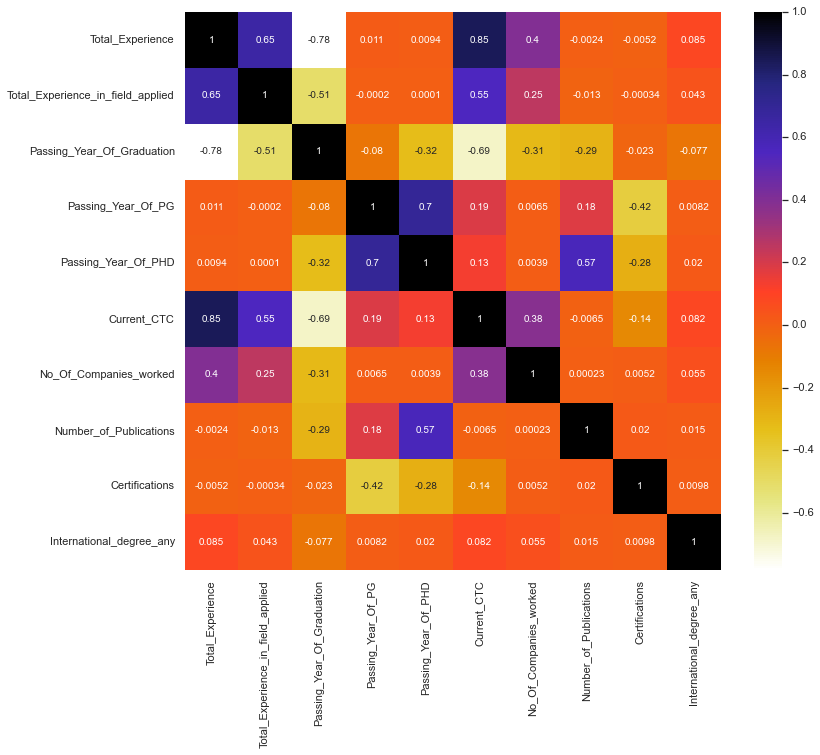

In [202]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [203]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [204]:
corr_features = correlation(X_train, 0.60)
len(set(corr_features))

4

In [205]:
corr_features

{'Current_CTC',
 'Passing_Year_Of_Graduation',
 'Passing_Year_Of_PHD',
 'Total_Experience_in_field_applied'}

**Observations-**

On the basis of Pearson's Correaltion Feature Selection method , we come know that these 4 features are correlated with each other so we can remove them or comapre with the variables with which they are correlated and drop as per the context of business / domain knowledge.By this method we come know that about the Multicollinearity aslo , so we can drop those feature which are highly correlated.This is our basic approach for feature selection rest in next milestone when we going to built linear regression model then by using p-value of ols summary we can pick features also or we can use another sklearn automatic fuctions for feature selection for model building in next phase of the project. Till now we used this as we did not built our base model yet beacuse in this excercise we just need to explore data do pre-processing , do some treatment of missing values and visualization for getting the insights.

**Feature Selection - For Categorical Feature**

From the boxplot visuals we saw that many of the categorical feature like Industry , Organization , Graduation_Specialization ,University_Grad ,PG_Specialization , University_PG ,PHD_Specialization , University_PHD ,Current_location , and Preferred_location as these  features  is not any variation  w.r.t. Expected_CTC , looks almost similar plus median values are also almost equivalent for all not varies too much.So these features may be not suitable for model building.This is our basic approach for feature selection rest in next milestone when we going to built linear regression model then by using p-value of ols summary we can pick features also or we can use another sklearn automatic fuctions for feature selection for model building in next phase of the project. Till now we used this as we did not built our base model yet beacuse in this excercise we just need to explore data do pre-processing , do some treatment of missing values and visualization for getting the insights.

**Outlier treatment -**

An observation is considered to be an outlier if that particular has been mistakenly captured in the data set. Treating outliers sometimes results in the models having better performance but the models lose out on the generalization. So, a good way to approach this would be to build models with and without treating outliers and then report the results. So we are only check the outliers but not treat them as per context of the problem given.

**Variable transformation -**

As we saw in the skewness table that our target column Expected_CTC columns have skewness value - 0.33 and by looking at the histogram and boxplot we also found it is almost normal distributed.So right now we make an assumption that data is normal. Once we build the first model and check its performance if anything is needed then we go for transformation.

**Featuring Engineering Addition of new variables -**

Yes , we made a new feature also named as Percentage_Relevant_Exp_in_Field ( df_1["Percentage_Relevant_Exp_in_Field"]=round(df_1["Total_Experience_in_field_applied"]/df_1["Total_Experience"]*100) ) but this feature is not impacting too much as per heatmap / correaltion.So,when we build our linear regression model check its p-value if it is not worthy we can drop it.

In [206]:
df_1["Percentage_Relevant_Exp_in_Field"]=round(df_1["Total_Experience_in_field_applied"]/df_1["Total_Experience"]*100)

In [207]:
df_1.head()

Total_Experience  Total_Experience_in_field_applied      Department  \
0                 0                                  0         unknown   
1                23                                 14              HR   
2                21                                 12  Top Management   
3                15                                  8         Banking   
4                10                                  5           Sales   

                Role   Industry Organization      Designation  \
0            unknown    unknown      unknown          unknown   
1         Consultant  Analytics            H               HR   
2         Consultant   Training            J          unknown   
3  Financial Analyst   Aviation            F               HR   
4    Project Manager  Insurance            E  Medical Officer   

  Highest_Education Graduation_Specialization University_Grad  \
0                PG                      Arts         Lucknow   
1         Doctorate                 Chemistry           Surat   
2         Doctorate                   Zoology          Jaipur   
3         Doctorate                    Others       Bangalore   
4              Grad                   Zoology          Mumbai   

   Passing_Year_Of_Graduation PG_Specialization University_PG  \
0                      2020.0           unknown       unknown   
1                      1988.0            Others         Surat   
2                      1990.0           Zoology        Jaipur   
3                      1997.0           Zoology     Bangalore   
4                      2004.0           Zoology        Mumbai   

   Passing_Year_Of_PG PHD_Specialization University_PHD  Passing_Year_Of_PHD  \
0                 0.0            unknown        unknown                  0.0   
1              1990.0          Chemistry      Mangalore               1997.0   
2              1992.0            Zoology        Lucknow               1999.0   
3              1999.0          Chemistry       Guwahati               2005.0   
4              2006.0            Zoology      Bangalore               2010.0   

  Current_location Preferred_location  Current_CTC Inhand_Offer  \
0         Guwahati               Pune            0            N   
1        Bangalore             Nagpur      2702664            Y   
2        Ahmedabad             Jaipur      2236661            Y   
3           Kanpur            Kolkata      2100510            N   
4        Ahmedabad          Ahmedabad      1931644            N   

  Last_Appraisal_Rating  No_Of_Companies_worked  Number_of_Publications  \
0               unknown                       0                       0   
1         Key_Performer                       2                       4   
2         Key_Performer                       5                       3   
3                     C                       5                       3   
4                     C                       2                       3   

   Certifications  International_degree_any  Expected_CTC  \
0               0                         0        384551   
1               0                         0       3783729   
2               0                         0       3131325   
3               0                         0       2608833   
4               0                         0       2221390   

   Percentage_Relevant_Exp_in_Field  
0                               NaN  
1                              61.0  
2                              57.0  
3                              53.0  
4                              50.0

In [208]:
df_1["Percentage_Relevant_Exp_in_Field"].isna().sum()

908

In [209]:
df_1["Percentage_Relevant_Exp_in_Field"].fillna(0,inplace=True)

In [210]:
df_1["Percentage_Relevant_Exp_in_Field"].isna().sum()

0

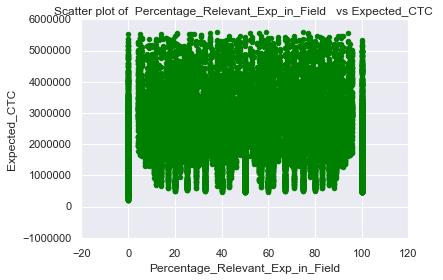

In [211]:
plt.scatter(df_1["Percentage_Relevant_Exp_in_Field"],df_1['Expected_CTC'],color="green")
plt.title("Scatter plot of  Percentage_Relevant_Exp_in_Field   vs Expected_CTC ")
plt.xlabel("Percentage_Relevant_Exp_in_Field")
plt.ylabel("Expected_CTC")
plt.tight_layout()
plt.show()

**Insights -**

From the above plot we see that the Percentage_Relevant_Exp_in_Field and the Expected_CTC is showing a no relationship as all the data-points are scatter over plane.

**Is the data unbalanced? If so, what can be done? Please explain in the context of the business -**

No , there is no data unbalanced problem as we predicting the expected_ctc for applicants being a regression problem our target column is continous doesnot have class so in the this probelm we donot have any data unblaced problem.

**Business insights -**

* Most of applicants are of Marketing Department (2379) ,Analytics/BI (2096) , Health-care (2062 ) and others (2041).

* Less applicants belongs to IT-Software Department(1078).

* Only 25 applicants worked as Lab executive (Role).

* Majority of applicants worked in Training Industry.

* There is not too much variations in the Organization columns equivalent number of applicants worked in 16 different organization.

* Majority of applicants worked as HR i.e.(1648).

* Only 52 applicants worked as Scientist.

* 6180 applicants are Under Graduate.

* 6209 applicants are Graduate.

* 6326 applicants are Post Graduate.

* 6285 applicants are Doctorate.

* Highest number of applicants did their graduation specialization in chemistry.

* Most of applicants did their graduation from Bhubaneswar University (1510) and Delhi University(1492).

* Most of applicants did their post-graduation specialization in mathematics (1800) and chemistry (1796).

* Most of applicants did their post-graduation from Bhubaneswar University (1510) and Delhi University(1492).

* Most of applicants did their PhD specialization in others (1545) and chemistry (1458).

* Most of applicants did their PhD from Kolkata University (1069) and Delhi University(1064).

* Most of applicant's current location is Bangalore i.e.(1742) but preferred location is Kanpur i.e.(1720).In current location banglore is on top but for preferred location bangalore is at last number.

* 17418 applicants don't have In-hand job offer while 7582 applicants have In-hand job offer.

* 4191 applicants Last_Appraisal_Rating is Key_Performer  while 4671 applicants Last_Appraisal_Rating is A ,5501 applicants Last_Appraisal_Rating is B. , 4812 applicants Last_Appraisal_Rating is C. , 4917 applicants Last_Appraisal_Rating is D.

* Total_Experience and the Expected_CTC is showing a strong relationship,with increase in Total_Experience(Independent Variable),Expected_CTC (Target Variable)is also increases.

* Total_Experience_in_field_applied and the Expected_CTC is showing a positive relationship,with increase in Total_Experience_in_field_applied(Independent Variable),Expected_CTC (Target Variable)is slightly increases.

* Passing_Year_Of_Graduation and the Expected_CTC is showing a negative relationship, as the Passing_Year_Of_Graduation increases the Expected_CTC goes on decreases.

* Passing_Year_Of_PHD and the Expected_CTC is showing a negative relationship, as the Passing_Year_Of_PHD increases the Expected_CTC goes on decreases.

* Current_CTC and the Expected_CTC is showing a positive relationship, as the Current_CTC increases the Expected_CTC goes on increases.

* No_Of_Companies_worked and Expected_CTC.As No_Of_Companies_worked increase there is also some increase in Expected_CTC.

* Applicants for Top Management have higher median value than others for Expected_CTC.

* Median values of CEO and Research Scientists for Expected_CTC are quite high as compared to others but distribution is wider for Research Scientists.

* Median values of Research Scientists for Expected_CTC are quite high as compared to others.

* Marketing Manger , Manager ,Product Manager and HR almost have equivalent median values for Expected_CTC.

* Similarly Data Analyst , Assistant Manger , Others , Web Designers and Research Analyst have equivalent median values for Expected_CTC.

* Box-plot of Doctorate have higher median values for Expected_CTC as compared to others.

* Under Grad Box-plot have lowest median values for Expected_CTC.

* We infer that Expected_CTC for recently graduated applicants is least as compared to others.

* Expected_CTC w.r.t Passing_Year_Of_PG , early 1990s applicants have high median for Expected_CTC , then in 20s there is some fall which keeps on increasing by each year passed , this variation may be caused as some of them unable to complete their PG in specific 2 year span or unable to complete their PG by any reasons.

* Expected_CTC for recently PhD passed applicants is less than applicants who completed PhD in early 1990s and 2000s.

* Median values for Key_Performers are higher than others.

**Note-2-Model Building**

**Checking the Records of the Dataset.**

In [212]:
df_1.head(10) #Head of the Dataset - First 10 Records of the Dataset.

Total_Experience  Total_Experience_in_field_applied      Department  \
0                 0                                  0         unknown   
1                23                                 14              HR   
2                21                                 12  Top Management   
3                15                                  8         Banking   
4                10                                  5           Sales   
5                16                                  3  Top Management   
6                 1                                  1     Engineering   
7                19                                 11          Others   
8                 8                                  7    Analytics/BI   
9                15                                 15    Analytics/BI   

                 Role   Industry Organization        Designation  \
0             unknown    unknown      unknown            unknown   
1          Consultant  Analytics            H                 HR   
2          Consultant   Training            J            unknown   
3   Financial Analyst   Aviation            F                 HR   
4     Project Manager  Insurance            E    Medical Officer   
5  Area Sales Manager     Retail            G           Director   
6           Team Lead       FMCG            L  Marketing Manager   
7             Analyst     Others            E            Manager   
8              Others    Telecom            L  Marketing Manager   
9                 CEO    Telecom            M    Product Manager   

  Highest_Education Graduation_Specialization University_Grad  \
0                PG                      Arts         Lucknow   
1         Doctorate                 Chemistry           Surat   
2         Doctorate                   Zoology          Jaipur   
3         Doctorate                    Others       Bangalore   
4              Grad                   Zoology          Mumbai   
5         Doctorate                    Others       Bangalore   
6              Grad                 Chemistry           Delhi   
7                PG                 Sociology           Delhi   
8         Doctorate                Psychology          Mumbai   
9         Doctorate                 Chemistry           Delhi   

   Passing_Year_Of_Graduation PG_Specialization University_PG  \
0                      2020.0           unknown       unknown   
1                      1988.0            Others         Surat   
2                      1990.0           Zoology        Jaipur   
3                      1997.0           Zoology     Bangalore   
4                      2004.0           Zoology        Mumbai   
5                      1998.0           Zoology     Bangalore   
6                      2011.0         Chemistry         Delhi   
7                      2001.0           unknown       unknown   
8                      2003.0        Psychology        Mumbai   
9                      1998.0         Chemistry         Delhi   

   Passing_Year_Of_PG PHD_Specialization University_PHD  Passing_Year_Of_PHD  \
0                 0.0            unknown        unknown                  0.0   
1              1990.0          Chemistry      Mangalore               1997.0   
2              1992.0            Zoology        Lucknow               1999.0   
3              1999.0          Chemistry       Guwahati               2005.0   
4              2006.0            Zoology      Bangalore               2010.0   
5              2000.0             Others    Bhubaneswar               2004.0   
6              2013.0          Chemistry      Mangalore               2019.0   
7                 0.0            unknown        unknown                  0.0   
8              2005.0         Psychology           Pune               2012.0   
9              2000.0          Chemistry         Jaipur               2005.0   

  Current_location Preferred_location  Current_CTC Inhand_Offer  \
0         Guwahati               Pune            0         

In [213]:
df_1.tail(10) #Tail of the Dataset - Last 10 Rows of the Dataset.

Total_Experience  Total_Experience_in_field_applied      Department  \
24990                22                                  1  Top Management   
24991                 1                                  1           Sales   
24992                25                                 12           Sales   
24993                15                                 13      Healthcare   
24994                 7                                  3  Top Management   
24995                18                                 13     Engineering   
24996                12                                  8              HR   
24997                22                                  8         Banking   
24998                25                                  8       Marketing   
24999                 8                                  0         Banking   

                       Role    Industry Organization         Designation  \
24990  Sr. Business Analyst   Analytics            D             Manager   
24991            Consultant          IT            A   Marketing Manager   
24992         Sales Manager  Automobile            D        Data Analyst   
24993            Consultant    Aviation            P             Manager   
24994                Others     Telecom            A        Data Analyst   
24995       Project Manager  Automobile            I   Assistant Manager   
24996                Others   Analytics            B          Sr.Manager   
24997                  Head   Insurance            D  Software Developer   
24998                   CEO        BFSI            D   Marketing Manager   
24999            Consultant  Automobile            P          Sr.Manager   

      Highest_Education Graduation_Specialization University_Grad  \
24990        Under Grad                   unknown         unknown   
24991        Under Grad                   unknown         unknown   
24992                PG                Statistics       Bangalore   
24993                PG                Statistics       Mangalore   
24994        Under Grad                   unknown         unknown   
24995                PG                Psychology           Surat   
24996        Under Grad                   unknown         unknown   
24997        Under Grad                   unknown         unknown   
24998                PG                 Economics           Surat   
24999              Grad                 Economics       Bangalore   

       Passing_Year_Of_Graduation PG_Specialization University_PG  \
24990                      2002.0           unknown       unknown   
24991                      2002.0           unknown       unknown   
24992                      1995.0        Statistics     Bangalore   
24993                      1999.0        Statistics     Mangalore   
24994                      2002.0           unknown       unknown   
24995                      1995.0        Psychology         Surat   
24996                      2002.0           unknown       unknown   
24997                      2002.0           unknown       unknown   
24998                      1995.0         Economics         Surat   
24999                      2004.0         Economics     Bangalore   

       Passing_Year_Of_PG PHD_Specialization University_PHD  \
24990                 0.0            unknown        unknown   
24991                 0.0            unknown        unknown   
24992              2015.0            unknown        unknown   
24993              2001.0         Statistics        Kolkata   
24994                 0.0            unknown        unknown   
24995              1997.0         Psychology         Jaipur   
24996                 0.0            unknown        unknown   
24997                 0.0            unknown        unknown   
24998              2012.0            unknown        unknown   
24999              2006.0          Economics       Guwahati   

       Passing_Year_Of_PHD Current_location Preferred_location  Current_CTC  \
24990             

**Dropping Unusal Columns.**

In [214]:
df_1.drop("Industry",axis= 1,inplace=True)
df_1.drop("Organization",axis=1,inplace=True)
df_1.drop("Graduation_Specialization",axis=1,inplace=True)
df_1.drop("University_Grad",axis=1,inplace=True)
df_1.drop("PG_Specialization",axis=1,inplace=True)
df_1.drop("University_PG",axis=1,inplace=True)
df_1.drop("PHD_Specialization",axis=1,inplace=True)
df_1.drop("University_PHD",axis=1,inplace=True)
df_1.drop("Current_location",axis=1,inplace=True)
df_1.drop("Preferred_location",axis=1,inplace=True)

**Note -** 

As we saw in the above plotted box-plots any of these variables is not showing any variation with the target varibale (Expected_CTC) and there is no specific realtion between them too so we decided to drop these varibales beacuse they will not possess any impact on the model even it is good practice to remove such varibales which are not in realtionship with the target varibale or helps us to predict the dependent varibale.

**Checking the Records of the Dataset after dropping the unusal columns.**

In [215]:
df_1.head(10) #Head of the Dataset - First 10 Records of the Dataset.

Total_Experience  Total_Experience_in_field_applied      Department  \
0                 0                                  0         unknown   
1                23                                 14              HR   
2                21                                 12  Top Management   
3                15                                  8         Banking   
4                10                                  5           Sales   
5                16                                  3  Top Management   
6                 1                                  1     Engineering   
7                19                                 11          Others   
8                 8                                  7    Analytics/BI   
9                15                                 15    Analytics/BI   

                 Role        Designation Highest_Education  \
0             unknown            unknown                PG   
1          Consultant                 HR         Doctorate   
2          Consultant            unknown         Doctorate   
3   Financial Analyst                 HR         Doctorate   
4     Project Manager    Medical Officer              Grad   
5  Area Sales Manager           Director         Doctorate   
6           Team Lead  Marketing Manager              Grad   
7             Analyst            Manager                PG   
8              Others  Marketing Manager         Doctorate   
9                 CEO    Product Manager         Doctorate   

   Passing_Year_Of_Graduation  Passing_Year_Of_PG  Passing_Year_Of_PHD  \
0                      2020.0                 0.0                  0.0   
1                      1988.0              1990.0               1997.0   
2                      1990.0              1992.0               1999.0   
3                      1997.0              1999.0               2005.0   
4                      2004.0              2006.0               2010.0   
5                      1998.0              2000.0               2004.0   
6                      2011.0              2013.0               2019.0   
7                      2001.0                 0.0                  0.0   
8                      2003.0              2005.0               2012.0   
9                      1998.0              2000.0               2005.0   

   Current_CTC Inhand_Offer Last_Appraisal_Rating  No_Of_Companies_worked  \
0            0            N               unknown                       0   
1      2702664            Y         Key_Performer                       2   
2      2236661            Y         Key_Performer                       5   
3      2100510            N                     C                       5   
4      1931644            N                     C                       2   
5      3511167            Y                     C                       5   
6       492917            Y                     B                       3   
7      2693459            N                     C                       6   
8      1630225            N                     A                       6   
9      1761797            Y                     A                       5   

   Number_of_Publications  Certifications  International_degree_any  \
0                       0               0                         0   
1                       4               0                         0   
2                       3               0                         0   
3                       3               0                         0   
4                       3               0                         0   
5                       4               0                         0   
6                       3               0                         0   
7                       1               1                         0   
8                       6               0                         0   
9                       6               0                         1   

   Expected_CTC  Percentage_Relevant_Exp_in_Field  
0       

In [216]:
df_1.tail(10) #Tail of the Dataset - Last 10 Rows of the Dataset.

Total_Experience  Total_Experience_in_field_applied      Department  \
24990                22                                  1  Top Management   
24991                 1                                  1           Sales   
24992                25                                 12           Sales   
24993                15                                 13      Healthcare   
24994                 7                                  3  Top Management   
24995                18                                 13     Engineering   
24996                12                                  8              HR   
24997                22                                  8         Banking   
24998                25                                  8       Marketing   
24999                 8                                  0         Banking   

                       Role         Designation Highest_Education  \
24990  Sr. Business Analyst             Manager        Under Grad   
24991            Consultant   Marketing Manager        Under Grad   
24992         Sales Manager        Data Analyst                PG   
24993            Consultant             Manager                PG   
24994                Others        Data Analyst        Under Grad   
24995       Project Manager   Assistant Manager                PG   
24996                Others          Sr.Manager        Under Grad   
24997                  Head  Software Developer        Under Grad   
24998                   CEO   Marketing Manager                PG   
24999            Consultant          Sr.Manager              Grad   

       Passing_Year_Of_Graduation  Passing_Year_Of_PG  Passing_Year_Of_PHD  \
24990                      2002.0                 0.0                  0.0   
24991                      2002.0                 0.0                  0.0   
24992                      1995.0              2015.0                  0.0   
24993                      1999.0              2001.0               2005.0   
24994                      2002.0                 0.0                  0.0   
24995                      1995.0              1997.0               2002.0   
24996                      2002.0                 0.0                  0.0   
24997                      2002.0                 0.0                  0.0   
24998                      1995.0              2012.0                  0.0   
24999                      2004.0              2006.0               2012.0   

       Current_CTC Inhand_Offer Last_Appraisal_Rating  No_Of_Companies_worked  \
24990      2211197            N                     C                       5   
24991       485277            N                     B                       1   
24992      3046395            N         Key_Performer                       3   
24993      2265259            N                     C                       2   
24994      1001529            N                     B                       6   
24995      3410899            N                     B                       3   
24996      1350793            Y                     B                       6   
24997      1681796            N                     C                       4   
24998      3311090            Y                     B                       3   
24999       935897            N                     A                       2   

       Number_of_Publications  Certifications  International_degree_any  \
24990                       2               3                         0   
24991                       2               5                         0   
24992                       0               0                         0   
24993                       6               1                         0   
24994                       1               3                         0   
24995                       6               0                         0   
24996                       7               0                         0   
24997                       5        

**Checking the Shape of the Dataframe.**

In [217]:
df_1.shape

(25000, 18)

In [218]:
shape_1 = [['No. of Rows', 'No. of Columns'],
        [25000 , 18]]
table_1 = ff.create_table(shape_1)
table_1
        

**Insights -**

Shape attribute tells us number of observations and variables we have in the data set. It is used to check the dimension of data. The expected_ctc.csv data set has 25000 observations (rows) and 18 variables (columns) in the dataset.

**Encoding & Combining of the  Sublevels/lables for the Categorical Variables.**

In [219]:
df_1["Department"].value_counts()

unknown           2778
Marketing         2379
Analytics/BI      2096
Healthcare        2062
Others            2041
Sales             1991
HR                1988
Banking           1952
Education         1948
Engineering       1937
Top Management    1632
Accounts          1118
IT-Software       1078
Name: Department, dtype: int64

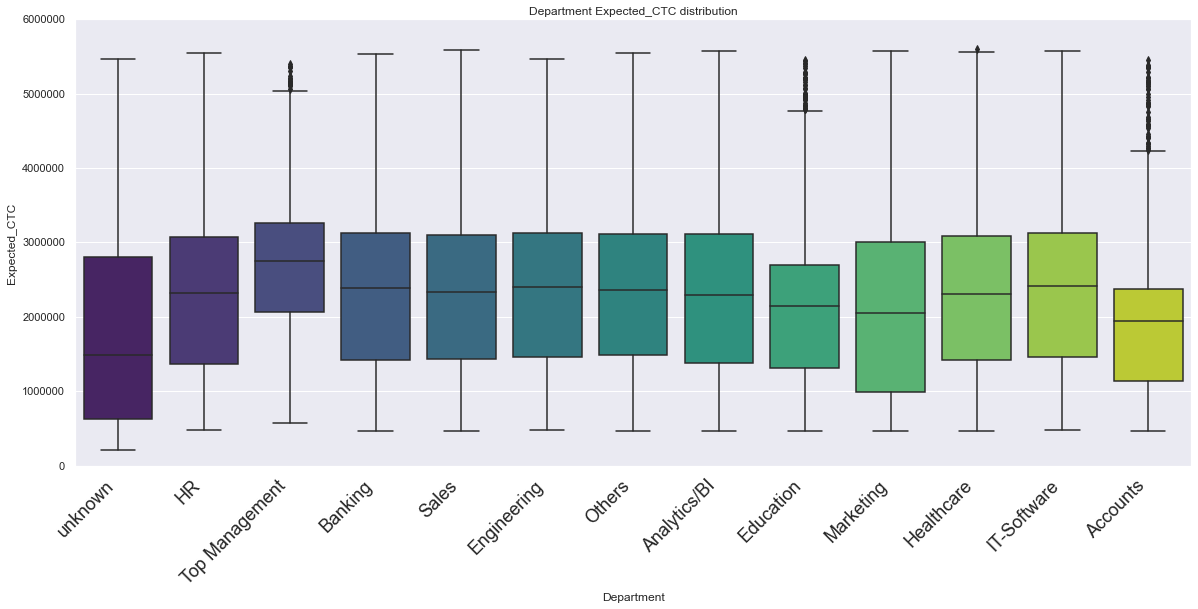

In [220]:
plt.figure(figsize=(20,8))

chart=sns.boxplot(x="Department", y="Expected_CTC", data=df_1, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Department Expected_CTC distribution')
chart;

As we saw in the above figure median values for expected_ctc of HR, Banking , Sales , Engineering, Others,Anlaytics/BI, Healthcare and IT-Software and Marketing is almost same / nearby  so we can combine them into one and named them as mid_level_dept. As we saw in the plot Top Managemnet  department applicants have higher median values than other so we can named them as top_level_dept.Education and Accounts dept have nearby median values so we can combine them as named as low_level_dept and unknown have least median value among all so we can name this as very_low_dept.So here we combine them first and then do label encoding on them.

In [221]:
df_1['Department']=np.where(df_1['Department'] =='Top Management', 'top_level_dept', df_1['Department'])

In [222]:
df_1['Department']=np.where(df_1['Department'] =='HR', 'mid_level_dept', df_1['Department'])

In [223]:
df_1['Department']=np.where(df_1['Department'] =='Banking', 'mid_level_dept', df_1['Department'])

In [224]:
df_1['Department']=np.where(df_1['Department'] =='Sales', 'mid_level_dept', df_1['Department'])

In [225]:
df_1['Department']=np.where(df_1['Department'] =='Engineering', 'mid_level_dept', df_1['Department'])

In [226]:
df_1['Department']=np.where(df_1['Department'] =='Others', 'mid_level_dept', df_1['Department'])

In [227]:
df_1['Department']=np.where(df_1['Department'] =='Analytics/BI', 'mid_level_dept', df_1['Department'])

In [228]:
df_1['Department']=np.where(df_1['Department'] =='Healthcare', 'mid_level_dept', df_1['Department'])

In [229]:
df_1['Department']=np.where(df_1['Department'] =='IT-Software', 'mid_level_dept', df_1['Department'])

In [230]:
df_1['Department']=np.where(df_1['Department'] =='Marketing', 'mid_level_dept', df_1['Department'])

In [231]:
df_1['Department']=np.where(df_1['Department'] =='Education', 'low_level_dept', df_1['Department'])

In [232]:
df_1['Department']=np.where(df_1['Department'] =='Accounts', 'low_level_dept', df_1['Department'])

In [233]:
df_1['Department']=np.where(df_1['Department'] =='unknown', 'very_low_level_dept', df_1['Department'])

In [234]:
df_1["Department"].value_counts()

mid_level_dept         17524
low_level_dept          3066
very_low_level_dept     2778
top_level_dept          1632
Name: Department, dtype: int64

**Lable Encoding of Department**

In [235]:
df_1['Department']=np.where(df_1['Department'] =='very_low_level_dept', '0', df_1['Department'])

In [236]:
df_1['Department']=np.where(df_1['Department'] =='low_level_dept', '1', df_1['Department'])

In [237]:
df_1['Department']=np.where(df_1['Department'] =='mid_level_dept', '2', df_1['Department'])

In [238]:
df_1['Department']=np.where(df_1['Department'] =='top_level_dept', '3', df_1['Department'])

In [239]:
df_1["Department"].value_counts()

2    17524
1     3066
0     2778
3     1632
Name: Department, dtype: int64

In [240]:
df_1["Role"].value_counts()

Others                  2248
Bio statistician        1913
Analyst                 1892
Project Manager         1850
Team Lead               1833
Consultant              1780
Business Analyst        1711
Sales Execituve         1574
Sales Manager           1427
Senior Researcher       1236
Financial Analyst       1182
CEO                     1149
Scientist               1139
Head                    1108
unknown                  963
Associate                767
Data scientist           363
Principal Analyst        275
Area Sales Manager       134
Senior Analyst           128
Researcher               123
Sr. Business Analyst     114
Research Scientist        33
Professor                 33
Lab Executuve             25
Name: Role, dtype: int64

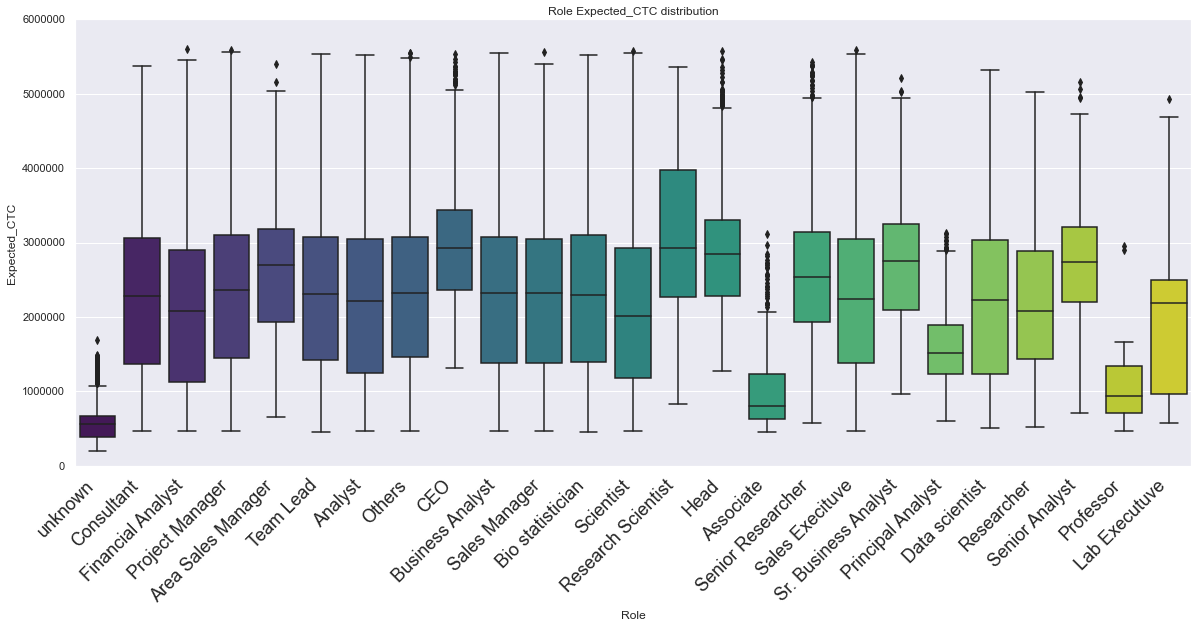

In [241]:
plt.figure(figsize=(20,8))
chart=sns.boxplot(x="Role", y="Expected_CTC", data=df_1, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Role Expected_CTC distribution')
chart;

As we saw in the above figure median values for expected_ctc of CEO , Research Scientist ,Head , Area Sales Manager , Senior Buisnes Analyst , Senior Researcher and Senior Analyst is quite nearby so we can combine them and name them as top_level_roles.
Secondly, we saw that Consultant ,Financial Analyst ,Project Manager ,Team Lead ,Analyst ,Others ,Business Analyst ,Sales Manager ,Bio statistician , Scientist ,Sales Executive ,Data Scientist , Researcher and Lab Executives have near by median values so we can combine them and name them as mid_level_roles.Principal Analyst have low median value than top_level_roles and mid_level_roles so we can name them as mid_low_level_roles.Associate and Professor have lower median values than all other so we combine them and name them as low_level_roles. Atlast we have unknown which have least median among all so we can name them as extremely_low_level_roles.

In [242]:
df_1['Role']=np.where(df_1['Role'] =='CEO', 'top_level_roles', df_1['Role'])
df_1['Role']=np.where(df_1['Role'] =='Research Scientist', 'top_level_roles', df_1['Role'])
df_1['Role']=np.where(df_1['Role'] =='Head', 'top_level_roles', df_1['Role'])
df_1['Role']=np.where(df_1['Role'] =='Area Sales Manager', 'top_level_roles', df_1['Role'])
df_1['Role']=np.where(df_1['Role'] =='Sr. Business Analyst', 'top_level_roles', df_1['Role'])
df_1['Role']=np.where(df_1['Role'] =='Senior Analyst', 'top_level_roles', df_1['Role'])
df_1['Role']=np.where(df_1['Role'] =='Senior Researcher', 'top_level_roles', df_1['Role'])

In [243]:
df_1['Role']=np.where(df_1['Role'] =='Consultant', 'mid_level_roles', df_1['Role'])
df_1['Role']=np.where(df_1['Role'] =='Financial Analyst', 'mid_level_roles', df_1['Role'])
df_1['Role']=np.where(df_1['Role'] =='Project Manager', 'mid_level_roles', df_1['Role'])
df_1['Role']=np.where(df_1['Role'] =='Team Lead', 'mid_level_roles', df_1['Role'])
df_1['Role']=np.where(df_1['Role'] =='Analyst', 'mid_level_roles', df_1['Role'])
df_1['Role']=np.where(df_1['Role'] =='Others', 'mid_level_roles', df_1['Role'])
df_1['Role']=np.where(df_1['Role'] =='Business Analyst', 'mid_level_roles', df_1['Role'])
df_1['Role']=np.where(df_1['Role'] =='Sales Manager', 'mid_level_roles', df_1['Role'])
df_1['Role']=np.where(df_1['Role'] =='Bio statistician', 'mid_level_roles', df_1['Role'])
df_1['Role']=np.where(df_1['Role'] =='Scientist', 'mid_level_roles', df_1['Role'])
df_1['Role']=np.where(df_1['Role'] =='Sales Execituve', 'mid_level_roles', df_1['Role'])
df_1['Role']=np.where(df_1['Role'] =='Data scientist', 'mid_level_roles', df_1['Role'])
df_1['Role']=np.where(df_1['Role'] =='Researcher', 'mid_level_roles', df_1['Role'])
df_1['Role']=np.where(df_1['Role'] =='Lab Executuve', 'mid_level_roles', df_1['Role'])

In [244]:
df_1['Role']=np.where(df_1['Role'] =='Principal Analyst', 'mid_low_level_roles', df_1['Role'])

In [245]:
df_1['Role']=np.where(df_1['Role'] =='Associate', 'low_level_roles', df_1['Role'])
df_1['Role']=np.where(df_1['Role'] =='Professor', 'low_level_roles', df_1['Role'])

In [246]:
df_1['Role']=np.where(df_1['Role'] =='unknown', 'extremely_low_level_roles', df_1['Role'])

In [247]:
df_1["Role"].value_counts()

mid_level_roles              19060
top_level_roles               3902
extremely_low_level_roles      963
low_level_roles                800
mid_low_level_roles            275
Name: Role, dtype: int64

**Lable Encoding of Role**

In [248]:
df_1['Role']=np.where(df_1['Role'] =='extremely_low_level_roles', '0', df_1['Role'])
df_1['Role']=np.where(df_1['Role'] =='low_level_roles', '1', df_1['Role'])
df_1['Role']=np.where(df_1['Role'] =='mid_low_level_roles', '2', df_1['Role'])
df_1['Role']=np.where(df_1['Role'] =='mid_level_roles', '3', df_1['Role'])
df_1['Role']=np.where(df_1['Role'] =='top_level_roles', '4', df_1['Role'])

In [249]:
df_1["Role"].value_counts()

3    19060
4     3902
0      963
1      800
2      275
Name: Role, dtype: int64

In [250]:
df_1["Designation"].value_counts()

unknown               3129
HR                    1648
Others                1647
Manager               1628
Product Manager       1626
Sr.Manager            1617
Consultant            1606
Assistant Manager     1590
Marketing Manager     1590
Data Analyst          1575
Research Analyst      1563
Medical Officer       1047
Software Developer     914
Web Designer           882
Network Engineer       862
Director               772
CA                     715
Research Scientist     537
Scientist               52
Name: Designation, dtype: int64

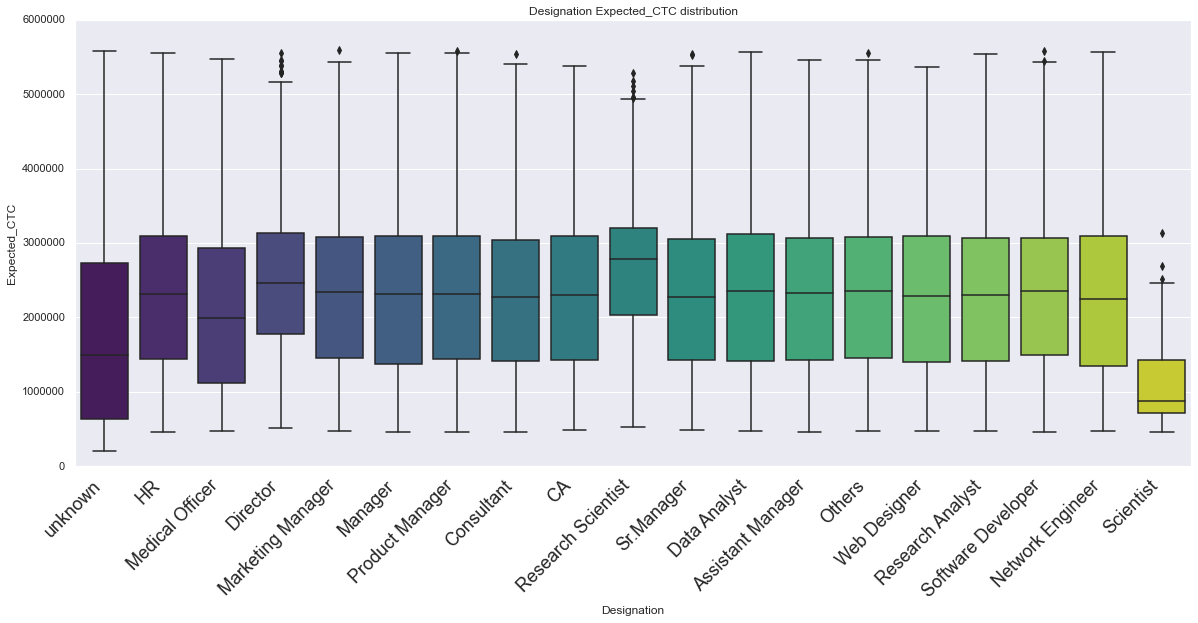

In [251]:
plt.figure(figsize=(20,8))
chart=sns.boxplot(x="Designation", y="Expected_CTC", data=df_1, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Designation Expected_CTC distribution')
chart;

As we saw in the above figure median values for expected_ctc of Research Scientist is high as compared to all so we name it as top_designation.Secondly, we found that HR, Markerting Manager ,Director , Manager , Product Manager ,Consultant, CA ,Sr.Manger , Data Analyst ,Assistant Manager ,Others ,Web Desginers, Research Analyst ,Software Developer ,have almost nearby median values so we can combine them and name them 
mid_designation.Medical Office and Network Engineer has almost nearby median values so we can combine them and name them as mid_low_designation.Then we unknown so we can name them as low_designation as their median values is lower than above two.Atlast we have scientist which has least median value so we can name them as extremely_low_designation.

In [252]:
df_1['Designation']=np.where(df_1['Designation'] =='Research Scientist', 'top_designation', df_1['Designation'])

In [253]:
df_1['Designation']=np.where(df_1['Designation'] =='HR', 'mid_designation', df_1['Designation'])
df_1['Designation']=np.where(df_1['Designation'] =='Marketing Manager', 'mid_designation', df_1['Designation'])
df_1['Designation']=np.where(df_1['Designation'] =='Director', 'mid_designation', df_1['Designation'])
df_1['Designation']=np.where(df_1['Designation'] =='Manager', 'mid_designation', df_1['Designation'])
df_1['Designation']=np.where(df_1['Designation'] =='Product Manager', 'mid_designation', df_1['Designation'])
df_1['Designation']=np.where(df_1['Designation'] =='Consultant', 'mid_designation', df_1['Designation'])
df_1['Designation']=np.where(df_1['Designation'] =='CA', 'mid_designation', df_1['Designation'])
df_1['Designation']=np.where(df_1['Designation'] =='Sr.Manager', 'mid_designation', df_1['Designation'])
df_1['Designation']=np.where(df_1['Designation'] =='Data Analyst', 'mid_designation', df_1['Designation'])
df_1['Designation']=np.where(df_1['Designation'] =='Assistant Manager', 'mid_designation', df_1['Designation'])
df_1['Designation']=np.where(df_1['Designation'] =='Others', 'mid_designation', df_1['Designation'])
df_1['Designation']=np.where(df_1['Designation'] =='Web Designer', 'mid_designation', df_1['Designation'])
df_1['Designation']=np.where(df_1['Designation'] =='Research Analyst', 'mid_designation', df_1['Designation'])
df_1['Designation']=np.where(df_1['Designation'] =='Software Developer', 'mid_designation', df_1['Designation'])

In [254]:
df_1['Designation']=np.where(df_1['Designation'] =='Medical Officer', 'mid_low_designation', df_1['Designation'])
df_1['Designation']=np.where(df_1['Designation'] =='Network Engineer', 'mid_low_designation', df_1['Designation'])

In [255]:
df_1['Designation']=np.where(df_1['Designation'] =='unknown', 'low_designation', df_1['Designation'])

In [256]:
df_1['Designation']=np.where(df_1['Designation'] =='Scientist', 'extremely_low_designation', df_1['Designation'])

In [257]:
df_1["Designation"].value_counts()

mid_designation              19373
low_designation               3129
mid_low_designation           1909
top_designation                537
extremely_low_designation       52
Name: Designation, dtype: int64

**Lable Encoding of Designation**

In [258]:
df_1['Designation']=np.where(df_1['Designation'] =='extremely_low_designation', '0', df_1['Designation'])
df_1['Designation']=np.where(df_1['Designation'] =='low_designation', '1', df_1['Designation'])
df_1['Designation']=np.where(df_1['Designation'] =='mid_low_designation', '2', df_1['Designation'])
df_1['Designation']=np.where(df_1['Designation'] =='mid_designation', '3', df_1['Designation'])
df_1['Designation']=np.where(df_1['Designation'] =='top_designation', '4', df_1['Designation'])

In [259]:
df_1["Designation"].value_counts()

3    19373
1     3129
2     1909
4      537
0       52
Name: Designation, dtype: int64

**Lable Encoding of Highest Education**

In [260]:
df_1["Highest_Education"].value_counts()

PG            6326
Doctorate     6285
Grad          6209
Under Grad    6180
Name: Highest_Education, dtype: int64

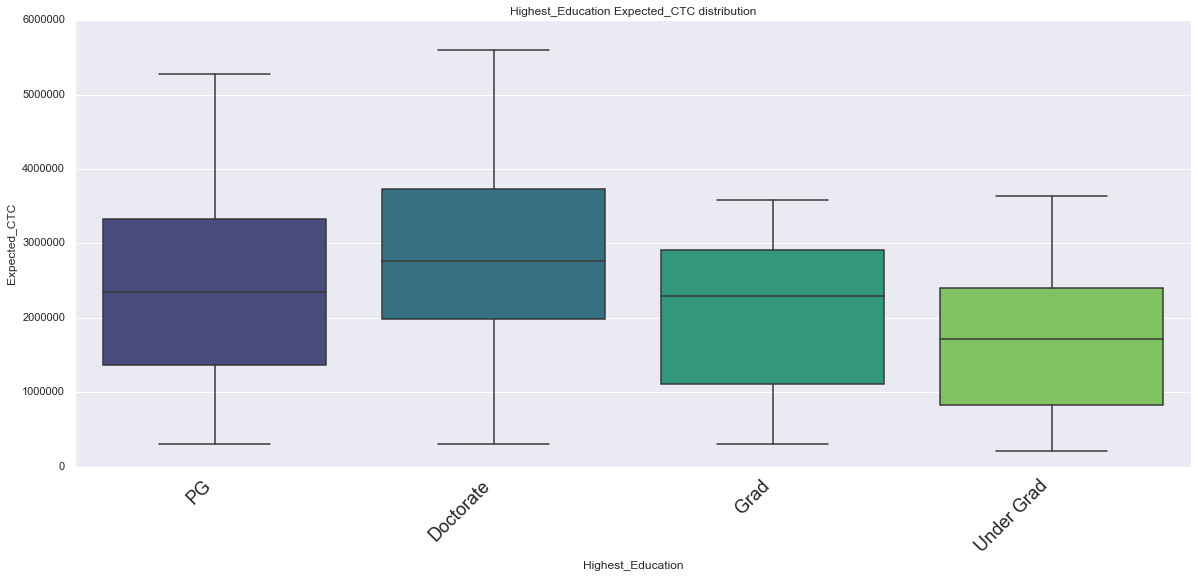

In [261]:
plt.figure(figsize=(20,8))
chart=sns.boxplot(x="Highest_Education", y="Expected_CTC", data=df_1, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Highest_Education Expected_CTC distribution')
chart;

In [262]:
df_1['Highest_Education']=np.where(df_1['Highest_Education'] =='Under Grad', '0', df_1['Highest_Education'])
df_1['Highest_Education']=np.where(df_1['Highest_Education'] =='Grad', '1', df_1['Highest_Education'])
df_1['Highest_Education']=np.where(df_1['Highest_Education'] =='PG', '2', df_1['Highest_Education'])
df_1['Highest_Education']=np.where(df_1['Highest_Education'] =='Doctorate', '3', df_1['Highest_Education'])

In [263]:
df_1["Highest_Education"].value_counts()

2    6326
3    6285
1    6209
0    6180
Name: Highest_Education, dtype: int64

**Lable Encoding of Inhand_Offer**

In [264]:
df_1["Inhand_Offer"].value_counts()

N    17418
Y     7582
Name: Inhand_Offer, dtype: int64

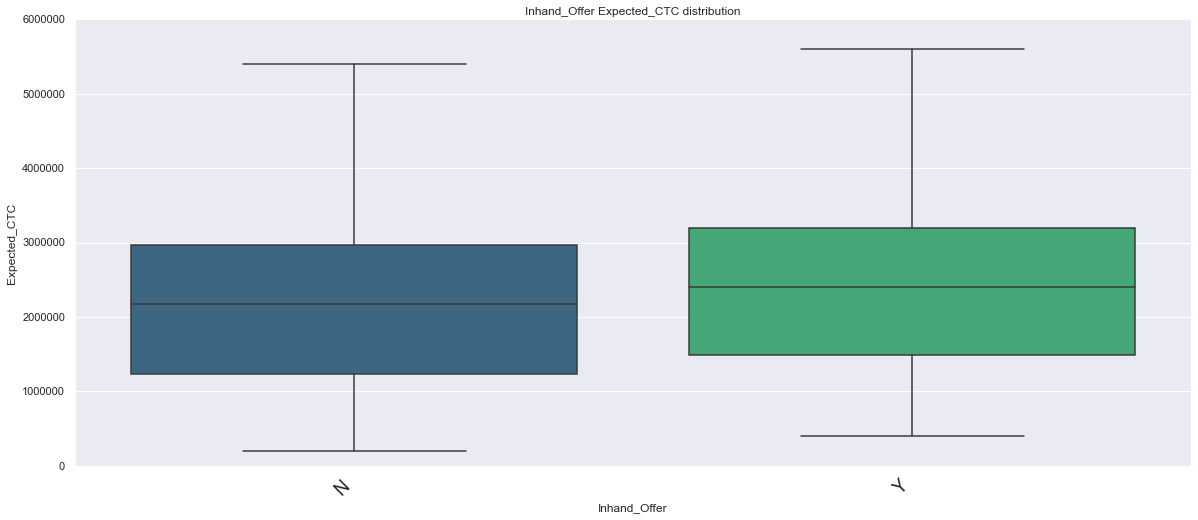

In [265]:
plt.figure(figsize=(20,8))
chart=sns.boxplot(x="Inhand_Offer", y="Expected_CTC", data=df_1, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Inhand_Offer Expected_CTC distribution')
chart;

In [266]:
df_1['Inhand_Offer']=np.where(df_1['Inhand_Offer'] =='N', '0', df_1['Inhand_Offer'])
df_1['Inhand_Offer']=np.where(df_1['Inhand_Offer'] =='Y', '1', df_1['Inhand_Offer'])

In [267]:
df_1["Inhand_Offer"].value_counts()

0    17418
1     7582
Name: Inhand_Offer, dtype: int64

**Lable Encoding of Last_Appraisal_Rating**

In [268]:
df_1["Last_Appraisal_Rating"].value_counts()

B                5501
D                4917
C                4812
A                4671
Key_Performer    4191
unknown           908
Name: Last_Appraisal_Rating, dtype: int64

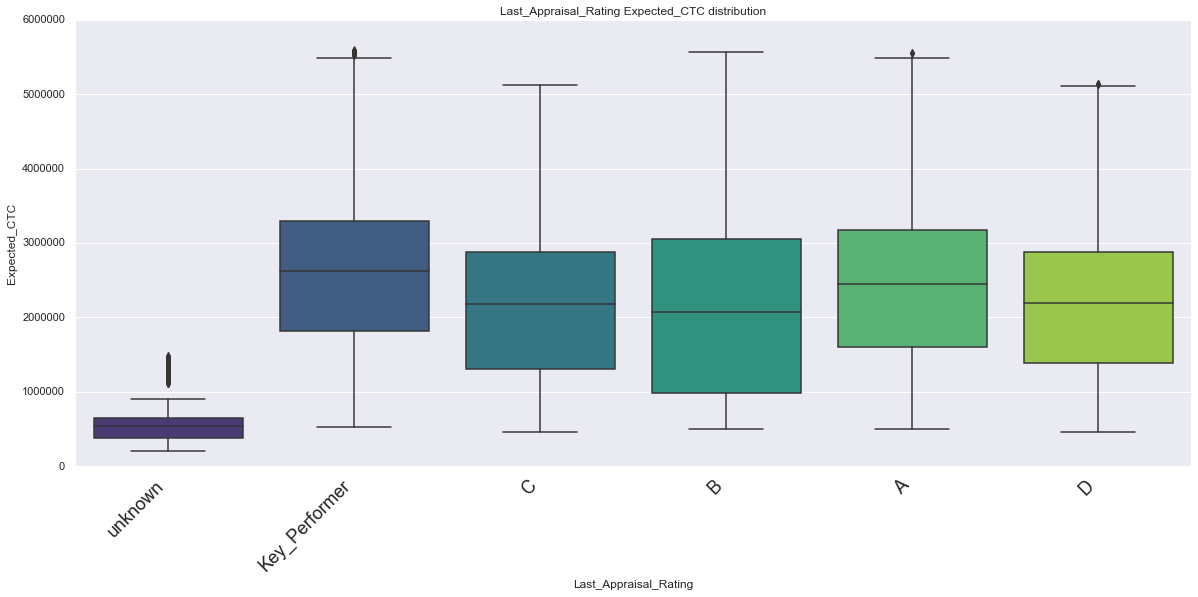

In [269]:
plt.figure(figsize=(20,8))
chart=sns.boxplot(x="Last_Appraisal_Rating", y="Expected_CTC", data=df_1, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Last_Appraisal_Rating Expected_CTC distribution')
chart;

As we saw that C and  D have same median values for expected_ctc so we combine C and D and name them as C.

In [270]:
df_1['Last_Appraisal_Rating']=np.where(df_1['Last_Appraisal_Rating'] =='D', 'C', df_1['Last_Appraisal_Rating'])

In [271]:
df_1['Last_Appraisal_Rating']=np.where(df_1['Last_Appraisal_Rating'] =='unknown', '0', df_1['Last_Appraisal_Rating'])
df_1['Last_Appraisal_Rating']=np.where(df_1['Last_Appraisal_Rating'] =='C', '1', df_1['Last_Appraisal_Rating'])
df_1['Last_Appraisal_Rating']=np.where(df_1['Last_Appraisal_Rating'] =='B', '2', df_1['Last_Appraisal_Rating'])
df_1['Last_Appraisal_Rating']=np.where(df_1['Last_Appraisal_Rating'] =='A', '3', df_1['Last_Appraisal_Rating'])
df_1['Last_Appraisal_Rating']=np.where(df_1['Last_Appraisal_Rating'] =='Key_Performer', '4', df_1['Last_Appraisal_Rating'])

In [272]:
df_1["Last_Appraisal_Rating"].value_counts()

1    9729
2    5501
3    4671
4    4191
0     908
Name: Last_Appraisal_Rating, dtype: int64

**Checking the Dataset after Encoding**

In [273]:
df_1.head()

Total_Experience  Total_Experience_in_field_applied Department Role  \
0                 0                                  0          0    0   
1                23                                 14          2    3   
2                21                                 12          3    3   
3                15                                  8          2    3   
4                10                                  5          2    3   

  Designation Highest_Education  Passing_Year_Of_Graduation  \
0           1                 2                      2020.0   
1           3                 3                      1988.0   
2           1                 3                      1990.0   
3           3                 3                      1997.0   
4           2                 1                      2004.0   

   Passing_Year_Of_PG  Passing_Year_Of_PHD  Current_CTC Inhand_Offer  \
0                 0.0                  0.0            0            0   
1              1990.0               1997.0      2702664            1   
2              1992.0               1999.0      2236661            1   
3              1999.0               2005.0      2100510            0   
4              2006.0               2010.0      1931644            0   

  Last_Appraisal_Rating  No_Of_Companies_worked  Number_of_Publications  \
0                     0                       0                       0   
1                     4                       2                       4   
2                     4                       5                       3   
3                     1                       5                       3   
4                     1                       2                       3   

   Certifications  International_degree_any  Expected_CTC  \
0               0                         0        384551   
1               0                         0       3783729   
2               0                         0       3131325   
3               0                         0       2608833   
4               0                         0       2221390   

   Percentage_Relevant_Exp_in_Field  
0                               0.0  
1                              61.0  
2                              57.0  
3                              53.0  
4                              50.0

In [274]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Experience                   25000 non-null  int64  
 1   Total_Experience_in_field_applied  25000 non-null  int64  
 2   Department                         25000 non-null  object 
 3   Role                               25000 non-null  object 
 4   Designation                        25000 non-null  object 
 5   Highest_Education                  25000 non-null  object 
 6   Passing_Year_Of_Graduation         25000 non-null  float64
 7   Passing_Year_Of_PG                 25000 non-null  float64
 8   Passing_Year_Of_PHD                25000 non-null  float64
 9   Current_CTC                        25000 non-null  int64  
 10  Inhand_Offer                       25000 non-null  object 
 11  Last_Appraisal_Rating              25000 non-null  obj

**Converting the Datatypes of encoded variables into int64**

In [275]:
df_1['Department'] = df_1['Department'].astype('int64')
df_1['Role'] = df_1['Role'].astype('int64')
df_1['Designation'] = df_1['Designation'].astype('int64')
df_1['Highest_Education'] = df_1['Highest_Education'].astype('int64')
df_1['Inhand_Offer'] = df_1['Inhand_Offer'].astype('int64')
df_1['Last_Appraisal_Rating'] = df_1['Last_Appraisal_Rating'].astype('int64')

In [276]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Experience                   25000 non-null  int64  
 1   Total_Experience_in_field_applied  25000 non-null  int64  
 2   Department                         25000 non-null  int64  
 3   Role                               25000 non-null  int64  
 4   Designation                        25000 non-null  int64  
 5   Highest_Education                  25000 non-null  int64  
 6   Passing_Year_Of_Graduation         25000 non-null  float64
 7   Passing_Year_Of_PG                 25000 non-null  float64
 8   Passing_Year_Of_PHD                25000 non-null  float64
 9   Current_CTC                        25000 non-null  int64  
 10  Inhand_Offer                       25000 non-null  int64  
 11  Last_Appraisal_Rating              25000 non-null  int

In [277]:
#df_1.to_csv('expected_ctc_updated_1') #expected_ctc_updated_1 this dataset contain encoded data which we use for Multiple Model Building.

**Train-Test Split for Model Building**

In [278]:
X = df_1.drop('Expected_CTC',axis=1)
Y = df_1[['Expected_CTC']]

**Split X and Y into training and test set in 70:30 ratio.**

In [279]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [280]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

**Linear Regression Model-1 using Sklearn.**

**Invoke the LinearRegression function.**

In [281]:
from sklearn.linear_model import LinearRegression
regression_model= LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression()

**Explore the coefficients for each of the independent attributes.**

In [282]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}" . format(col_name, regression_model.coef_[0][idx]))

The coefficient for Total_Experience is -5708.371196039307
The coefficient for Total_Experience_in_field_applied is 7627.991833760015
The coefficient for Department is -26964.332458536745
The coefficient for Role is -92250.08636479377
The coefficient for Designation is -34531.52969682892
The coefficient for Highest_Education is 91983.43367532847
The coefficient for Passing_Year_Of_Graduation is -3810.3385464441985
The coefficient for Passing_Year_Of_PG is -28.22170310228962
The coefficient for Passing_Year_Of_PHD is -15.403892960030497
The coefficient for Current_CTC is 1.250672063596419
The coefficient for Inhand_Offer is 40181.77232177193
The coefficient for Last_Appraisal_Rating is 69501.37686798647
The coefficient for No_Of_Companies_worked is -10873.972069499954
The coefficient for Number_of_Publications is 4492.3749344316475
The coefficient for Certifications is 612.4293931556061
The coefficient for International_degree_any is 36401.78854350737
The coefficient for Percentage_Rele

**Intercept for the Model**

In [283]:
regression_model.intercept_

array([7951913.5554777])

**R Square on Training Data**

In [284]:
regression_model.score(X_train,Y_train)

0.9893059671397622

**R Square on Testing Data**

In [285]:
regression_model.score(X_test,Y_test)

0.9897924521445122

In [286]:
from numpy import math
from sklearn import metrics

**RMSE on Training Data**

In [287]:
predicted_train= regression_model.fit(X_train,Y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(Y_train,predicted_train))

119545.42733621509

**RMSE on Testing Data**

In [288]:
predicted_test= regression_model.fit(X_train,Y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(Y_test,predicted_test))

118283.86008401512

**Linear Regression Model-1 Using statsmodels.**

In [289]:
# concatenate X and Y into a single dataframe
data_train= pd.concat([X_train,Y_train],axis=1)
data_test= pd.concat([X_test,Y_test],axis=1)
data_train.head()

Total_Experience  Total_Experience_in_field_applied  Department  Role  \
4289                 16                                  6           3     4   
19621                12                                 11           2     3   
14965                25                                 13           2     4   
12321                14                                  0           2     3   
6269                 20                                 17           2     3   

       Designation  Highest_Education  Passing_Year_Of_Graduation  \
4289             3                  2                      2004.0   
19621            3                  0                      2002.0   
14965            3                  3                      1995.0   
12321            3                  0                      2002.0   
6269             3                  3                      1991.0   

       Passing_Year_Of_PG  Passing_Year_Of_PHD  Current_CTC  Inhand_Offer  \
4289               2021.0                  0.0      2599539             0   
19621                 0.0                  0.0      1590046             1   
14965              2013.0                  0.0      3641226             0   
12321                 0.0                  0.0      1567804             0   
6269               1993.0               2000.0      3344366             0   

       Last_Appraisal_Rating  No_Of_Companies_worked  Number_of_Publications  \
4289                       1                       2                       1   
19621                      4                       3                       6   
14965                      4                       6                       0   
12321                      2                       3                       3   
6269                       3                       5                       3   

       Certifications  International_degree_any  \
4289                0                         0   
19621               3                         0   
14965               0                         0   
12321               2                         0   
6269                0                         0   

       Percentage_Relevant_Exp_in_Field  Expected_CTC  
4289                               38.0       3109048  
19621                              92.0       2067059  
14965                              52.0       4915655  
12321                               0.0       1959755  
6269                               85.0       4514894

In [290]:
data_test.head()

Total_Experience  Total_Experience_in_field_applied  Department  Role  \
21492                 8                                  3           2     3   
9488                 14                                  6           2     3   
16933                19                                 13           2     3   
12604                 4                                  3           2     3   
8222                  2                                  0           2     1   

       Designation  Highest_Education  Passing_Year_Of_Graduation  \
21492            3                  1                      2012.0   
9488             3                  2                      1998.0   
16933            3                  1                      1993.0   
12604            3                  1                      2008.0   
8222             3                  3                      2010.0   

       Passing_Year_Of_PG  Passing_Year_Of_PHD  Current_CTC  Inhand_Offer  \
21492              2013.0                  0.0       935207             0   
9488               2000.0               2006.0      1419998             0   
16933              1995.0               2001.0      2446313             0   
12604              2010.0               2016.0       573222             0   
8222               2012.0               2018.0       419866             1   

       Last_Appraisal_Rating  No_Of_Companies_worked  Number_of_Publications  \
21492                      3                       6                       1   
9488                       2                       3                       5   
16933                      1                       5                       7   
12604                      1                       6                       7   
8222                       2                       3                       4   

       Certifications  International_degree_any  \
21492               0                         0   
9488                1                         0   
16933               1                         0   
12604               2                         0   
8222                0                         0   

       Percentage_Relevant_Exp_in_Field  Expected_CTC  
21492                              38.0       1215769  
9488                               43.0       1845997  
16933                              68.0       2813259  
12604                              75.0        659205  
8222                                0.0        587812

In [291]:
Y_train.head()

Expected_CTC
4289        3109048
19621       2067059
14965       4915655
12321       1959755
6269        4514894

In [292]:
Y_test.head()

Expected_CTC
21492       1215769
9488        1845997
16933       2813259
12604        659205
8222         587812

**For Training Data**

In [293]:
expr= 'Expected_CTC ~ Total_Experience + Total_Experience_in_field_applied + Department + Role + Designation + Highest_Education + Passing_Year_Of_Graduation + Passing_Year_Of_PG + Passing_Year_Of_PHD + Current_CTC + Inhand_Offer + Last_Appraisal_Rating +  No_Of_Companies_worked + Number_of_Publications  + Certifications + International_degree_any + Percentage_Relevant_Exp_in_Field'     

In [294]:
import statsmodels.formula.api as smf
lm_train= smf.ols(formula=expr, data=data_train).fit()
lm_train.params

Intercept                            7.951914e+06
Total_Experience                    -5.708371e+03
Total_Experience_in_field_applied    7.627992e+03
Department                          -2.696433e+04
Role                                -9.225009e+04
Designation                         -3.453153e+04
Highest_Education                    9.198343e+04
Passing_Year_Of_Graduation          -3.810339e+03
Passing_Year_Of_PG                  -2.822170e+01
Passing_Year_Of_PHD                 -1.540389e+01
Current_CTC                          1.250672e+00
Inhand_Offer                         4.018177e+04
Last_Appraisal_Rating                6.950138e+04
No_Of_Companies_worked              -1.087397e+04
Number_of_Publications               4.492375e+03
Certifications                       6.124294e+02
International_degree_any             3.640179e+04
Percentage_Relevant_Exp_in_Field    -1.275862e+03
dtype: float64

In [295]:
print(lm_train.summary())

                            OLS Regression Results                            
Dep. Variable:           Expected_CTC   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 9.513e+04
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:30:09   Log-Likelihood:            -2.2943e+05
No. Observations:               17500   AIC:                         4.589e+05
Df Residuals:                   17482   BIC:                         4.590e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

**Hypothesis Testing**

H0 : There is no relationship between independent and the dependen variable.

H1 : There is a relationship between independent and the dependen variable.

As we found that in statsmodel summary the pvalue of Certifications variable is  0.490. We know that if pvalue < 0.05 reject the null hypohesis & if pvalue > 0.05 we fail to reject the null hypothesis.Here we found that pvalue of Certifications is 0.490 which greater than 0.05. So, we fail to reject the null hypothesis.Certifications is not good varibale to predict the expected_ctc so we can drop it from the ols model and rebuilt the model again and check the statsmodel summary and rmse and accuracy of the model again.

**For Testing Data**

In [296]:
import statsmodels.formula.api as smf
lm_test= smf.ols(formula=expr, data=data_test).fit()
lm_test.params

Intercept                            8.289336e+06
Total_Experience                    -5.660149e+03
Total_Experience_in_field_applied    7.487810e+03
Department                          -2.756411e+04
Role                                -8.955167e+04
Designation                         -3.214243e+04
Highest_Education                    9.110346e+04
Passing_Year_Of_Graduation          -3.988796e+03
Passing_Year_Of_PG                  -2.441003e+01
Passing_Year_Of_PHD                 -1.792036e+01
Current_CTC                          1.251031e+00
Inhand_Offer                         5.073873e+04
Last_Appraisal_Rating                6.770867e+04
No_Of_Companies_worked              -9.086677e+03
Number_of_Publications               3.913095e+03
Certifications                      -3.405709e+02
International_degree_any             3.087677e+04
Percentage_Relevant_Exp_in_Field    -1.232950e+03
dtype: float64

In [297]:
print(lm_test.summary())

                            OLS Regression Results                            
Dep. Variable:           Expected_CTC   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 4.287e+04
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:30:09   Log-Likelihood:                -98232.
No. Observations:                7500   AIC:                         1.965e+05
Df Residuals:                    7482   BIC:                         1.966e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

**Hypothesis Testing**

H0 : There is no relationship between independent and the dependen variable.
H1 : There is a relationship between independent and the dependen variable.
As we found that in statsmodel summary the pvalue of Certifications variable is 0.796. We know that if pvalue < 0.05 reject the null hypohesis & if pvalue > 0.05 we fail to reject the null hypothesis.Here we found that pvalue of Certifications is 0.796 which greater than 0.05. So, we fail to reject the null hypothesis.Certifications is not good varibale to predict the expected_ctc so we can drop it from the ols model and rebuilt the model again and check the statsmodel summary and rmse and accuracy of the model again.

**Calculate MSE of Train Data**

In [298]:
mse= np.mean((lm_train.predict(data_train.drop('Expected_CTC',axis=1))-data_train['Expected_CTC'])**2)
mse

14291109196.998304

In [299]:
np.sqrt(mse)

119545.42733621519

**Calculate MSE of Test Data**

In [300]:
mse= np.mean((lm_test.predict(data_test.drop('Expected_CTC',axis=1))-data_test['Expected_CTC'])**2)
mse

13929712004.686884

In [301]:
np.sqrt(mse)

118024.20092797445

**Prediction on Train & Test data**

In [302]:
y_pred_train = lm_train.predict(data_train)
y_pred_test = lm_test.predict(data_test)

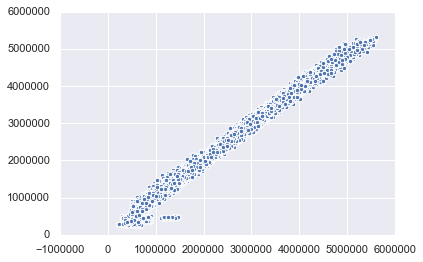

In [303]:
plt.scatter(Y_train['Expected_CTC'],y_pred_train)
plt.show()

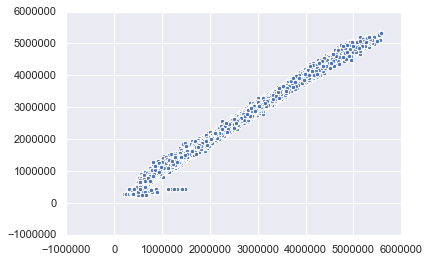

In [304]:
plt.scatter(Y_test['Expected_CTC'],y_pred_test)
plt.show()

**Linear Regression Expression for Train Data.**

In [305]:
for i,j in np.array(lm_train.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(7951913.56) * Intercept + (-5708.37) * Total_Experience + (7627.99) * Total_Experience_in_field_applied + (-26964.33) * Department + (-92250.09) * Role + (-34531.53) * Designation + (91983.43) * Highest_Education + (-3810.34) * Passing_Year_Of_Graduation + (-28.22) * Passing_Year_Of_PG + (-15.4) * Passing_Year_Of_PHD + (1.25) * Current_CTC + (40181.77) * Inhand_Offer + (69501.38) * Last_Appraisal_Rating + (-10873.97) * No_Of_Companies_worked + (4492.37) * Number_of_Publications + (612.43) * Certifications + (36401.79) * International_degree_any + (-1275.86) * Percentage_Relevant_Exp_in_Field + 

**Linear Regression Expression for Test Data.**

In [306]:
for i,j in np.array(lm_test.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(8289335.82) * Intercept + (-5660.15) * Total_Experience + (7487.81) * Total_Experience_in_field_applied + (-27564.11) * Department + (-89551.67) * Role + (-32142.43) * Designation + (91103.46) * Highest_Education + (-3988.8) * Passing_Year_Of_Graduation + (-24.41) * Passing_Year_Of_PG + (-17.92) * Passing_Year_Of_PHD + (1.25) * Current_CTC + (50738.73) * Inhand_Offer + (67708.67) * Last_Appraisal_Rating + (-9086.68) * No_Of_Companies_worked + (3913.1) * Number_of_Publications + (-340.57) * Certifications + (30876.77) * International_degree_any + (-1232.95) * Percentage_Relevant_Exp_in_Field + 

**Note -**

As we saw in the above results that Certifications varibale has p-value more than 0.05 which indicates us that Certifications feature is not important for predicting the expected_ctc our target variable so we can remove it from the linear regression expression.

**Linear Regression Model-2 using Sklearn** - Model on Scaled Data using Z-Score.

In [307]:
df_model_2=pd.read_csv("expected_ctc_updated_1") #loading the updated encoded csv of expected_ctc

In [308]:
df_model_2.head()

Unnamed: 0  Total_Experience  Total_Experience_in_field_applied  \
0           0                 0                                  0   
1           1                23                                 14   
2           2                21                                 12   
3           3                15                                  8   
4           4                10                                  5   

   Department  Role  Designation  Highest_Education  \
0           0     0            1                  2   
1           2     3            3                  3   
2           3     3            1                  3   
3           2     3            3                  3   
4           2     3            2                  1   

   Passing_Year_Of_Graduation  Passing_Year_Of_PG  Passing_Year_Of_PHD  \
0                      2020.0                 0.0                  0.0   
1                      1988.0              1990.0               1997.0   
2                      1990.0              1992.0               1999.0   
3                      1997.0              1999.0               2005.0   
4                      2004.0              2006.0               2010.0   

   Current_CTC  Inhand_Offer  Last_Appraisal_Rating  No_Of_Companies_worked  \
0            0             0                      0                       0   
1      2702664             1                      4                       2   
2      2236661             1                      4                       5   
3      2100510             0                      1                       5   
4      1931644             0                      1                       2   

   Number_of_Publications  Certifications  International_degree_any  \
0                       0               0                         0   
1                       4               0                         0   
2                       3               0                         0   
3                       3               0                         0   
4                       3               0                         0   

   Expected_CTC  Percentage_Relevant_Exp_in_Field  
0        384551                               0.0  
1       3783729                              61.0  
2       3131325                              57.0  
3       2608833                              53.0  
4       2221390                              50.0

In [309]:
df_model_2.drop(["Unnamed: 0"],axis=1,inplace=True)

In [310]:
df_model_2.head()

Total_Experience  Total_Experience_in_field_applied  Department  Role  \
0                 0                                  0           0     0   
1                23                                 14           2     3   
2                21                                 12           3     3   
3                15                                  8           2     3   
4                10                                  5           2     3   

   Designation  Highest_Education  Passing_Year_Of_Graduation  \
0            1                  2                      2020.0   
1            3                  3                      1988.0   
2            1                  3                      1990.0   
3            3                  3                      1997.0   
4            2                  1                      2004.0   

   Passing_Year_Of_PG  Passing_Year_Of_PHD  Current_CTC  Inhand_Offer  \
0                 0.0                  0.0            0             0   
1              1990.0               1997.0      2702664             1   
2              1992.0               1999.0      2236661             1   
3              1999.0               2005.0      2100510             0   
4              2006.0               2010.0      1931644             0   

   Last_Appraisal_Rating  No_Of_Companies_worked  Number_of_Publications  \
0                      0                       0                       0   
1                      4                       2                       4   
2                      4                       5                       3   
3                      1                       5                       3   
4                      1                       2                       3   

   Certifications  International_degree_any  Expected_CTC  \
0               0                         0        384551   
1               0                         0       3783729   
2               0                         0       3131325   
3               0                         0       2608833   
4               0                         0       2221390   

   Percentage_Relevant_Exp_in_Field  
0                               0.0  
1                              61.0  
2                              57.0  
3                              53.0  
4                              50.0

**Train-Test Split for Linear Regression Model**

In [311]:
X2 = df_model_2.drop('Expected_CTC',axis=1)
Y2 = df_model_2[['Expected_CTC']]

**Split X and Y into training and test set in 70:30 ratio.**

In [312]:
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X2, Y2, test_size=0.30 , random_state=1)

In [313]:
from scipy.stats import zscore

X_train_scaled  = X_train_2.apply(zscore)
X_test_scaled = X_test_2.apply(zscore)
y_train_scaled = Y_train_2.apply(zscore)
y_test_scaled = Y_test_2.apply(zscore)

In [314]:
X_train_scaled.head()

Total_Experience  Total_Experience_in_field_applied  Department  \
4289           0.471308                          -0.048497    1.720631   
19621         -0.063826                           0.804631    0.377707   
14965          1.675361                           1.145882    0.377707   
12321          0.203741                          -1.072250    0.377707   
6269           1.006443                           1.828385    0.377707   

           Role  Designation  Highest_Education  Passing_Year_Of_Graduation  \
4289   1.289675     0.428455           0.431962                    0.253142   
19621  0.044952     0.428455          -1.357019                   -0.023395   
14965  1.289675     0.428455           1.326453                   -0.991274   
12321  0.044952     0.428455          -1.357019                   -0.023395   
6269   0.044952     0.428455           1.326453                   -1.544348   

       Passing_Year_Of_PG  Passing_Year_Of_PHD  Current_CTC  Inhand_Offer  \
4289             0.681995            -1.053168     0.916354     -0.659289   
19621           -1.503906            -1.053168    -0.183934      1.516786   
14965            0.673342            -1.053168     2.051731     -0.659289   
12321           -1.503906            -1.053168    -0.208177     -0.659289   
6269             0.651710             0.942083     1.728171     -0.659289   

       Last_Appraisal_Rating  No_Of_Companies_worked  Number_of_Publications  \
4289               -0.897997               -0.876107               -1.185336   
19621               1.649547               -0.284623                0.727166   
14965               1.649547                1.489832               -1.567837   
12321              -0.048816               -0.284623               -0.420335   
6269                0.800366                0.898347               -0.420335   

       Certifications  International_degree_any  \
4289        -0.644641                 -0.299212   
19621        1.863039                 -0.299212   
14965       -0.644641                 -0.299212   
12321        1.027146                 -0.299212   
6269        -0.644641                 -0.299212   

       Percentage_Relevant_Exp_in_Field  
4289                          -0.305179  
19621                          1.288151  
14965                          0.107906  
12321                         -1.426412  
6269                           1.081609

In [315]:
y_train_scaled.head()

Expected_CTC
4289       0.744623
19621     -0.156743
14965      2.307416
12321     -0.249565
6269       1.960740

In [316]:
X_test_scaled.head()

Total_Experience  Total_Experience_in_field_applied  Department  \
21492         -0.607054                          -0.558881    0.370598   
9488           0.196920                          -0.034515    0.370598   
16933          0.866899                           1.189006    0.370598   
12604         -1.143037                          -0.558881    0.370598   
8222          -1.411029                          -1.083247    0.370598   

           Role  Designation  Highest_Education  Passing_Year_Of_Graduation  \
21492  0.038661     0.439671          -0.439026                    1.380460   
9488   0.038661     0.439671           0.458900                   -0.569946   
16933  0.038661     0.439671          -0.439026                   -1.266519   
12604  0.038661     0.439671          -0.439026                    0.823201   
8222  -2.482718     0.439671           1.356826                    1.101831   

       Passing_Year_Of_PG  Passing_Year_Of_PHD  Current_CTC  Inhand_Offer  \
21492            0.679219            -1.045276    -0.896666     -0.660895   
9488             0.665204             0.955326    -0.373403     -0.660895   
16933            0.659814             0.950340     0.734361     -0.660895   
12604            0.675985             0.965299    -1.287378     -0.660895   
8222             0.678141             0.967294    -1.452905      1.513101   

       Last_Appraisal_Rating  No_Of_Companies_worked  Number_of_Publications  \
21492               0.790984                1.489233               -1.184660   
9488               -0.056741               -0.286482                0.360885   
16933              -0.904467                0.897328                1.133657   
12604              -0.904467                1.489233                1.133657   
8222               -0.056741               -0.286482               -0.025501   

       Certifications  International_degree_any  \
21492       -0.645999                 -0.296217   
9488         0.182772                 -0.296217   
16933        0.182772                 -0.296217   
12604        1.011542                 -0.296217   
8222        -0.645999                 -0.296217   

       Percentage_Relevant_Exp_in_Field  
21492                         -0.290165  
9488                          -0.140550  
16933                          0.607523  
12604                          0.816983  
8222                          -1.427235

In [317]:
y_test_scaled.head()

Expected_CTC
21492     -0.887308
9488      -0.348997
16933      0.477192
12604     -1.362698
8222      -1.423678

**Invoke the LinearRegression function.**

In [318]:
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

**Explore the coefficients for each of the Independent Attributes.**

In [319]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train_2.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Total_Experience is -0.036910256337198334
The coefficient for Total_Experience_in_field_applied is 0.03867264545859081
The coefficient for Department is -0.017369049439972986
The coefficient for Role is -0.06411092488498438
The coefficient for Designation is -0.02157293210723535
The coefficient for Highest_Education is 0.08895524323659658
The coefficient for Passing_Year_Of_Graduation is -0.023838465335146983
The coefficient for Passing_Year_Of_PG is -0.02257131933597273
The coefficient for Passing_Year_Of_PHD is -0.013356747190299341
The coefficient for Current_CTC is 0.992608926805067
The coefficient for Inhand_Offer is 0.01597323953337604
The coefficient for Last_Appraisal_Rating is 0.07079957993233385
The coefficient for No_Of_Companies_worked is -0.015903120805298227
The coefficient for Number_of_Publications is 0.01015971990337714
The coefficient for Certifications is 0.0006337864931054203
The coefficient for International_degree_any is 0.008647721923217262
Th

**Intercept for the model**

In [320]:
intercept = regression_model.intercept_[0]
intercept

-2.6537853445585968e-16

**R Square on Training Data**

In [321]:
regression_model.score(X_train_scaled,y_train_scaled)

0.9893059671397622

**R square on Test Data**

In [322]:
regression_model.score(X_test_scaled,y_test_scaled)

0.9897874551097149

**RMSE on Training Data**

In [323]:
#RMSE on Training data
predicted_train_scaled= regression_model.fit(X_train_scaled,y_train_scaled).predict(X_train_scaled)
np.sqrt(metrics.mean_squared_error(y_train_scaled,predicted_train_scaled))

0.10341195704674494

**RMSE on Test data**

In [324]:
#RMSE on Training data
predicted_test_scaled= regression_model.fit(X_test_scaled,y_test_scaled).predict(X_test_scaled)
np.sqrt(metrics.mean_squared_error(y_test_scaled,predicted_test_scaled))

0.10081062150738966

**Linear Regression Model-2 Using statsmodel -** Model on Scaled Data using Z-Score.

In [325]:
# concatenate X and y into a single dataframe

In [326]:
data_train_2= pd.concat([X_train_2.apply(zscore),Y_train_2.apply(zscore)],axis=1)
data_test_2= pd.concat([X_test_2.apply(zscore),Y_test_2.apply(zscore)],axis=1)
data_train_2.head(10)

Total_Experience  Total_Experience_in_field_applied  Department  \
4289           0.471308                          -0.048497    1.720631   
19621         -0.063826                           0.804631    0.377707   
14965          1.675361                           1.145882    0.377707   
12321          0.203741                          -1.072250    0.377707   
6269           1.006443                           1.828385    0.377707   
7370           0.872659                           0.122129    0.377707   
20922         -1.000312                          -0.560373    0.377707   
4485          -1.134095                          -0.389748   -0.965217   
11502          0.203741                          -0.901625    0.377707   
4704          -0.732744                           0.122129    0.377707   

           Role  Designation  Highest_Education  Passing_Year_Of_Graduation  \
4289   1.289675     0.428455           0.431962                    0.253142   
19621  0.044952     0.428455          -1.357019                   -0.023395   
14965  1.289675     0.428455           1.326453                   -0.991274   
12321  0.044952     0.428455          -1.357019                   -0.023395   
6269   0.044952     0.428455           1.326453                   -1.544348   
7370   0.044952     0.428455           1.326453                   -1.267811   
20922 -2.444493     0.428455          -1.357019                   -0.023395   
4485   0.044952    -0.956209          -0.462528                    1.082752   
11502  0.044952     0.428455           0.431962                   -0.299932   
4704   0.044952     0.428455          -1.357019                   -0.023395   

       Passing_Year_Of_PG  Passing_Year_Of_PHD  Current_CTC  Inhand_Offer  \
4289             0.681995            -1.053168     0.916354     -0.659289   
19621           -1.503906            -1.053168    -0.183934      1.516786   
14965            0.673342            -1.053168     2.051731     -0.659289   
12321           -1.503906            -1.053168    -0.208177     -0.659289   
6269             0.651710             0.942083     1.728171     -0.659289   
7370             0.653873             0.943081     1.772171     -0.659289   
20922           -1.503906            -1.053168    -1.408845     -0.659289   
4485             0.672260             0.958045    -1.217705     -0.659289   
11502            0.661444             0.948069     0.167059      1.516786   
4704            -1.503906            -1.053168    -1.179660      1.516786   

       Last_Appraisal_Rating  No_Of_Companies_worked  Number_of_Publications  \
4289               -0.897997               -0.876107               -1.185336   
19621               1.649547               -0.284623                0.727166   
14965               1.649547                1.489832               -1.567837   
12321              -0.048816               -0.284623               -0.420335   
6269                0.800366                0.898347               -0.420335   
7370               -0.897997                0.306862                0.727166   
20922               0.800366                0.898347               -0.420335   
4485                0.800366               -1.467592                0.344666   
11502              -0.897997               -0.876107                1.109667   
4704                0.800366               -0.284623                0.344666   

       Certifications  International_degree_any  \
4289        -0.644641                 -0.299212   
19621        1.863039                 -0.299212   
14965       -0.644641                 -0.299212   
12321        1.027146                 -0.299212   
6269        -0.644641                 -0.299212   
7370        -0.644641                  3.342107   
20922        1.027146                 -0.299212   
4485         1.027146                 -0.299212   
11502        0.191252                 -0.299212   
4704         0.191252                 -0.299212   

       Percentage_Relevant_Exp_

In [327]:
expr_2= 'Expected_CTC ~ Total_Experience + Total_Experience_in_field_applied + Department + Role + Designation + Highest_Education + Passing_Year_Of_Graduation + Passing_Year_Of_PG + Passing_Year_Of_PHD + Current_CTC + Inhand_Offer + Last_Appraisal_Rating +  No_Of_Companies_worked + Number_of_Publications  + Certifications + International_degree_any + Percentage_Relevant_Exp_in_Field'     

**For Training Data**

In [328]:
import statsmodels.formula.api as smf
lm_train_2= smf.ols(formula=expr_2, data=data_train_2).fit()
lm_train_2.params

Intercept                           -1.734723e-18
Total_Experience                    -3.691026e-02
Total_Experience_in_field_applied    3.867265e-02
Department                          -1.736905e-02
Role                                -6.411092e-02
Designation                         -2.157293e-02
Highest_Education                    8.895524e-02
Passing_Year_Of_Graduation          -2.383847e-02
Passing_Year_Of_PG                  -2.257132e-02
Passing_Year_Of_PHD                 -1.335675e-02
Current_CTC                          9.926089e-01
Inhand_Offer                         1.597324e-02
Last_Appraisal_Rating                7.079958e-02
No_Of_Companies_worked              -1.590312e-02
Number_of_Publications               1.015972e-02
Certifications                       6.337865e-04
International_degree_any             8.647722e-03
Percentage_Relevant_Exp_in_Field    -3.740496e-02
dtype: float64

In [329]:
print(lm_train_2.summary())

                            OLS Regression Results                            
Dep. Variable:           Expected_CTC   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 9.513e+04
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:30:11   Log-Likelihood:                 14877.
No. Observations:               17500   AIC:                        -2.972e+04
Df Residuals:                   17482   BIC:                        -2.958e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

Hypothesis Testing

H0 : There is no relationship between independent and the dependen variable.

H1 : There is a relationship between independent and the dependen variable.

As we found that in statsmodel summary the pvalue of Certifications variable is 0.490. We know that if pvalue < 0.05 reject the null hypohesis & if pvalue > 0.05 we fail to reject the null hypothesis.Here we found that pvalue of Certifications is 0.490 which greater than 0.05. So, we fail to reject the null hypothesis.Certifications is not good varibale to predict the expected_ctc so we can drop it from the ols model and rebuilt the model again and check the statsmodel summary and rmse and accuracy of the model again.

**For Test Data**

In [330]:
import statsmodels.formula.api as smf
lm_test_2= smf.ols(formula=expr_2, data=data_test_2).fit()
lm_test_2.params

Intercept                            1.942890e-16
Total_Experience                    -3.608045e-02
Total_Experience_in_field_applied    3.659121e-02
Department                          -1.751725e-02
Role                                -6.067375e-02
Designation                         -1.974041e-02
Highest_Education                    8.666216e-02
Passing_Year_Of_Graduation          -2.445569e-02
Passing_Year_Of_PG                  -1.934000e-02
Passing_Year_Of_PHD                 -1.534801e-02
Current_CTC                          9.900043e-01
Inhand_Offer                         1.993500e-02
Last_Appraisal_Rating                6.822196e-02
No_Of_Companies_worked              -1.311259e-02
Number_of_Publications               8.650356e-03
Certifications                      -3.510010e-04
International_degree_any             7.182087e-03
Percentage_Relevant_Exp_in_Field    -3.519465e-02
dtype: float64

In [331]:
print(lm_test_2.summary())

                            OLS Regression Results                            
Dep. Variable:           Expected_CTC   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 4.287e+04
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:30:11   Log-Likelihood:                 6566.8
No. Observations:                7500   AIC:                        -1.310e+04
Df Residuals:                    7482   BIC:                        -1.297e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

**Hypothesis Testing**

H0 : There is no relationship between independent and the dependen variable. 

H1 : There is a relationship between independent and the dependen variable. 

As we found that in statsmodel summary the pvalue of Certifications variable is 0.796. We know that if pvalue < 0.05 reject the null hypohesis & if pvalue > 0.05 we fail to reject the null hypothesis.Here we found that pvalue of Certifications is 0.796 which greater than 0.05. So, we fail to reject the null hypothesis.Certifications is not good varibale to predict the expected_ctc so we can drop it from the ols model.

**Calculate MSE of Train Data**

In [332]:
mse= np.mean((lm_train_2.predict(data_train_2.drop('Expected_CTC',axis=1))-data_train_2['Expected_CTC'])**2)
mse

0.01069403286023785

In [333]:
np.sqrt(mse)

0.10341195704674508

**Calculate MSE of Test Data**

In [334]:
mse= np.mean((lm_test_2.predict(data_test_2.drop('Expected_CTC',axis=1))-data_test_2['Expected_CTC'])**2)
mse

0.010162781408706197

In [335]:
np.sqrt(mse)

0.10081062150738977

**Prediction on Train & Test data**

In [336]:
y_pred_train_2 = lm_train_2.predict(data_train_2)
y_pred_test_2 = lm_test_2.predict(data_test_2)

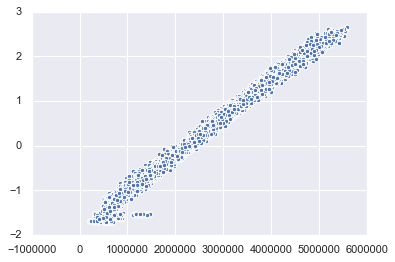

In [337]:
plt.scatter(Y_train_2['Expected_CTC'],y_pred_train_2)
plt.show()

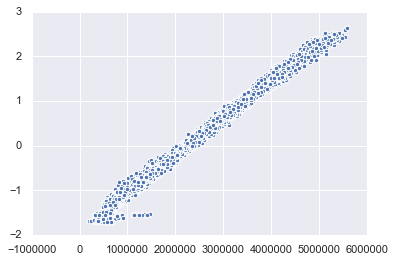

In [338]:
plt.scatter(Y_test_2['Expected_CTC'],y_pred_test_2)
plt.show()

**Linear Regression Expression for Train Data.**

In [339]:
for i,j in np.array(lm_train_2.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.0) * Intercept + (-0.04) * Total_Experience + (0.04) * Total_Experience_in_field_applied + (-0.02) * Department + (-0.06) * Role + (-0.02) * Designation + (0.09) * Highest_Education + (-0.02) * Passing_Year_Of_Graduation + (-0.02) * Passing_Year_Of_PG + (-0.01) * Passing_Year_Of_PHD + (0.99) * Current_CTC + (0.02) * Inhand_Offer + (0.07) * Last_Appraisal_Rating + (-0.02) * No_Of_Companies_worked + (0.01) * Number_of_Publications + (0.0) * Certifications + (0.01) * International_degree_any + (-0.04) * Percentage_Relevant_Exp_in_Field + 

**Linear Regression Expression for Test Data.**

In [340]:
for i,j in np.array(lm_test_2.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(0.0) * Intercept + (-0.04) * Total_Experience + (0.04) * Total_Experience_in_field_applied + (-0.02) * Department + (-0.06) * Role + (-0.02) * Designation + (0.09) * Highest_Education + (-0.02) * Passing_Year_Of_Graduation + (-0.02) * Passing_Year_Of_PG + (-0.02) * Passing_Year_Of_PHD + (0.99) * Current_CTC + (0.02) * Inhand_Offer + (0.07) * Last_Appraisal_Rating + (-0.01) * No_Of_Companies_worked + (0.01) * Number_of_Publications + (-0.0) * Certifications + (0.01) * International_degree_any + (-0.04) * Percentage_Relevant_Exp_in_Field + 

**XG Boost Regressor** - Model 3

In [341]:
!pip install xgboost
from xgboost import XGBRegressor as xg

**Train-Test Split for Decision Tree Regressor Model**

In [342]:
X = df_1.drop('Expected_CTC',axis=1)
Y = df_1[['Expected_CTC']]

**Split X and Y into training and test set in 70:30 ratio.**

In [343]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [344]:
xgb_r = xg(objective ='reg:linear',
                  n_estimators = 15, seed = 123)
  

In [345]:
xgb_r.fit(X_train, Y_train)

[17:30:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=15, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=123, reg_alpha=0, ...)

**RMSE on Train & Test**

In [346]:
pred = xgb_r.predict(X_train)

In [347]:
pred

array([3103826.5, 2065977.8, 4846956. , ..., 4677095.5, 1963062.4,
       4916044. ], dtype=float32)

In [348]:
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(Y_train, pred))
print("RMSE : % f" %(rmse))

RMSE :  36162.740820


In [349]:
pred = xgb_r.predict(X_test)

In [350]:
pred

array([1216161.5 , 1815086.  , 2800722.8 , ..., 2359586.8 , 3403362.  ,
        735464.75], dtype=float32)

In [351]:
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(Y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  35673.038967


**R-Square of Train & Test**

In [352]:
score = xgb_r.score(X_train,Y_train)
print("R-squared:", score)

R-squared: 0.9990214156767083


In [353]:
score = xgb_r.score(X_test,Y_test)
print("R-squared:", score)

R-squared: 0.9990715667972391


**Adjusted_R-Square of Data**

In [354]:
1 - (1-xgb_r.score(X, Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1)

0.9990360797626477

**Descision Tree / Random Forest / ANN Regressor** - Model 4

**Train-Test Split for Model Building**

In [355]:
X = df_1.drop('Expected_CTC',axis=1)
Y = df_1[['Expected_CTC']]

**Split X and Y into training and test set in 70:30 ratio.**

In [356]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [357]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(X_train)
x_test_scaled=ss.transform(X_test)

In [358]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV


In [359]:
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=10000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)

In [360]:
models=[dtr,rfr,annr]

In [361]:
rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

In [362]:
for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != annr) :
        i.fit(X_train,Y_train)
        scores_train.append(i.score(X_train, Y_train))
        scores_test.append(i.score(X_test, Y_test))
        rmse_train.append(np.sqrt(mean_squared_error(Y_train,i.predict(X_train))))
        rmse_test.append(np.sqrt(mean_squared_error(Y_test,i.predict(X_test))))
 
    else :
        i.fit(X_train_scaled,Y_train)
        scores_train.append(i.score(X_train_scaled, Y_train))
        scores_test.append(i.score(X_test_scaled, Y_test))
        rmse_train.append(np.sqrt(mean_squared_error(Y_train,i.predict(X_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(Y_test,i.predict(X_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                            Train RMSE      Test RMSE  Training Score  \
Decision Tree Regressor   23964.035376   35992.407229        0.999570   
Random Forest Regressor   24745.396503   32929.832228        0.999542   
ANN Regressor            936906.651775  947458.562822        0.343147   

                         Test Score  
Decision Tree Regressor    0.999055  
Random Forest Regressor    0.999209  
ANN Regressor              0.345076  


**Hyper-parameter Tuning for Descision Tree / Random Forest / ANN Regressor - Model 5**

**Grid Search on Decision Tree**

In [363]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(X_train,Y_train)

print(grid_search.best_params_)

{'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 15}


**Using Grid Search for Random Forest**

In [369]:
param_grid = {
    'max_depth': [7,10],
    'max_features': [4, 6],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [30, 50,100],
    'n_estimators': [300, 500]
}

rfr = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

In [370]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [3, 15, 30],
                         'min_samples_split': [30, 50, 100],
                         'n_estimators': [300, 500]})

In [371]:
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 500}


**Using Grid Search for ANN**

In [372]:
param_grid = {
    'hidden_layer_sizes':[(500),(100,100)], 
    "activation": ["tanh", "relu"], 
    "solver": ["sgd", "adam"]}

annr = MLPRegressor(max_iter=10000, random_state=123)

grid_search = GridSearchCV(estimator = annr, param_grid = param_grid, cv = 3)

In [ ]:
grid_search.fit(x_train_scaled,y_train)

In [ ]:
print(grid_search.best_params_)

In [ ]:
annr = MLPRegressor(activation='relu', hidden_layer_sizes=(500), 
                    solver='sgd',random_state=123, 
                    max_iter=10000)
rfr = RandomForestRegressor(max_depth=10, max_features=6, 
                            min_samples_leaf= 3,
                            min_samples_split= 30, n_estimators= 500,
                            random_state=123)
dtr = tree.DecisionTreeRegressor(max_depth=20,min_samples_split=15,min_samples_leaf=3,random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]


for i in models:
    if (i != annr):
        i.fit(X_train,Y_train)
        scores_train.append(i.score(X_train, Y_train))
        scores_test.append(i.score(X_test, Y_test))
        rmse_train.append(np.sqrt(mean_squared_error(Y_train,i.predict(X_train))))
        rmse_test.append(np.sqrt(mean_squared_error(X_test,i.predict(Y_test))))
        
    else :
        i.fit(X_train_scaled,Y_train)
        scores_train.append(i.score(X_train_scaled, Y_train))
        scores_test.append(i.score(X_test_scaled, Y_test))
        rmse_train.append(np.sqrt(mean_squared_error(Y_train,i.predict(X_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(Y_test,i.predict(X_test_scaled))))
        
        
result = pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=[Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor'])

**Note- Fore Insights & Recommendations please refer to Business Report.**

                                 **The End**